In [279]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels
import sklearn
from pylab import rcParams
from IPython.display import display

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from   statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   sklearn.metrics import  mean_squared_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm


In [280]:
df1 = pd.read_csv("C:\\Users\\Vishal.Shah\\Desktop\\PDGSBA\\Times series forecasting week3\\project\\Sparkling.csv",parse_dates=True,index_col=0)
df1

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471
...               ...
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

[187 rows x 1 columns]

<AxesSubplot:xlabel='YearMonth'>

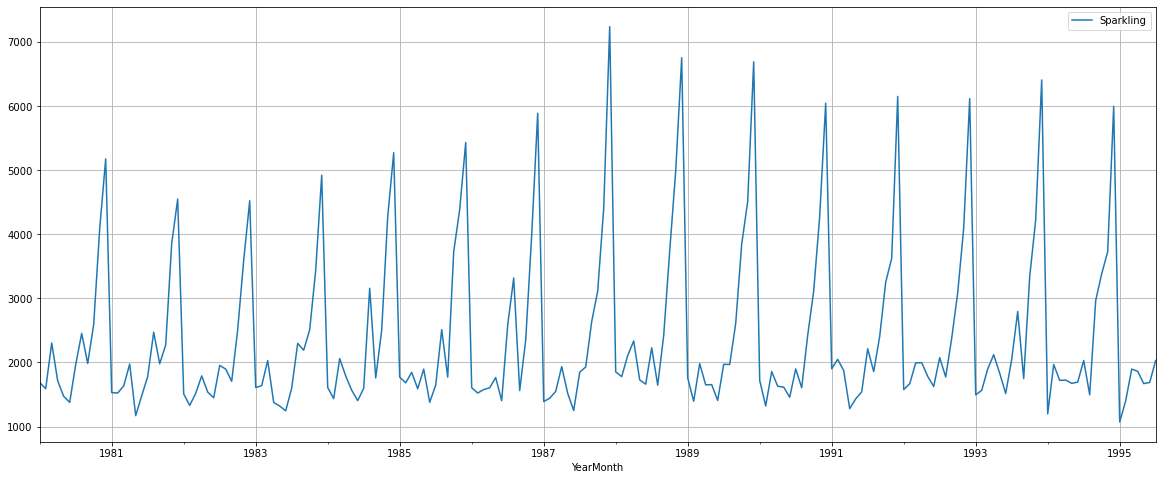

In [281]:
# The following code is to set the subsequent figure sizes

rcParams['figure.figsize'] = 20,8
df1.plot(grid=True)

In [282]:
df1.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [283]:
df1.isna().sum()

Sparkling    0
dtype: int64

In [284]:
# Missing Value Handling
# Take average of the seasons from two or all available years	Data has seasonality

In [285]:
df1.replace(to_replace= np.nan ,value= df1.mean(),inplace= True)
df1.isna().sum()

Sparkling    0
dtype: int64

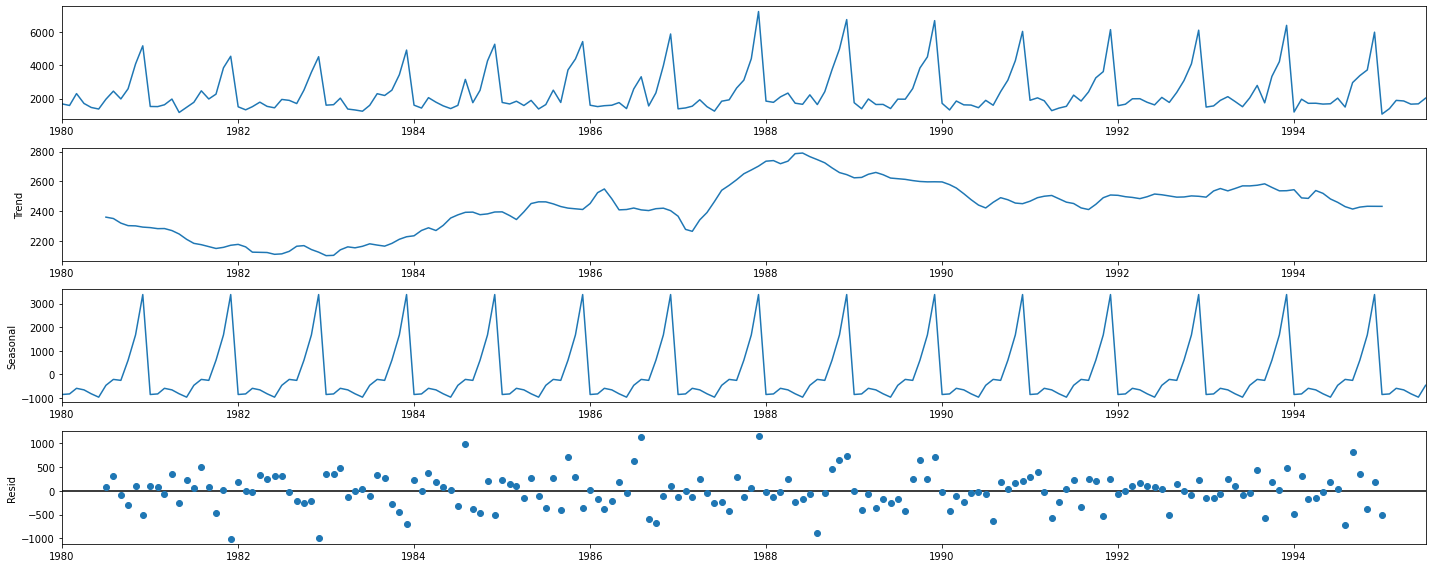

In [286]:
decomposition = seasonal_decompose(df1,model='additive')
decomposition.plot();

<AxesSubplot:xlabel='YearMonth'>

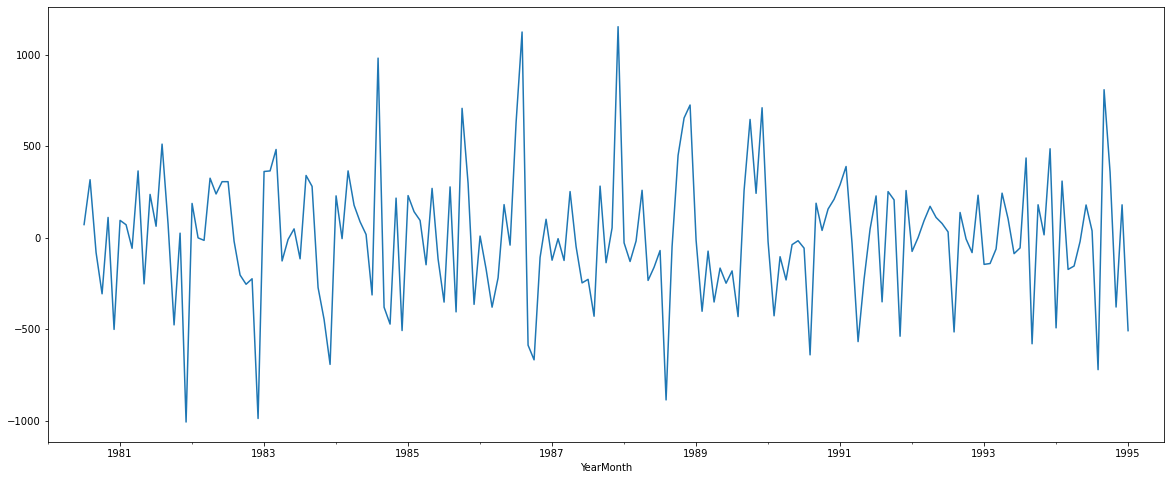

In [287]:
decomposition.resid.plot()

<AxesSubplot:xlabel='YearMonth'>

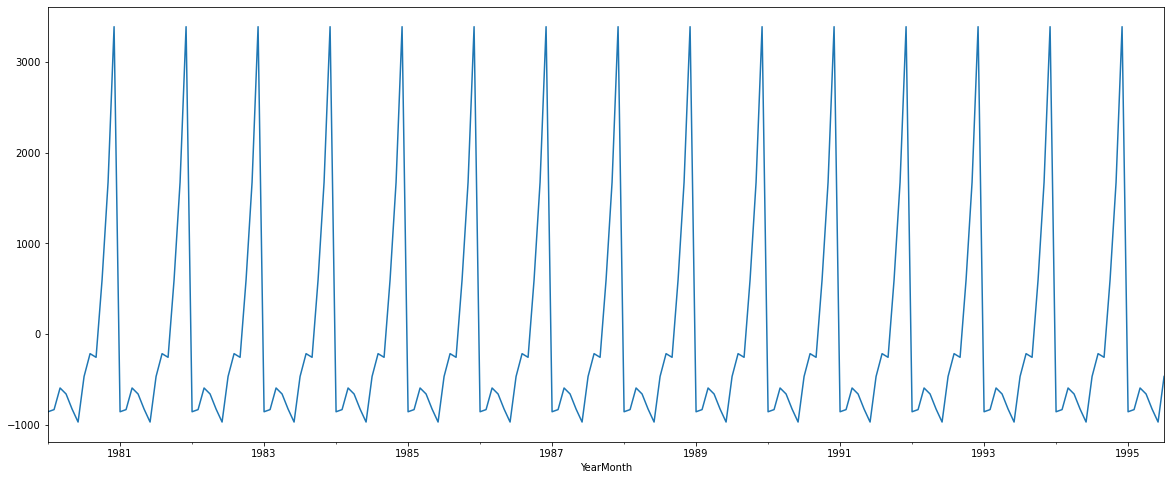

In [288]:
decomposition.seasonal.plot()

<AxesSubplot:xlabel='YearMonth'>

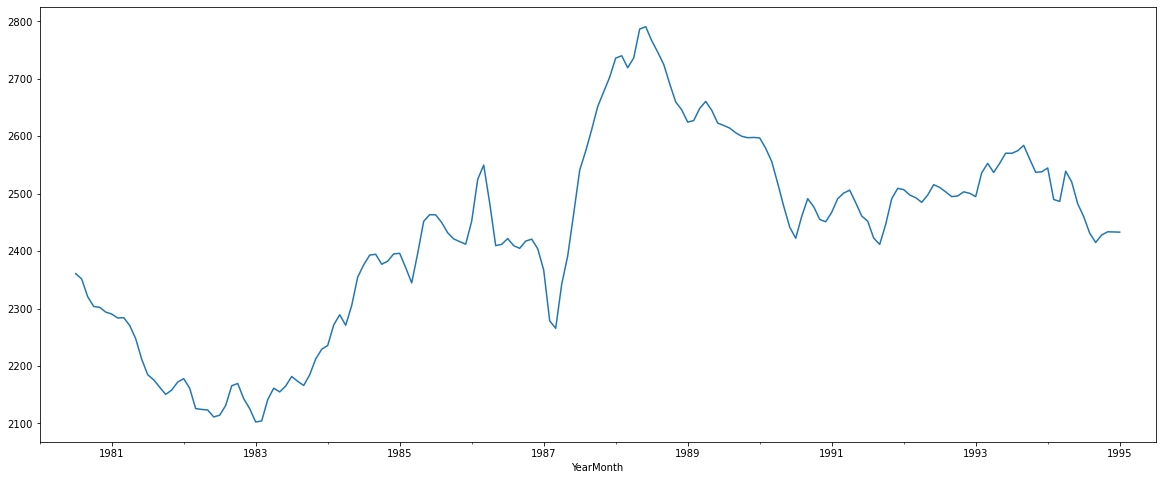

In [289]:
decomposition.trend.plot()

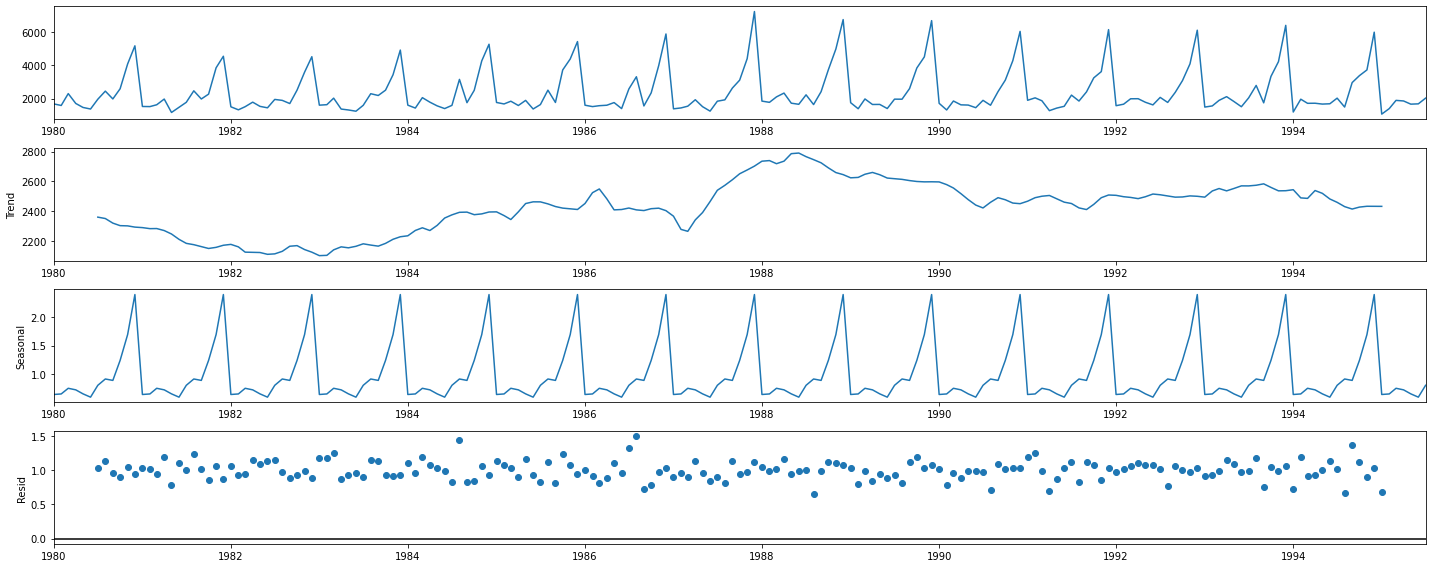

In [290]:
decomposition1 = seasonal_decompose(df1,model= "multiplicative")
decomposition1.plot();

<AxesSubplot:xlabel='YearMonth'>

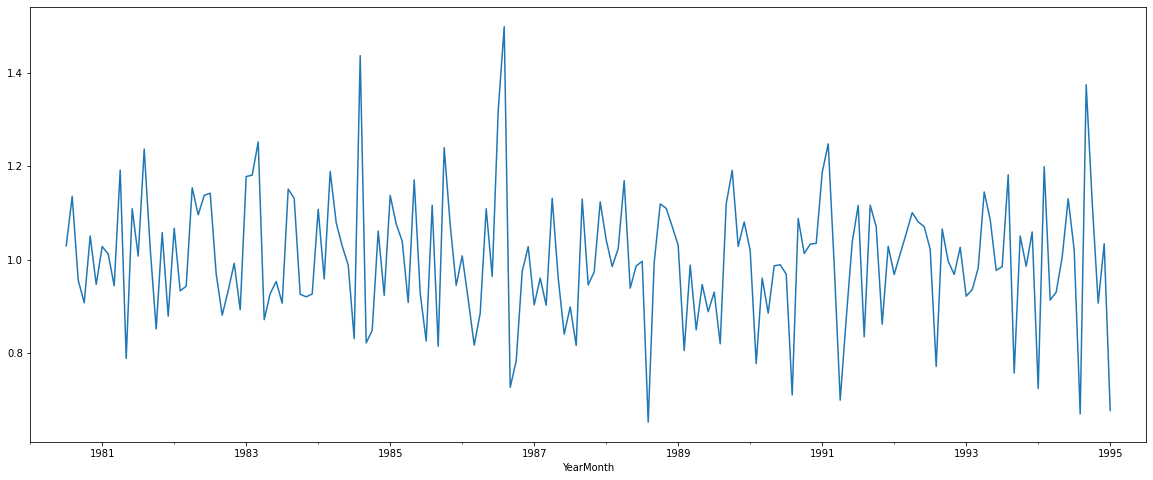

In [291]:
decomposition1.resid.plot()

<AxesSubplot:xlabel='YearMonth'>

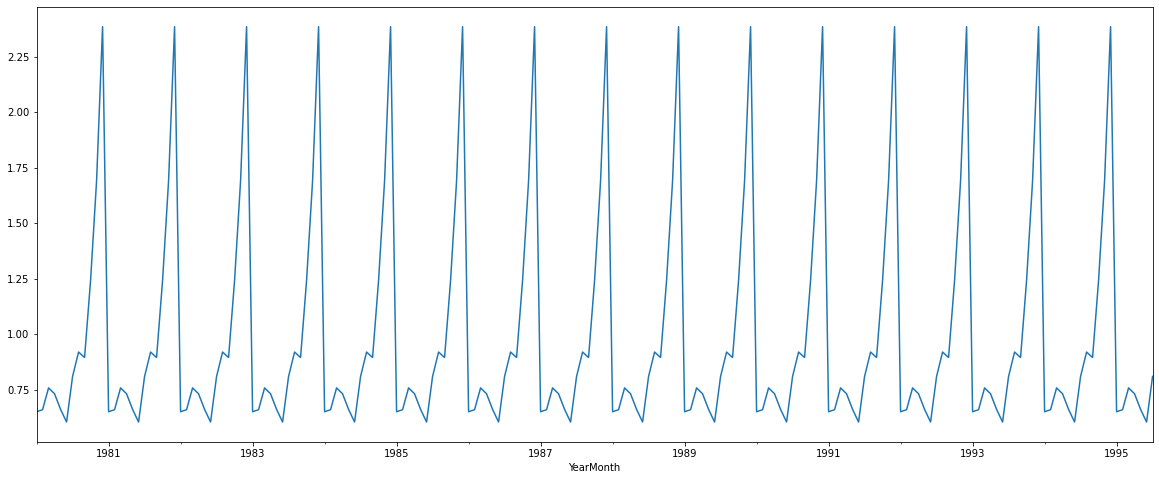

In [292]:
decomposition1.seasonal.plot()

<AxesSubplot:xlabel='YearMonth'>

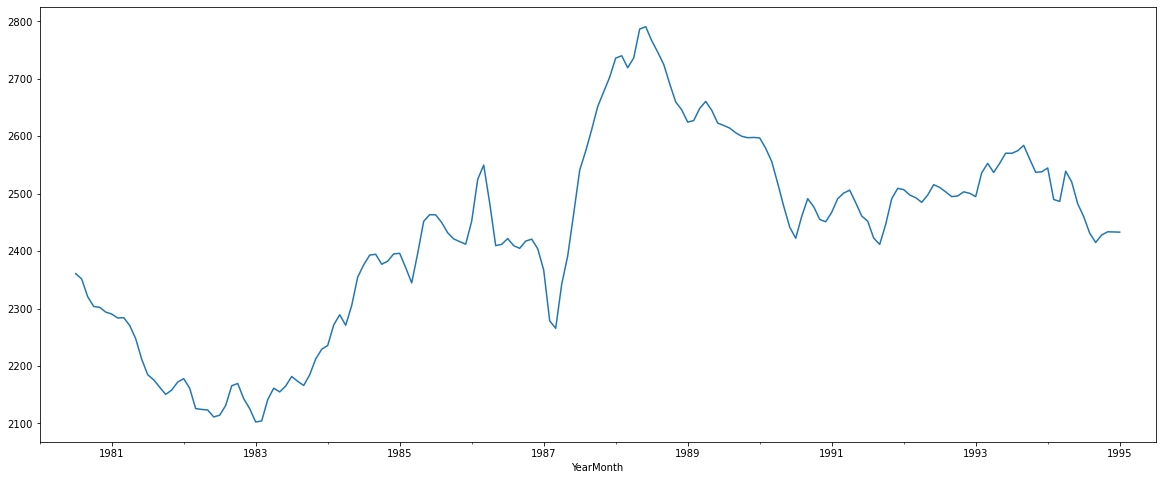

In [293]:
decomposition1.trend.plot()

C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearMonth', ylabel='Sparkling'>

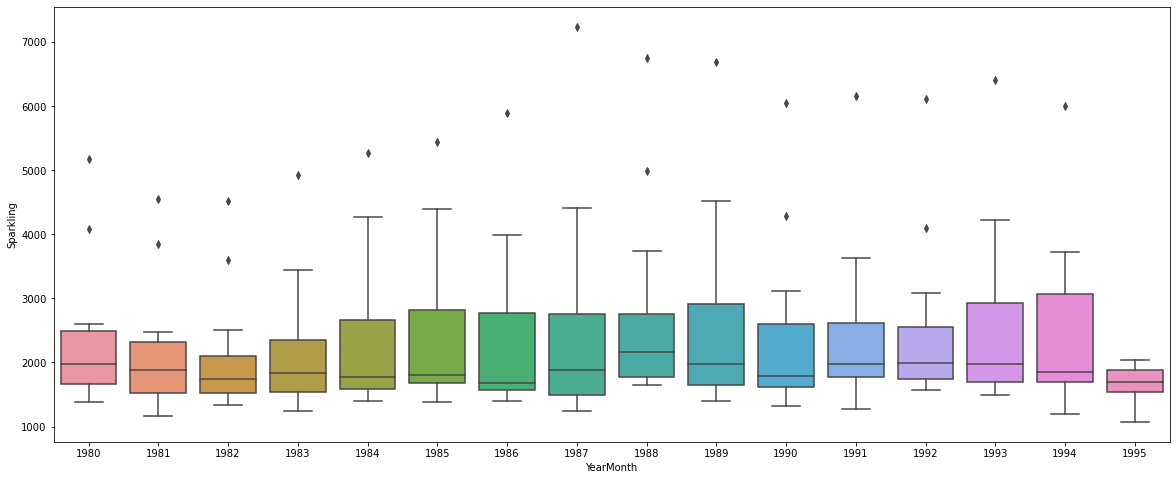

In [294]:
sns.boxplot(df1.index.year, df1.Sparkling)

C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearMonth', ylabel='Sparkling'>

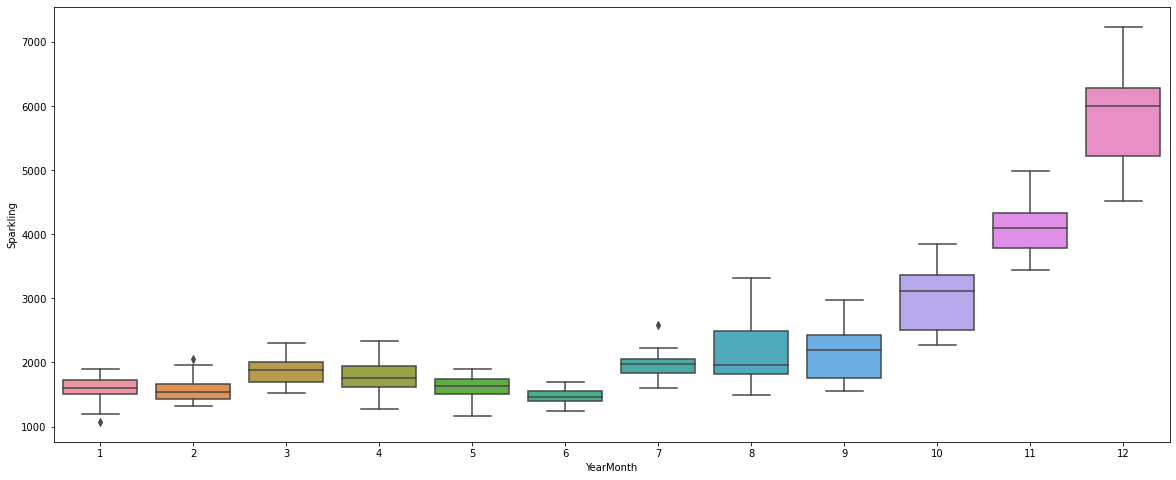

In [295]:
sns.boxplot(df1.index.month, df1.Sparkling)

[]

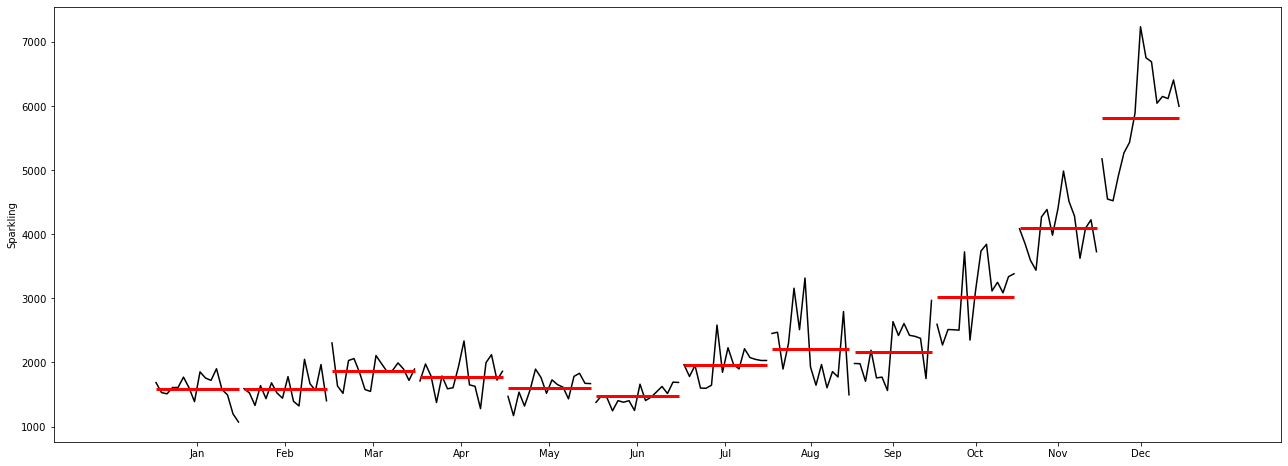

In [296]:
from statsmodels.graphics.tsaplots import month_plot
fig, ax = plt.subplots(figsize =(22,8))

month_plot(df1, ylabel='Sparkling', ax=ax)
plt.plot()

<AxesSubplot:xlabel='YearMonth'>

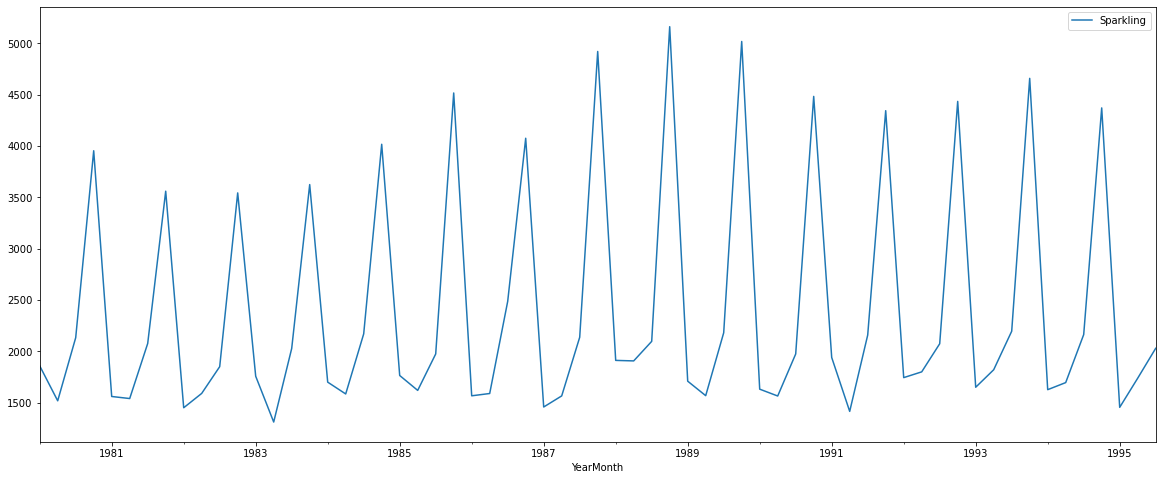

In [297]:
#Let's change the monthly series to quarterly. This would require aggregation.
df1_q = df1.resample('Q').mean()
df1_q.plot()

C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\2238078797.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sns.boxplot(df1.index.week, df1.Sparkling)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearMonth', ylabel='Sparkling'>

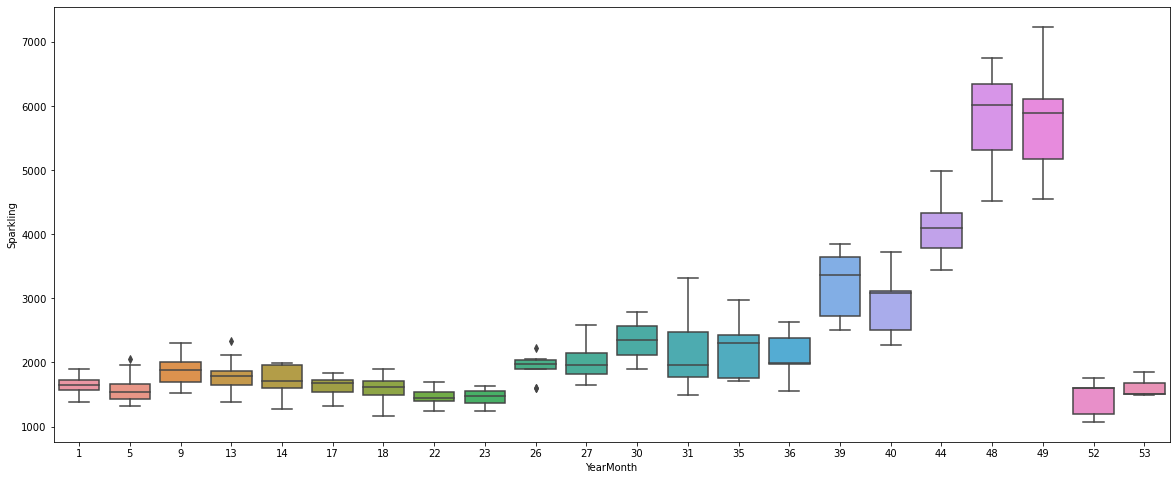

In [298]:
sns.boxplot(df1.index.week, df1.Sparkling)

C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearMonth', ylabel='Sparkling'>

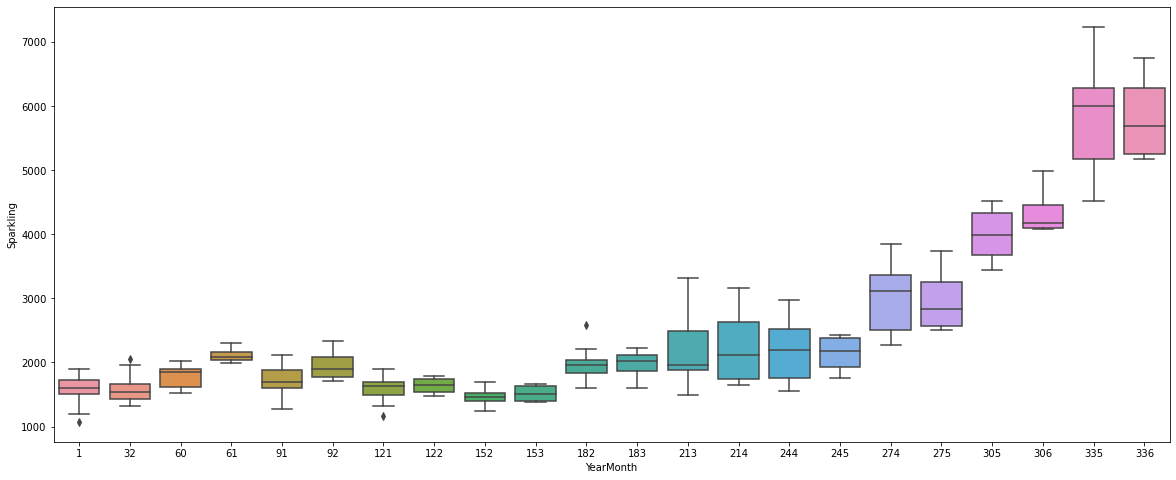

In [299]:
sns.boxplot(df1.index.dayofyear, df1.Sparkling)

# Plot the Time Series according to different months for different years.

In [300]:
yearly_sales_across_months = pd.pivot_table(df1, values ='Sparkling',
                                            columns=df1.index.month,
                                           index = df1.index.year)
yearly_sales_across_months

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

In [301]:
yearly_sales_across_months.plot()

<AxesSubplot:xlabel='YearMonth'>

## Split the data into training and test. The data from 1991 should be training data.

In [302]:
train  = df1[df1.index <'1991'] 
test   = df1[df1.index >'1990']

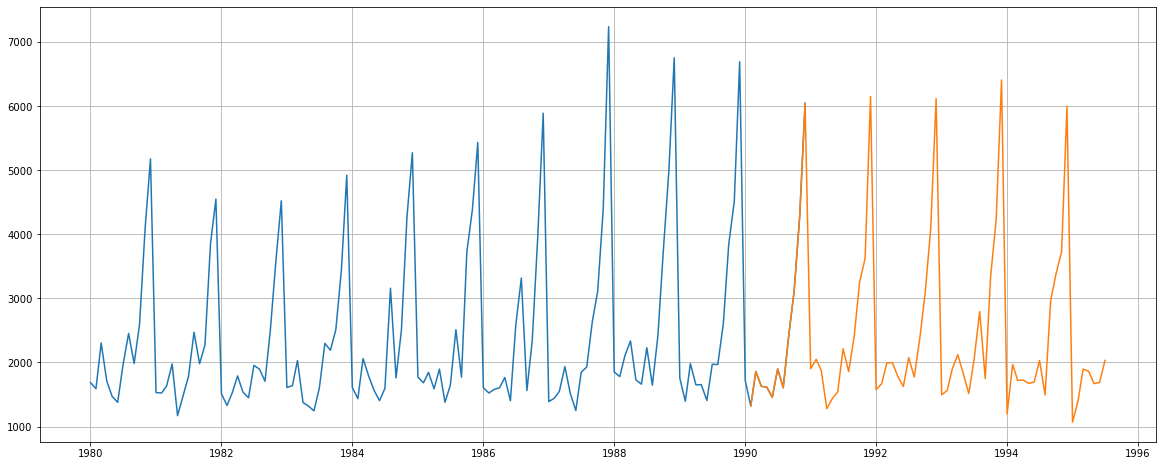

In [303]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.grid()

In [304]:
yearly_sales_across_months = pd.pivot_table(train, values ='Sparkling',
                                            columns=train.index.month,
                                           index = train.index.year)
yearly_sales_across_months

YearMonth    1     2     3     4     5     6     7     8     9     10    11  \
YearMonth                                                                     
1980       1686  1591  2304  1712  1471  1377  1966  2453  1984  2596  4087   
1981       1530  1523  1633  1976  1170  1480  1781  2472  1981  2273  3857   
1982       1510  1329  1518  1790  1537  1449  1954  1897  1706  2514  3593   
1983       1609  1638  2030  1375  1320  1245  1600  2298  2191  2511  3440   
1984       1609  1435  2061  1789  1567  1404  1597  3159  1759  2504  4273   
1985       1771  1682  1846  1589  1896  1379  1645  2512  1771  3727  4388   
1986       1606  1523  1577  1605  1765  1403  2584  3318  1562  2349  3987   
1987       1389  1442  1548  1935  1518  1250  1847  1930  2638  3114  4405   
1988       1853  1779  2108  2336  1728  1661  2230  1645  2421  3740  4988   
1989       1757  1394  1982  1650  1654  1406  1971  1968  2608  3845  4514   
1990       1720  1321  1859  1628  1615  1457  1899  1605  2424  3116  4286   

YearMonth    12  
YearMonth        
1980       5179  
1981       4551  
1982       4524  
1983       4923  
1984       5274  
1985       5434  
1986       5891  
1987       7242  
1988       6757  
1989       6694  
1990       6047

In [305]:
yearly_sales_across_months = pd.pivot_table(test, values ='Sparkling',
                                            columns= test.index.month,
                                           index = test.index.year)
yearly_sales_across_months

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1990          NaN  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

In [306]:
df1.shape

(187, 1)

# Building different models and comparing the accuracy metrics.

## Model 1: Linear Regression

In [307]:
print(train, test)

            Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471
...               ...
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

[132 rows x 1 columns]             Sparkling
YearMonth            
1990-02-01       1321
1990-03-01       1859
1990-04-01       1628
1990-05-01       1615
1990-06-01       1457
...               ...
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

[66 rows x 1 columns]


In [308]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [309]:
train_time = [i+1 for i in range(len(train))]
print(train_time)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]


In [310]:
test_time = [i+133 for i in range(len(test))]
print(test_time)

[133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198]


In [311]:
LinearRegression_train['train_time'] = train_time
LinearRegression_test['test_time'] = test_time

In [312]:
display(LinearRegression_train), display(LinearRegression_test)

Sparkling  train_time
YearMonth                        
1980-01-01       1686           1
1980-02-01       1591           2
1980-03-01       2304           3
1980-04-01       1712           4
1980-05-01       1471           5
...               ...         ...
1990-08-01       1605         128
1990-09-01       2424         129
1990-10-01       3116         130
1990-11-01       4286         131
1990-12-01       6047         132

[132 rows x 2 columns]

Sparkling  test_time
YearMonth                       
1990-02-01       1321        133
1990-03-01       1859        134
1990-04-01       1628        135
1990-05-01       1615        136
1990-06-01       1457        137
...               ...        ...
1995-03-01       1897        194
1995-04-01       1862        195
1995-05-01       1670        196
1995-06-01       1688        197
1995-07-01       2031        198

[66 rows x 2 columns]

(None, None)

In [313]:
lr = LinearRegression()

In [314]:
lr.fit(LinearRegression_train[['train_time']],LinearRegression_train['Sparkling'])

LinearRegression()

C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- test_time
Feature names seen at fit time, yet now missing:
- train_time

  warnings.warn(message, FutureWarning)


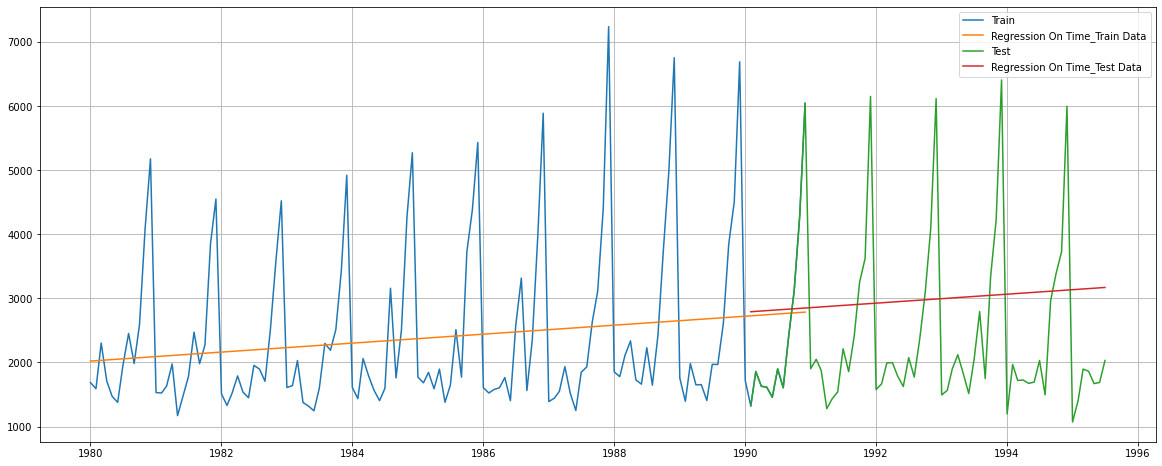

In [315]:
train_predictions_lrmodel1         = lr.predict(LinearRegression_train[['train_time']])
LinearRegression_train['RegOnTime'] = train_predictions_lrmodel1

test_predictions_lrmodel1         = lr.predict(LinearRegression_test[['test_time']])
LinearRegression_test['RegOnTime'] = test_predictions_lrmodel1

plt.plot( LinearRegression_train['Sparkling'], label='Train')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Train Data')

plt.plot(LinearRegression_test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

### Model Evaluation

In [316]:
rmse_model1_test = metrics.mean_squared_error(LinearRegression_test['Sparkling'],test_predictions_lrmodel1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1418.612 


In [317]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['LinearRegressionOnTime'])
resultsDf

Test RMSE
LinearRegressionOnTime  1418.611892

## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [318]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [319]:
NaiveModel_test['naive'] = np.array(train['Sparkling'])[len(train['Sparkling'])-1]
print(NaiveModel_test['naive'])

YearMonth
1990-02-01    6047
1990-03-01    6047
1990-04-01    6047
1990-05-01    6047
1990-06-01    6047
              ... 
1995-03-01    6047
1995-04-01    6047
1995-05-01    6047
1995-06-01    6047
1995-07-01    6047
Name: naive, Length: 66, dtype: int64


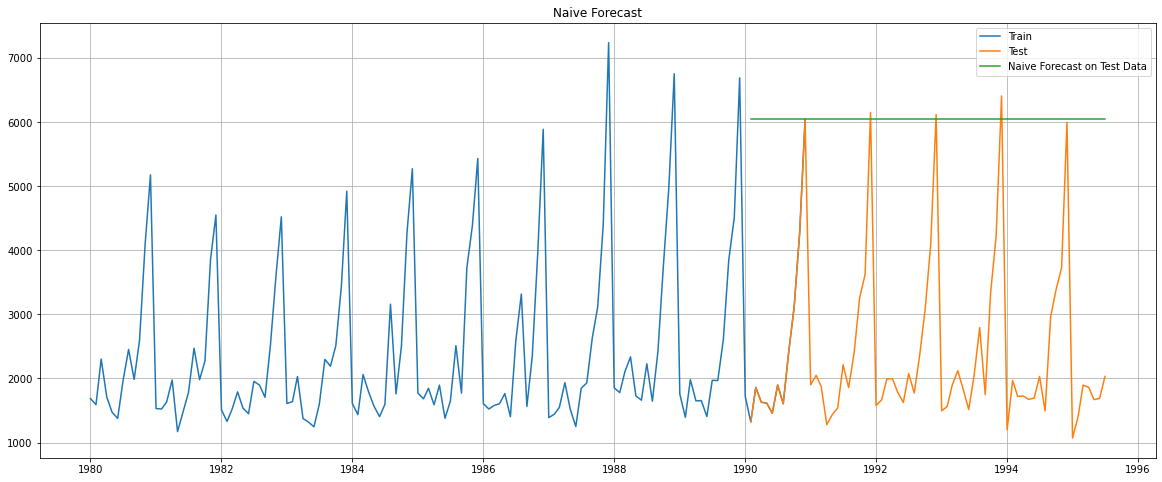

In [320]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [321]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3859.589


In [322]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
LinearRegressionOnTime  1418.611892
NaiveModel              3859.588618

## Method 3: Simple Average


#### For this particular simple average method, we will forecast by using the average of the training values.

In [323]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [324]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test

Sparkling  mean_forecast
YearMonth                           
1990-02-01       1321    2403.780303
1990-03-01       1859    2403.780303
1990-04-01       1628    2403.780303
1990-05-01       1615    2403.780303
1990-06-01       1457    2403.780303
...               ...            ...
1995-03-01       1897    2403.780303
1995-04-01       1862    2403.780303
1995-05-01       1670    2403.780303
1995-06-01       1688    2403.780303
1995-07-01       2031    2403.780303

[66 rows x 2 columns]

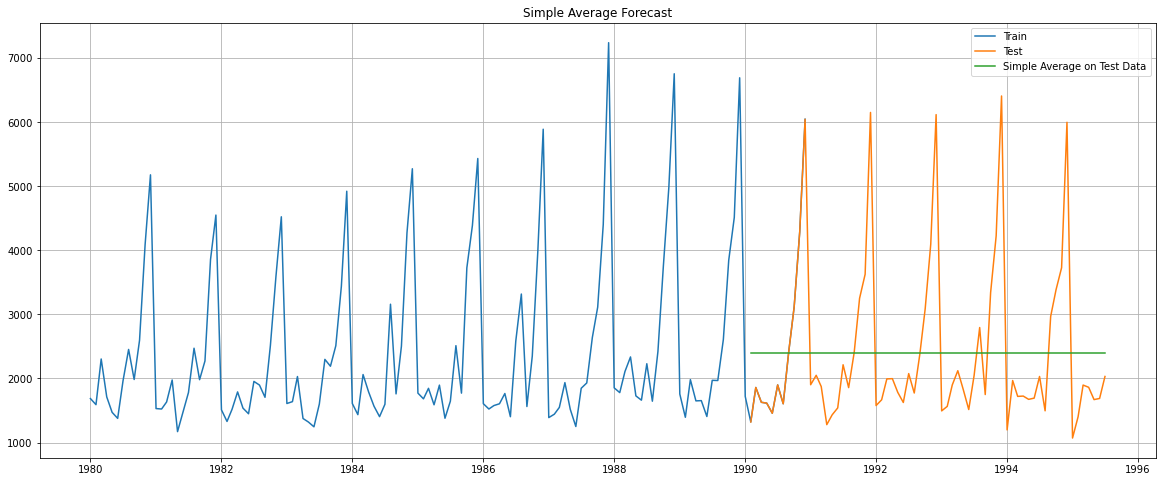

In [325]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [326]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1298.173


In [327]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
LinearRegressionOnTime  1418.611892
NaiveModel              3859.588618
SimpleAverageModel      1298.173362

## Method 4: Moving Average(MA)

 to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here

In [328]:
MovingAverage = df1.copy()

#### Trailing moving averages

In [329]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
YearMonth                                                              
1980-01-01       1686         NaN         NaN          NaN          NaN
1980-02-01       1591      1638.5         NaN          NaN          NaN
1980-03-01       2304      1947.5         NaN          NaN          NaN
1980-04-01       1712      2008.0     1823.25          NaN          NaN
1980-05-01       1471      1591.5     1769.50          NaN          NaN
...               ...         ...         ...          ...          ...
1995-03-01       1897      1649.5     2592.00  2913.666667  2664.000000
1995-04-01       1862      1879.5     1557.75  2659.833333  2645.222222
1995-05-01       1670      1766.0     1707.75  2316.666667  2664.666667
1995-06-01       1688      1679.0     1779.25  1598.166667  2522.444444
1995-07-01       2031      1859.5     1812.75  1758.333333  2372.000000

[187 rows x 5 columns]

In [330]:
MovingAverage['Trailing_2']

YearMonth
1980-01-01       NaN
1980-02-01    1638.5
1980-03-01    1947.5
1980-04-01    2008.0
1980-05-01    1591.5
               ...  
1995-03-01    1649.5
1995-04-01    1879.5
1995-05-01    1766.0
1995-06-01    1679.0
1995-07-01    1859.5
Name: Trailing_2, Length: 187, dtype: float64

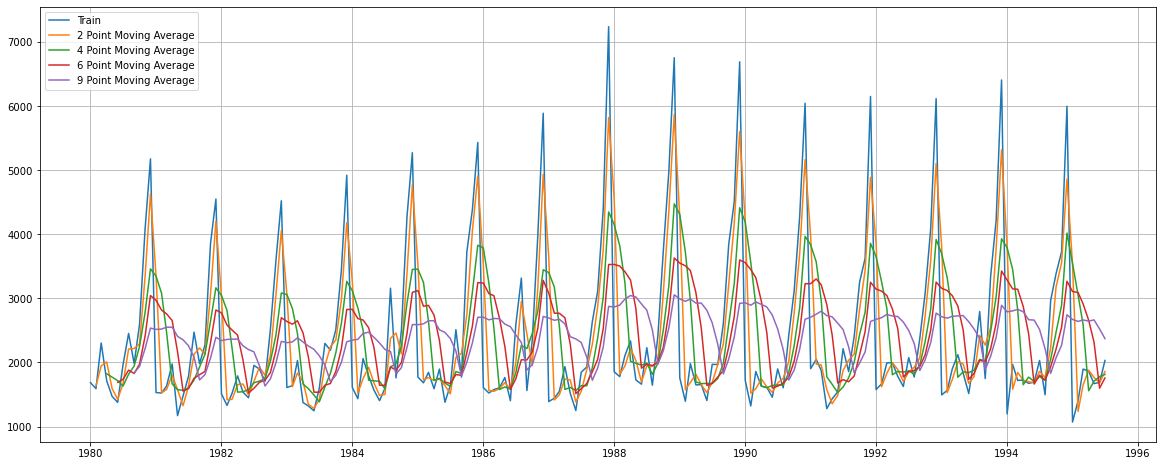

In [331]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [332]:
trailing_MovingAverage_train = MovingAverage[:131]
trailing_MovingAverage_test = MovingAverage[132:]

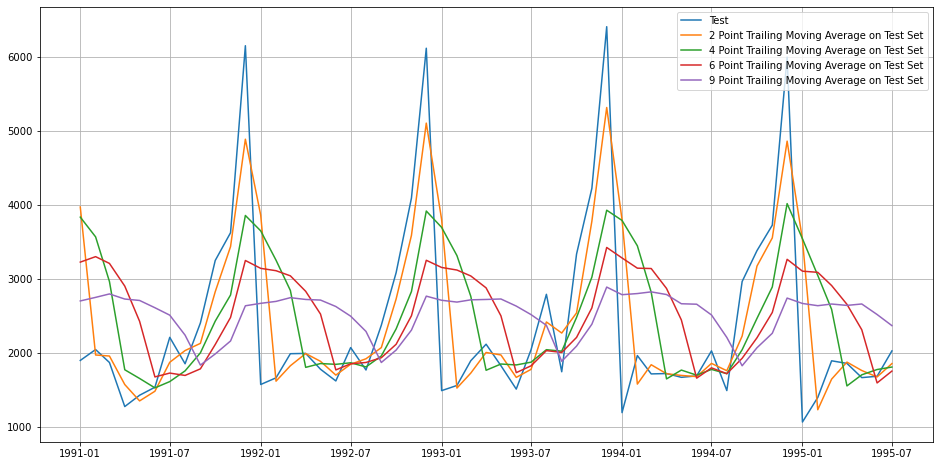

In [333]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
# plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

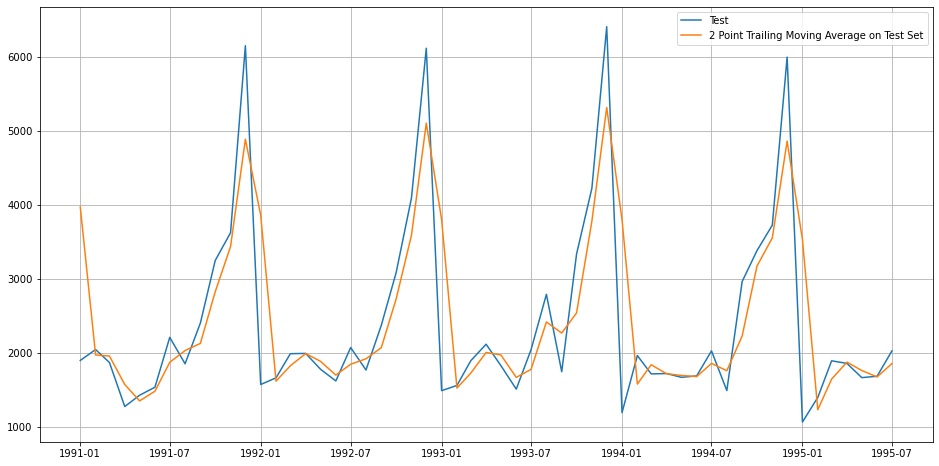

In [334]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [335]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(trailing_MovingAverage_test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(trailing_MovingAverage_test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(trailing_MovingAverage_test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(trailing_MovingAverage_test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278


In [336]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
LinearRegressionOnTime       1418.611892
NaiveModel                   3859.588618
SimpleAverageModel           1298.173362
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

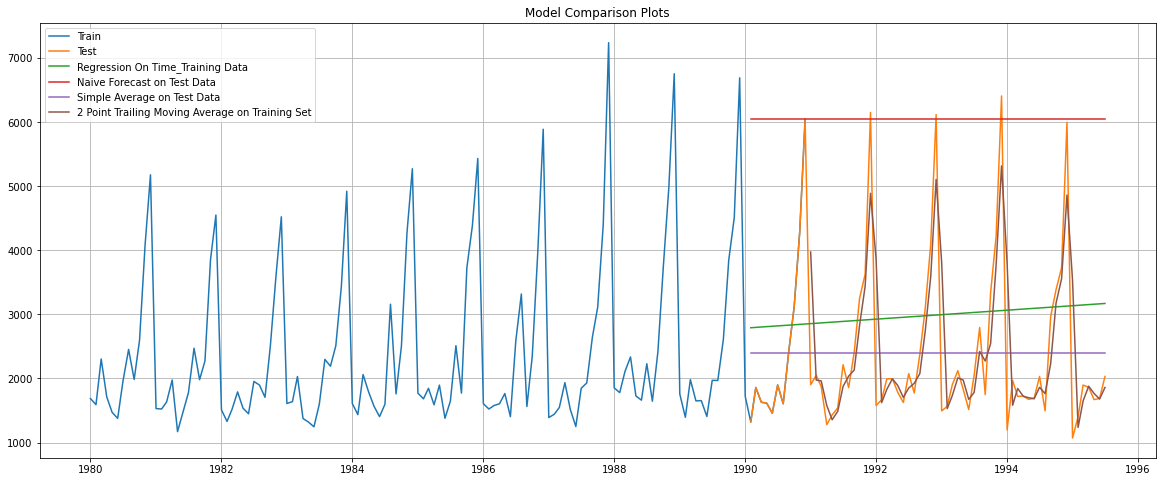

In [337]:
## Plotting on both Training and Test data

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### SES -  ETS(A, N, N) - Simple Exponential Smoothing with additive errors
###### The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES). 

In [338]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [339]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [340]:
model_SES_autofit.params

{'smoothing_level': 0.07029459943040381,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1764.1004162520212,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [341]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    2804.687529
1991-02-01    2804.687529
1991-03-01    2804.687529
1991-04-01    2804.687529
1991-05-01    2804.687529
                 ...     
1996-02-01    2804.687529
1996-03-01    2804.687529
1996-04-01    2804.687529
1996-05-01    2804.687529
1996-06-01    2804.687529
Freq: MS, Length: 66, dtype: float64

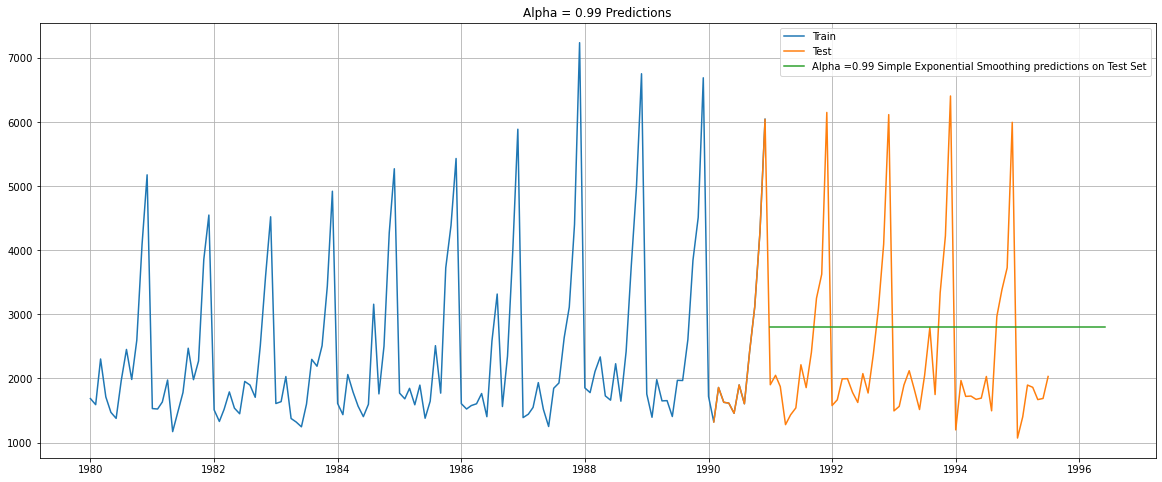

In [342]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

## Model metrics

In [343]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100
MAPE(test.Sparkling,SES_predict.values)

54.566392923168515

In [344]:
print('SES RMSE:',mean_squared_error(test.Sparkling,SES_predict.values,squared=False))

SES RMSE: 1356.1605113784005


In [345]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,SES_predict.values,squared=False)]},index=['Alpha=0.99,SES'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
LinearRegressionOnTime       1418.611892
NaiveModel                   3859.588618
SimpleAverageModel           1298.173362
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315
Alpha=0.99,SES               1356.160511

## Holt - ETS(A, A, N) - Holt's linear method with additive errors

## Double Exponential Smoothing


In [346]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6638769092832238, 'smoothing_trend': 9.966251357628782e-05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.5681711003654, 'initial_trend': 29.020225552837097, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [347]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    5330.501799
1991-02-01    5359.520204
1991-03-01    5388.538609
1991-04-01    5417.557013
1991-05-01    5446.575418
                 ...     
1996-02-01    7100.624495
1996-03-01    7129.642900
1996-04-01    7158.661305
1996-05-01    7187.679710
1996-06-01    7216.698115
Freq: MS, Length: 66, dtype: float64

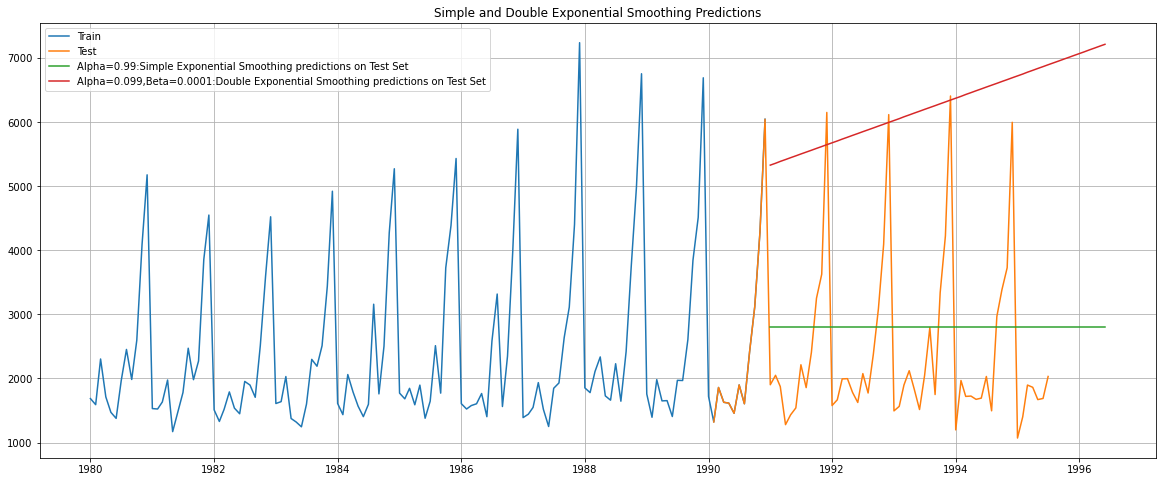

In [348]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [349]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 4105.73219023778


In [350]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

Test RMSE
LinearRegressionOnTime       1418.611892
NaiveModel                   3859.588618
SimpleAverageModel           1298.173362
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315
Alpha=0.99,SES               1356.160511
Alpha=1,Beta=0.0189:DES      4105.732190

### Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [351]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.10005373820823961, 'smoothing_trend': 0.010034490652580457, 'smoothing_seasonal': 0.5095957543425532, 'damping_trend': nan, 'initial_level': 2364.584774604334, 'initial_trend': -0.016752880078245408, 'initial_seasons': array([-653.82559323, -736.67734144, -368.25456128, -483.63906084,
       -826.15467946, -832.96819741, -386.3751117 ,   91.82676187,
       -261.32455153,  265.38968222, 1580.26233564, 2619.56221896]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [352]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01    1509.969093
1991-02-01    1205.343244
1991-03-01    1702.386113
1991-04-01    1548.514691
1991-05-01    1467.824074
                 ...     
1996-02-01    1183.401483
1996-03-01    1680.444351
1996-04-01    1526.572930
1996-05-01    1445.882313
1996-06-01    1265.167478
Freq: MS, Length: 66, dtype: float64

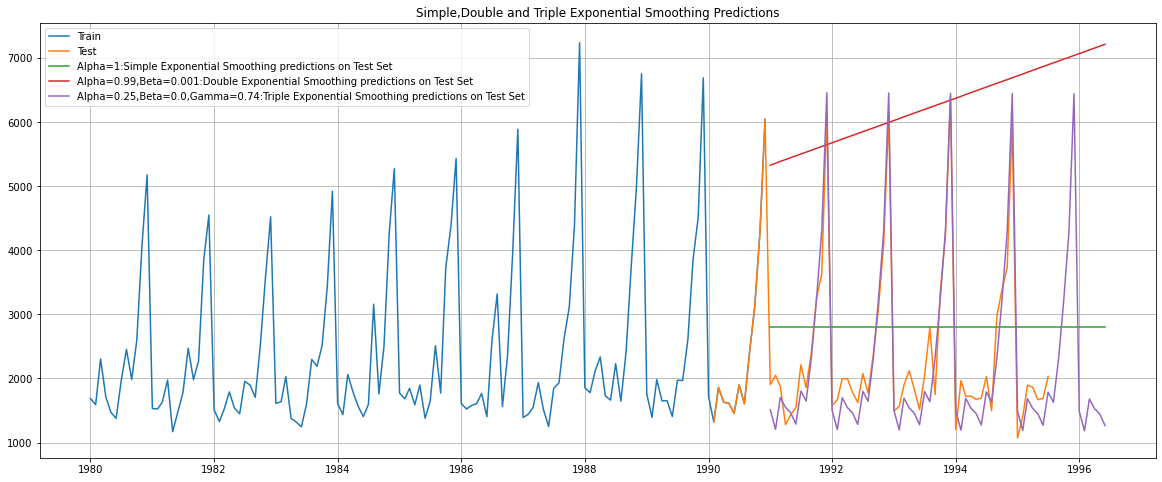

In [353]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [354]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 1571.7926884720748


In [355]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

Test RMSE
LinearRegressionOnTime              1418.611892
NaiveModel                          3859.588618
SimpleAverageModel                  1298.173362
2pointTrailingMovingAverage          813.400684
4pointTrailingMovingAverage         1156.589694
6pointTrailingMovingAverage         1283.927428
9pointTrailingMovingAverage         1346.278315
Alpha=0.99,SES                      1356.160511
Alpha=1,Beta=0.0189:DES             4105.732190
Alpha=0.25,Beta=0.0,Gamma=0.74:TES  1571.792688

### Holt-Winters - ETS(A, A, M) - Holt Winter's linear method 

In [356]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11194572287706502, 'smoothing_trend': 0.04979454913988668, 'smoothing_seasonal': 0.3616765678435302, 'damping_trend': nan, 'initial_level': 2356.340229937152, 'initial_trend': -10.519480221963526, 'initial_seasons': array([0.71465118, 0.68302129, 0.90263858, 0.80589958, 0.65660325,
       0.65654363, 0.88525948, 1.132562  , 0.92225104, 1.21110112,
       1.8820382 , 2.38194187]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [357]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-01    1586.782642
1991-02-01    1355.896477
1991-03-01    1762.095344
1991-04-01    1655.471900
1991-05-01    1541.320914
                 ...     
1996-02-01    1142.349241
1996-03-01    1483.843332
1996-04-01    1393.366953
1996-05-01    1296.643435
1996-06-01    1138.889761
Freq: MS, Length: 66, dtype: float64

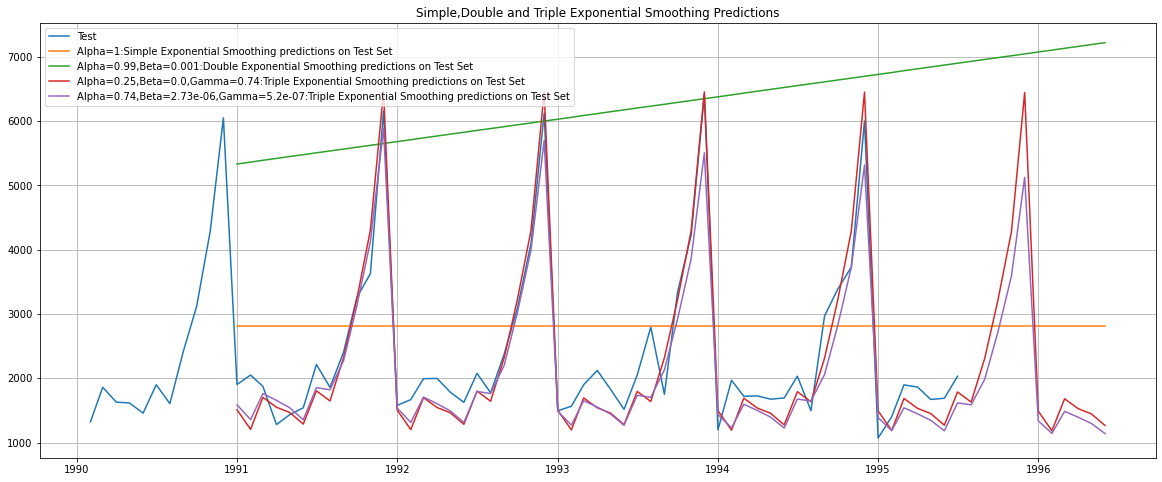

In [358]:
## Plotting the Training data, Test data and the forecasted values

# plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

###  model accuracy

In [359]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 1425.7723518187652


In [360]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

Test RMSE
LinearRegressionOnTime                              1418.611892
NaiveModel                                          3859.588618
SimpleAverageModel                                  1298.173362
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.99,SES                                      1356.160511
Alpha=1,Beta=0.0189:DES                             4105.732190
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                  1571.792688
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES  1425.772352

## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF (Augmented Dickey-Fuller) test is:

𝐻0  : The Time Series has a unit root and is thus non-stationary.
𝐻1  : The Time Series does not have a unit root and is thus stationary.

In [362]:
dftest = adfuller(df1,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932035
Number of lags used 12


We cannot reject H0 as Pvalue is more than 0.05, 
So,let us take one level of differencing to see whether the series becomes stationary.

In [363]:
dftest = adfuller(df1.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


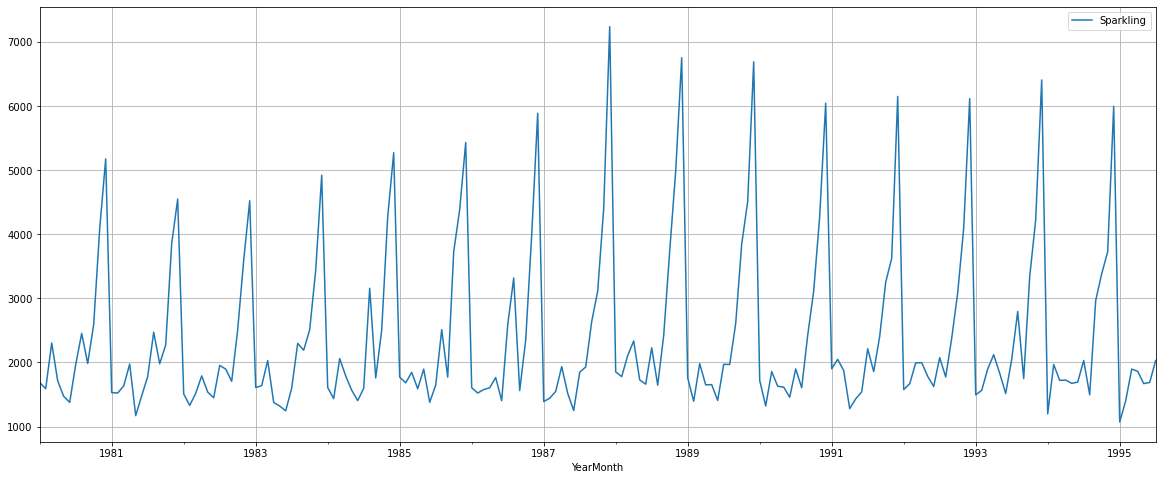

In [364]:
df1.plot(grid=True);

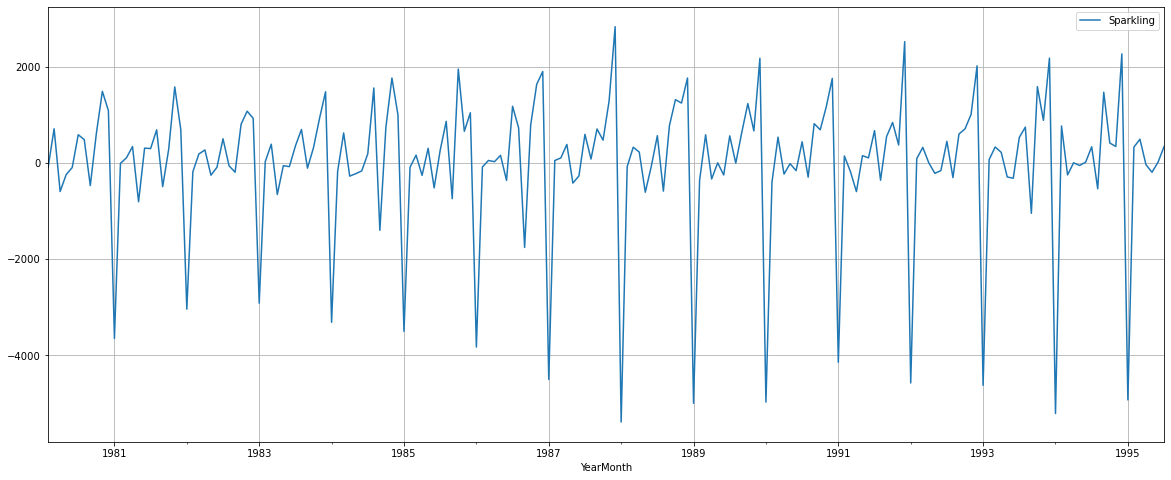

In [367]:
df1.diff().dropna().plot(grid=True);

Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [368]:
plot_acf(df1,alpha=0.05);

From the above plots, we can say that there seems to be a seasonality in the data.

C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


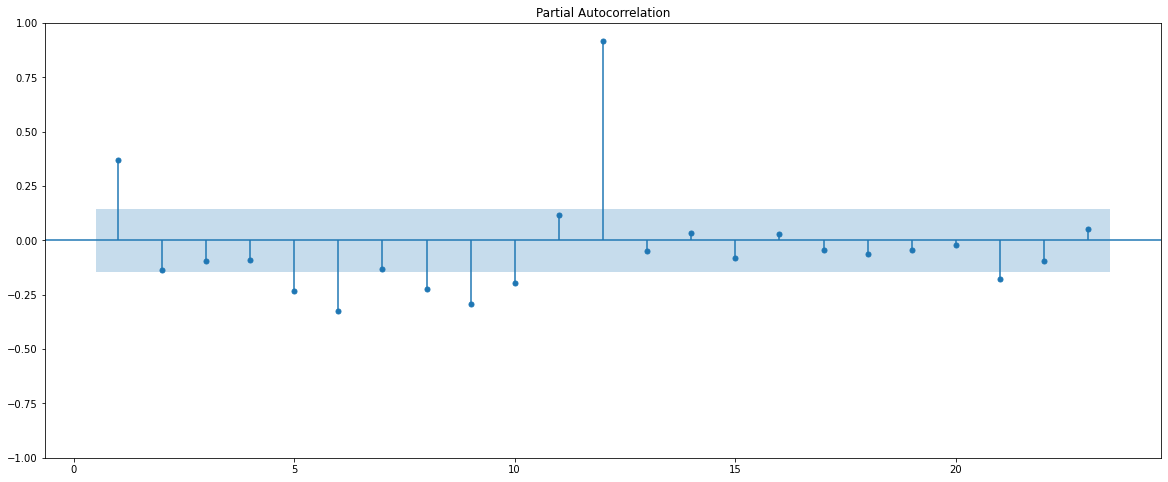

In [369]:
plot_pacf(df1,zero=False,alpha=0.05);

## Check for stationarity of the Training Data Time Series.

In [370]:
train.dropna().plot(grid=True);
plt.plot(grid=True);

In [372]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593696
Number of lags used 12


We cannot reject H0 as Pvalue is more than 0.05, 
So,let us take one level of differencing to see whether the series becomes stationary.

In [373]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.968
DF test p-value is 8.479210655516242e-11
Number of lags used 11


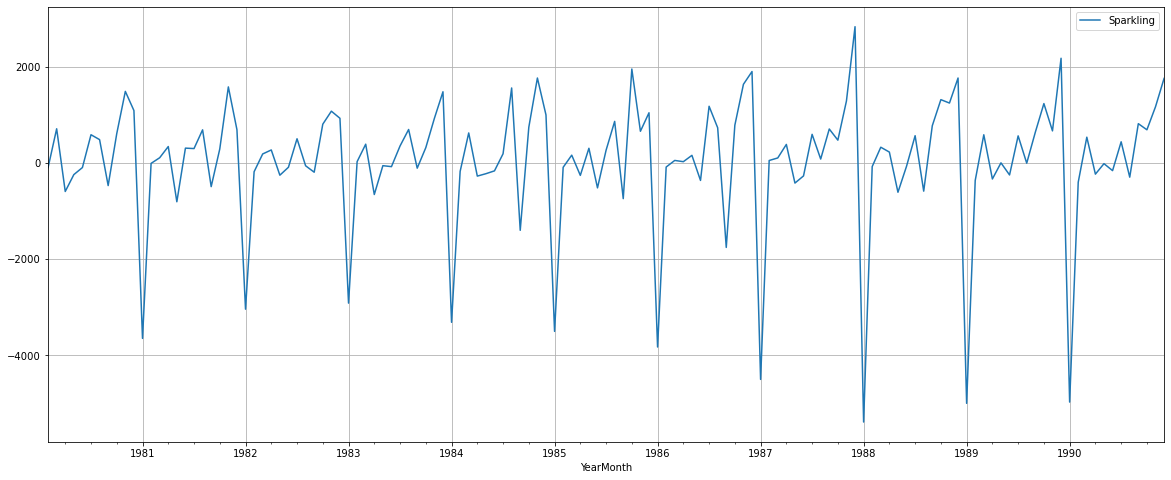

In [374]:
train.diff().dropna().plot(grid=True);
plt.plot(grid=True);

## Build an Automated version of an ARIMA & SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC) and RMSE check

In [375]:
plot_acf(train,alpha=0.05);

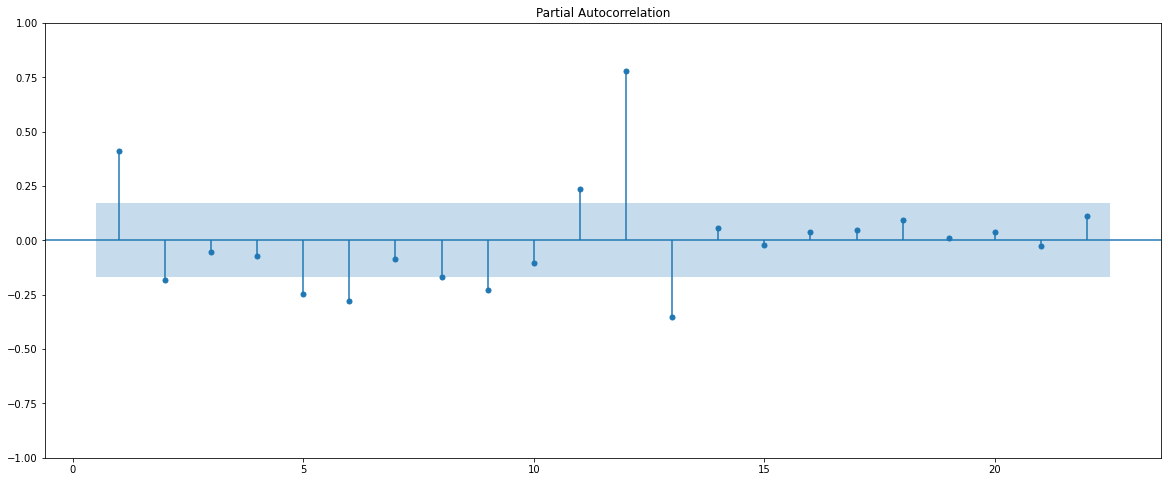

In [376]:
plot_pacf(train,zero=False,alpha=0.05,method='ywmle');

In [377]:
p = q = range(0,6)
d = range(1,2)
pdq = list(itertools.product(p,d,q))
print("Examples of parameter combinations for model")
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of parameter combinations for model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (0, 1, 5)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (1, 1, 5)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (2, 1, 5)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (3, 1, 5)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)
Model: (4, 1, 5)
Model: (5, 1, 0)
Model: (5, 1, 1)
Model: (5, 1, 2)
Model: (5, 1, 3)
Model: (5, 1, 4)
Model: (5, 1, 5)


In [134]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [135]:
for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values, order = param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.408323130674
ARIMA(0, 1, 3) - AIC:2233.9948577476116
ARIMA(0, 1, 4) - AIC:2235.173736469571


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\876395560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\876395560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\876395560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\876395560.py:4: FutureWarning: The frame.append method i

ARIMA(0, 1, 5) - AIC:2237.5192364963477
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.7550946742404
ARIMA(1, 1, 2) - AIC:2234.5272004519366


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\876395560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\876395560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\876395560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(1, 1, 3) - AIC:2235.6078101124103
ARIMA(1, 1, 4) - AIC:2227.736976993176


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\876395560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization faile

ARIMA(1, 1, 5) - AIC:2263.5585841472175
ARIMA(2, 1, 0) - AIC:2260.365743968097
ARIMA(2, 1, 1) - AIC:2233.7776262581274
ARIMA(2, 1, 2) - AIC:2213.50921703971


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\876395560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\876395560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\876395560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

ARIMA(2, 1, 3) - AIC:2232.983057575394
ARIMA(2, 1, 4) - AIC:2222.9218324124167


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\876395560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\876395560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.appe

ARIMA(2, 1, 5) - AIC:2350.80483960419
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.4989865071907


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\876395560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - AIC:2230.7572943437854


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\876395560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible startin

ARIMA(3, 1, 3) - AIC:2221.4519770502657


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\876395560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible startin

ARIMA(3, 1, 4) - AIC:2219.8296954800226


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\876395560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\876395560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\876395560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

ARIMA(3, 1, 5) - AIC:2376.944217293691
ARIMA(4, 1, 0) - AIC:2259.7418413992687
ARIMA(4, 1, 1) - AIC:2237.0730563311945


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\876395560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.a

ARIMA(4, 1, 2) - AIC:2233.060004159987
ARIMA(4, 1, 3) - AIC:2222.904097730048


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\876395560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood o

ARIMA(4, 1, 4) - AIC:2213.8002498553624


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\876395560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\876395560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(4, 1, 5) - AIC:20.0
ARIMA(5, 1, 0) - AIC:2261.3106818701035
ARIMA(5, 1, 1) - AIC:2229.4020613636676


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\876395560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood o

ARIMA(5, 1, 2) - AIC:2237.3493740391395


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\876395560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible startin

ARIMA(5, 1, 3) - AIC:2225.105025265918


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\876395560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible startin

ARIMA(5, 1, 4) - AIC:2217.847847422859
ARIMA(5, 1, 5) - AIC:2338.759617015252


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\876395560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [378]:
ARIMA_AIC = ARIMA_AIC.sort_values(by = 'AIC', ascending = True)
ARIMA_AIC

param          AIC
29  (4, 1, 5)    20.000000
14  (2, 1, 2)  2213.509217
28  (4, 1, 4)  2213.800250
34  (5, 1, 4)  2217.847847
22  (3, 1, 4)  2219.829695
21  (3, 1, 3)  2221.451977
27  (4, 1, 3)  2222.904098
16  (2, 1, 4)  2222.921832
33  (5, 1, 3)  2225.105025
10  (1, 1, 4)  2227.736977
31  (5, 1, 1)  2229.402061
20  (3, 1, 2)  2230.757294
15  (2, 1, 3)  2232.983058
26  (4, 1, 2)  2233.060004
13  (2, 1, 1)  2233.777626
3   (0, 1, 3)  2233.994858
2   (0, 1, 2)  2234.408323
8   (1, 1, 2)  2234.527200
4   (0, 1, 4)  2235.173736
19  (3, 1, 1)  2235.498987
9   (1, 1, 3)  2235.607810
7   (1, 1, 1)  2235.755095
25  (4, 1, 1)  2237.073056
32  (5, 1, 2)  2237.349374
5   (0, 1, 5)  2237.519236
18  (3, 1, 0)  2257.723379
24  (4, 1, 0)  2259.741841
12  (2, 1, 0)  2260.365744
30  (5, 1, 0)  2261.310682
1   (0, 1, 1)  2263.060016
11  (1, 1, 5)  2263.558584
6   (1, 1, 0)  2266.608539
0   (0, 1, 0)  2267.663036
35  (5, 1, 5)  2338.759617
17  (2, 1, 5)  2350.804840
23  (3, 1, 5)  2376.944217

In [402]:
auto_ARIMA = ARIMA(train, order = (2,1,2))
results_auto_ARIMA = auto_ARIMA.fit()

C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [403]:
print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Fri, 09 Sep 2022   AIC                           2213.509
Time:                        19:51:52   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.786      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.731      0.000      -0.701      -0.417
ma.L1         -1.9916      0.110    -18.184      0.0

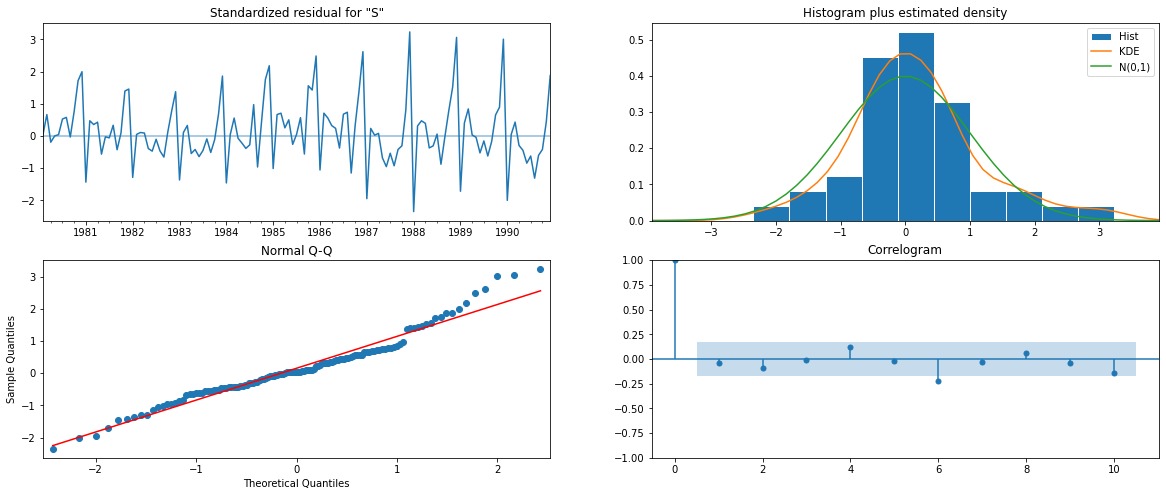

In [404]:
results_auto_ARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.


In [410]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [411]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [412]:
rmse = mean_squared_error(test['Sparkling'], predicted_auto_ARIMA, squared = False)
mape = mean_absolute_percentage_error(test['Sparkling'], predicted_auto_ARIMA)
print('RMSE',rmse,'\nMAPE', mape)

RMSE 1333.297297622849 
MAPE 47.10001658999489


In [413]:
resultsDf_9 = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf_9

RMSE       MAPE
ARIMA(2,1,2)  1333.297298  47.100017

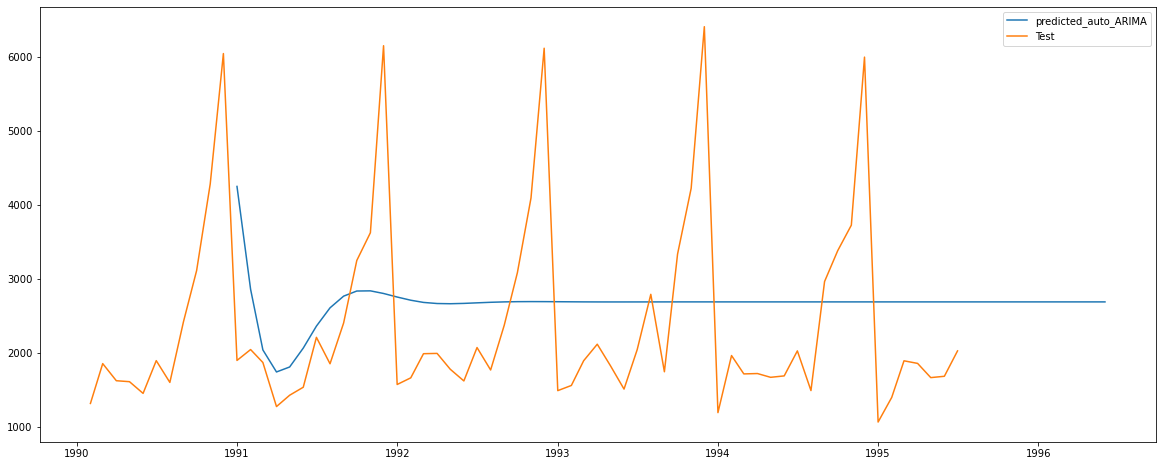

In [414]:
plt.plot(predicted_auto_ARIMA, label='predicted_auto_ARIMA')
plt.plot(test['Sparkling'], label='Test')
plt.legend(loc='best')

## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

In [144]:
plot_acf(train.diff(), title = 'Training Data Autocorrelation',missing = 'drop' );

ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.

In [145]:
plot_pacf(train.diff().dropna(), title = 'Training Data Partial Autocorrelation',zero=False,method= 'ywm');

### ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 3

In [570]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(3,1,2))
results_manual_ARIMA = manual_ARIMA.fit()

C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [573]:
print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1109.379
Date:                Fri, 09 Sep 2022   AIC                           2230.757
Time:                        22:40:18   BIC                           2248.008
Sample:                    01-01-1980   HQIC                          2237.767
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4326      0.043    -10.044      0.000      -0.517      -0.348
ar.L2          0.3289      0.109      3.005      0.003       0.114       0.543
ar.L3         -0.2385      0.066     -3.591      0.0

In [428]:
results_manual_ARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [574]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [575]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1364.5028653287134 
MAPE: 43.81298787584057


In [673]:
resultsDf_10 = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(3,1,2)'])


resultsDf_10 = pd.concat([resultsDf_9,resultsDf_10])

resultsDf_10

RMSE       MAPE
ARIMA(2,1,2)  1333.297298  47.100017
ARIMA(3,1,2)  1809.550651  34.833631

In [584]:
predicted_manual_ARIMA.tail(12)

1995-07-01    2369.821875
1995-08-01    2695.578061
1995-09-01    2369.821898
1995-10-01    2695.578039
1995-11-01    2369.821921
1995-12-01    2695.578016
1996-01-01    2369.821943
1996-02-01    2695.577993
1996-03-01    2369.821966
1996-04-01    2695.577971
1996-05-01    2369.821989
1996-06-01    2695.577948
Freq: MS, Name: predicted_mean, dtype: float64

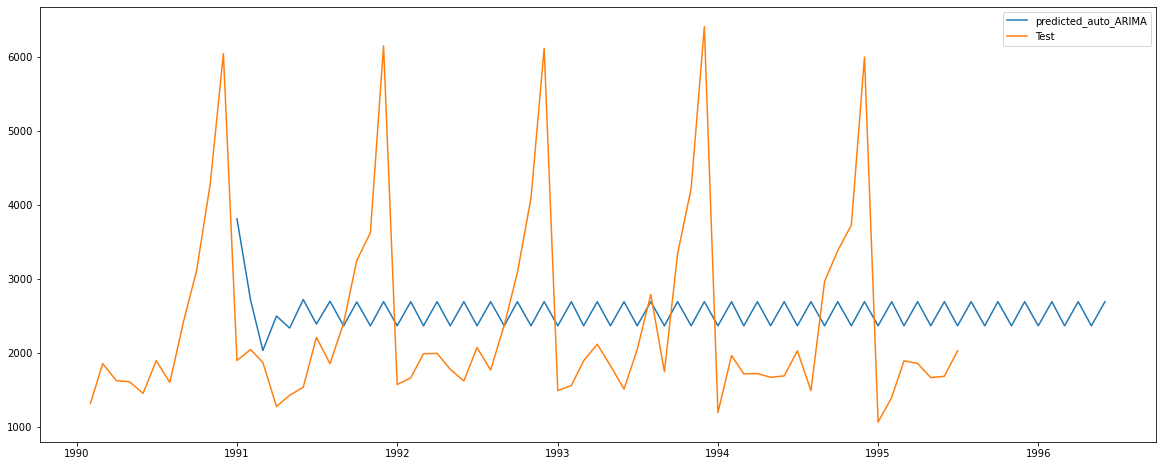

In [580]:
plt.plot(predicted_manual_ARIMA, label='predicted_auto_ARIMA')
plt.plot(test['Sparkling'], label='Test')
plt.legend(loc='best')

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

In [585]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop',lags=40);

We can see that there is a seasonality.

In [586]:
p = q = range(0, 6)
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (0, 1, 4)(0, 0, 4, 12)
Model: (0, 1, 5)(0, 0, 5, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 4)(0, 1, 4, 12)
Model: (1, 1, 5)(0, 1, 5, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 4)(1, 0, 4, 12)
Model: (2, 1, 5)(1, 0, 5, 12)
Model: (3, 1, 0)(1, 1, 0, 12)
Model: (3, 1, 1)(1, 1, 1, 12)
Model: (3, 1, 2)(1, 1, 2, 12)
Model: (3, 1, 3)(1, 1, 3, 12)
Model: (3, 1, 4)(1, 1, 4, 12)
Model: (3, 1, 5)(1, 1, 5, 12)
Model: (4, 1, 0)(2, 0, 0, 12)
Model: (4, 1, 1)(2, 0, 1, 12)
Model: (4, 1, 2)(2, 0, 2, 12)
Model: (4, 1, 3)(2, 0, 3, 12)
Model: (4, 1, 4)(2, 0, 4, 12)
Model: (4, 1, 5)(2, 0, 5, 12)
Model: (5, 1, 0)(2, 1, 0, 12)
Model: (5, 1, 1)(2, 1, 1, 12)
Model: (5, 1,

In [154]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [155]:
for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.261461684553


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236705


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3650.8176572419843


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(0, 0, 4, 12) - AIC:1307.271895095102


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(0, 0, 5, 12) - AIC:1122.8860319206128
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1822.9824851895298
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:1626.8626334678781


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:1452.6773574253873


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 0)x(0, 1, 3, 12) - AIC:2971.3781834120573
SARIMA(0, 1, 0)x(0, 1, 4, 12) - AIC:1090.0761720859314


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(0, 1, 5, 12) - AIC:909.0670877852544
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389308


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791933


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:6532.776726029097


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(1, 0, 4, 12) - AIC:1276.6279770220003


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(1, 0, 5, 12) - AIC:1097.3199574334528
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:1646.3778167661442
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:1628.3243908182951


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:1454.5289621307793


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 0)x(1, 1, 3, 12) - AIC:3409.8776947986057
SARIMA(0, 1, 0)x(1, 1, 4, 12) - AIC:1086.793290987932


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(1, 1, 5, 12) - AIC:902.3754989269504
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158613328


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920738


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3990.005140188904
SARIMA(0, 1, 0)x(2, 0, 4, 12) - AIC:1272.8547734272145


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(2, 0, 5, 12) - AIC:1089.2365380222125
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:1466.6211360755017


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:1468.5000981866647


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:1455.9911553654667


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 0)x(2, 1, 3, 12) - AIC:3470.1937190394965
SARIMA(0, 1, 0)x(2, 1, 4, 12) - AIC:1091.3264254821265


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(2, 1, 5, 12) - AIC:904.2815841532547
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308408


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.187105262566


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.059453006504


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:2858.5655611603
SARIMA(0, 1, 0)x(3, 0, 4, 12) - AIC:1273.7609424290517


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(3, 0, 5, 12) - AIC:1091.31259854001
SARIMA(0, 1, 0)x(3, 1, 0, 12) - AIC:1289.239819743992


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(3, 1, 1, 12) - AIC:1291.2448875094346


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(3, 1, 2, 12) - AIC:1288.6070380278882


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(3, 1, 3, 12) - AIC:3184.5990316223


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(3, 1, 4, 12) - AIC:1091.1691881851896


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(3, 1, 5, 12) - AIC:901.3895367854991
SARIMA(0, 1, 0)x(4, 0, 0, 12) - AIC:1289.523636142718


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(4, 0, 1, 12) - AIC:1291.5136924962885


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(4, 0, 2, 12) - AIC:1289.1875937945679


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 0)x(4, 0, 3, 12) - AIC:2407.3080493132043
SARIMA(0, 1, 0)x(4, 0, 4, 12) - AIC:1275.469342354643


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(4, 0, 5, 12) - AIC:1093.0865146289411
SARIMA(0, 1, 0)x(4, 1, 0, 12) - AIC:1105.7417371769675


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(4, 1, 1, 12) - AIC:1107.6019093259843


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(4, 1, 2, 12) - AIC:1102.605037281767


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 0)x(4, 1, 3, 12) - AIC:2821.7619191811305
SARIMA(0, 1, 0)x(4, 1, 4, 12) - AIC:1092.9817724970853


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(4, 1, 5, 12) - AIC:898.8975803234586


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(5, 0, 0, 12) - AIC:1106.3797285175435
SARIMA(0, 1, 0)x(5, 0, 1, 12) - AIC:1102.5905532671766


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(5, 0, 2, 12) - AIC:1104.116126151653


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 0)x(5, 0, 3, 12) - AIC:2657.6439398013695
SARIMA(0, 1, 0)x(5, 0, 4, 12) - AIC:1100.5266771032102


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(5, 0, 5, 12) - AIC:1089.2313479132943
SARIMA(0, 1, 0)x(5, 1, 0, 12) - AIC:919.8895743613699


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(5, 1, 1, 12) - AIC:916.97641324593


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(5, 1, 2, 12) - AIC:918.8552749308963


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(5, 1, 3, 12) - AIC:2414.699298983166


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(5, 1, 4, 12) - AIC:911.0997022652506


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(5, 1, 5, 12) - AIC:900.2012665243387
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566726


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572821226


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:6599.532324980735


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)x(0, 0, 4, 12) - AIC:1275.2879409549805


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)x(0, 0, 5, 12) - AIC:1094.4254482020153
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1760.656571982843
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:1569.6639234230104


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:1399.1083846680017


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 1)x(0, 1, 3, 12) - AIC:3682.1585231310346
SARIMA(0, 1, 1)x(0, 1, 4, 12) - AIC:1053.1461668762763


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)x(0, 1, 5, 12) - AIC:874.8397880225842
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.179588183803


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193766617


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319653843568


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:7183.8517410077575


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)x(1, 0, 4, 12) - AIC:1230.8386562036474


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)x(1, 0, 5, 12) - AIC:1056.8291995714883
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:1602.8594819023867


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:1570.8550259196


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:1400.6709524137245


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 1)x(1, 1, 3, 12) - AIC:3691.645518371499
SARIMA(0, 1, 1)x(1, 1, 4, 12) - AIC:1050.3860234089611


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)x(1, 1, 5, 12) - AIC:870.1755237000301


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954175065


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.224508535863


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018824729283


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:2605.782991986298
SARIMA(0, 1, 1)x(2, 0, 4, 12) - AIC:1227.214750224449


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)x(2, 0, 5, 12) - AIC:1053.4551325630352


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:1428.2448811163351


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:1429.616802796347


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:1402.638588852292


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 1)x(2, 1, 3, 12) - AIC:3694.7404780143447
SARIMA(0, 1, 1)x(2, 1, 4, 12) - AIC:1053.9767505401421


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)x(2, 1, 5, 12) - AIC:871.3232283443166


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:1428.4607679626317


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:1428.872799048972


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:1429.5891874009726


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:2468.851492103779
SARIMA(0, 1, 1)x(3, 0, 4, 12) - AIC:1225.888467242262


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)x(3, 0, 5, 12) - AIC:1054.9671975239614


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(3, 1, 0, 12) - AIC:1255.5784542932377


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(3, 1, 1, 12) - AIC:1257.4558568590373


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(3, 1, 2, 12) - AIC:1258.2925125564764


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 1)x(3, 1, 3, 12) - AIC:3488.678186787829
SARIMA(0, 1, 1)x(3, 1, 4, 12) - AIC:1055.6991251775


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)x(3, 1, 5, 12) - AIC:870.5629815913605


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(4, 0, 0, 12) - AIC:1253.5353815303463


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(4, 0, 1, 12) - AIC:1255.4731949497748


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(4, 0, 2, 12) - AIC:1257.6854250623671


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 1)x(4, 0, 3, 12) - AIC:2660.5912016885964
SARIMA(0, 1, 1)x(4, 0, 4, 12) - AIC:1229.0293850962232


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)x(4, 0, 5, 12) - AIC:1053.3536599217284


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(4, 1, 0, 12) - AIC:1081.6086501677735


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(4, 1, 1, 12) - AIC:1079.503071094007


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(4, 1, 2, 12) - AIC:1081.7074946344335


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 1)x(4, 1, 3, 12) - AIC:2365.121493453906
SARIMA(0, 1, 1)x(4, 1, 4, 12) - AIC:1055.1012232819844


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)x(4, 1, 5, 12) - AIC:872.8013744032361


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(5, 0, 0, 12) - AIC:1081.190648498859


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(5, 0, 1, 12) - AIC:1078.0833145520508


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(5, 0, 2, 12) - AIC:1079.9003103470118


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 1)x(5, 0, 3, 12) - AIC:2361.6571260933847
SARIMA(0, 1, 1)x(5, 0, 4, 12) - AIC:1082.3209100179795


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)x(5, 0, 5, 12) - AIC:1054.3528979883888


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(5, 1, 0, 12) - AIC:904.5209998686281


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(5, 1, 1, 12) - AIC:900.7022718415062


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(5, 1, 2, 12) - AIC:899.1832249054108


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(5, 1, 3, 12) - AIC:2411.724553168062


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)x(5, 1, 4, 12) - AIC:896.4244848917868


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)x(5, 1, 5, 12) - AIC:869.618876131714
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2187.441010168703
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.9128007200654


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1659.8789893427254


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:1544.1381079141993
SARIMA(0, 1, 2)x(0, 0, 4, 12) - AIC:1251.0339157100734


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)x(0, 0, 5, 12) - AIC:1071.3832621566287
SARIMA(0, 1, 2)x(0, 1, 0, 12) - AIC:1741.3207220431482


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 1, 1, 12) - AIC:1554.742903962326


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 1, 2, 12) - AIC:1382.4842540790864


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 1, 3, 12) - AIC:3196.7264453462067


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)x(0, 1, 4, 12) - AIC:1036.7912530102349


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)x(0, 1, 5, 12) - AIC:860.3538281606379
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.032633217488


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1724.1675071097636


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.1605067590917
SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:7106.333609903628


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)x(1, 0, 4, 12) - AIC:1216.5860740659336


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)x(1, 0, 5, 12) - AIC:1043.2545807402994
SARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC:1601.758729300088


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 1, 1, 12) - AIC:1556.1559716208392


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 1, 2, 12) - AIC:1384.3988672021953


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 2)x(1, 1, 3, 12) - AIC:3294.781546430292
SARIMA(0, 1, 2)x(1, 1, 4, 12) - AIC:1034.2061170921688


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)x(1, 1, 5, 12) - AIC:856.0656654703191


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.9654774511769


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.543515674843


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1557.1215742755337


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:3584.259067424287


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)x(2, 0, 4, 12) - AIC:1213.5515002713587


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)x(2, 0, 5, 12) - AIC:1038.9689712515024


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 1, 0, 12) - AIC:1427.0773415735543


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 1, 1, 12) - AIC:1428.5534767511194


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 1, 2, 12) - AIC:1386.0237342752116


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 2)x(2, 1, 3, 12) - AIC:2712.423640406929
SARIMA(0, 1, 2)x(2, 1, 4, 12) - AIC:1038.310378526805


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)x(2, 1, 5, 12) - AIC:857.8178986836075


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:1428.5993407934304


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:1429.7448450098339


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:1430.6883835905173


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3084.3963321627743
SARIMA(0, 1, 2)x(3, 0, 4, 12) - AIC:1213.2840513648953


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)x(3, 0, 5, 12) - AIC:1040.1658342376804


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(3, 1, 0, 12) - AIC:1254.6525579265062


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(3, 1, 1, 12) - AIC:1256.9866634023942


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(3, 1, 2, 12) - AIC:1257.4253260793598


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 2)x(3, 1, 3, 12) - AIC:5726.935437480002
SARIMA(0, 1, 2)x(3, 1, 4, 12) - AIC:1040.010225499741


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)x(3, 1, 5, 12) - AIC:857.4230802824062


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(4, 0, 0, 12) - AIC:1254.6863903650863


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(4, 0, 1, 12) - AIC:1256.6785126480095


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(4, 0, 2, 12) - AIC:1258.6731857628936


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 2)x(4, 0, 3, 12) - AIC:2978.439396350344
SARIMA(0, 1, 2)x(4, 0, 4, 12) - AIC:1215.9310824318122


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)x(4, 0, 5, 12) - AIC:1042.1960761237756


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(4, 1, 0, 12) - AIC:1080.1576529701167


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(4, 1, 1, 12) - AIC:1077.8255797976842


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(4, 1, 2, 12) - AIC:1081.4726742800028


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(4, 1, 3, 12) - AIC:2866.887978436576


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)x(4, 1, 4, 12) - AIC:1035.8828754719214


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)x(4, 1, 5, 12) - AIC:857.4887551305274


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(5, 0, 0, 12) - AIC:1081.3299180205656


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(5, 0, 1, 12) - AIC:1078.6073267744825


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(5, 0, 2, 12) - AIC:1080.238127602112


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(5, 0, 3, 12) - AIC:2508.2436175659004


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)x(5, 0, 4, 12) - AIC:1088.4353683703148


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)x(5, 0, 5, 12) - AIC:1037.7448236638743


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(5, 1, 0, 12) - AIC:902.7806508949219


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(5, 1, 1, 12) - AIC:899.5253318451568


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(5, 1, 2, 12) - AIC:899.4316952435797


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(5, 1, 3, 12) - AIC:2180.1525635124135


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)x(5, 1, 4, 12) - AIC:895.931734595177


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)x(5, 1, 5, 12) - AIC:858.1346425843165
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:2168.092540843793


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1873.9770701767752


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:1643.2973661231956


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:1018.3087379034462
SARIMA(0, 1, 3)x(0, 0, 4, 12) - AIC:1239.0451094382113


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)x(0, 0, 5, 12) - AIC:1058.8372060021175
SARIMA(0, 1, 3)x(0, 1, 0, 12) - AIC:1727.2607378274865


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(0, 1, 1, 12) - AIC:1540.794818431288


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(0, 1, 2, 12) - AIC:1369.960367103454


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 3)x(0, 1, 3, 12) - AIC:3485.856501869981
SARIMA(0, 1, 3)x(0, 1, 4, 12) - AIC:1024.3561161456432


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)x(0, 1, 5, 12) - AIC:847.3078218187654


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1792.031817660381


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1710.6404077706738


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:1542.7418976537033


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:2036.3191101431962


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)x(1, 0, 4, 12) - AIC:1203.1078904020032


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)x(1, 0, 5, 12) - AIC:1029.593437962525


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(1, 1, 0, 12) - AIC:1602.1924100607496


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(1, 1, 1, 12) - AIC:1542.6814540462317


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(1, 1, 2, 12) - AIC:1371.7363271430363


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 3)x(1, 1, 3, 12) - AIC:3301.1212332359382
SARIMA(0, 1, 3)x(1, 1, 4, 12) - AIC:1020.9478019382982


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)x(1, 1, 5, 12) - AIC:843.3965309815368


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:1604.5715806973774


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:1601.0674829618224


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:1543.0488958460699


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:3184.0505389172627
SARIMA(0, 1, 3)x(2, 0, 4, 12) - AIC:1201.474748054276


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)x(2, 0, 5, 12) - AIC:1025.3855502583442


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 1, 0, 12) - AIC:1428.3896856876945


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 1, 1, 12) - AIC:1429.8265181294066


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 1, 2, 12) - AIC:1373.4524731676856


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 1, 3, 12) - AIC:3359.6263315192523


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)x(2, 1, 4, 12) - AIC:1026.038693639469


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)x(2, 1, 5, 12) - AIC:845.2022724226738


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:1429.6529456421736


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:1441.14351753829


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:1431.1544785255976


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:1783.7941359871897
SARIMA(0, 1, 3)x(3, 0, 4, 12) - AIC:1202.107034127657


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)x(3, 0, 5, 12) - AIC:1027.1695951405438


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(3, 1, 0, 12) - AIC:1256.0020281098946


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(3, 1, 1, 12) - AIC:1258.074761357547


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(3, 1, 2, 12) - AIC:1258.9452629542766


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 3)x(3, 1, 3, 12) - AIC:574.2781052679331
SARIMA(0, 1, 3)x(3, 1, 4, 12) - AIC:1027.8350526913064


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)x(3, 1, 5, 12) - AIC:846.3980895153508


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(4, 0, 0, 12) - AIC:1255.327485230685


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(4, 0, 1, 12) - AIC:1257.3085578897396


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(4, 0, 2, 12) - AIC:1259.594726893251


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 3)x(4, 0, 3, 12) - AIC:3175.8786043982527
SARIMA(0, 1, 3)x(4, 0, 4, 12) - AIC:1202.9023591561904


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)x(4, 0, 5, 12) - AIC:1028.34597826195


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(4, 1, 0, 12) - AIC:1081.7055976358465


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(4, 1, 1, 12) - AIC:1079.722501371935


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(4, 1, 2, 12) - AIC:1083.1749539760478


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(4, 1, 3, 12) - AIC:2657.7538875116234


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)x(4, 1, 4, 12) - AIC:1023.041812330033


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)x(4, 1, 5, 12) - AIC:844.4330421317426


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(5, 0, 0, 12) - AIC:1082.438080788042


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(5, 0, 1, 12) - AIC:1080.5317321089676


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(5, 0, 2, 12) - AIC:1082.1057721313805


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(5, 0, 3, 12) - AIC:2298.1476289464626


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)x(5, 0, 4, 12) - AIC:1085.6053284229336


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(5, 0, 5, 12) - AIC:1023.5640945673531


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(5, 1, 0, 12) - AIC:904.348748373395


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(5, 1, 1, 12) - AIC:901.5189554501434


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(5, 1, 2, 12) - AIC:901.4238833051008


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(5, 1, 3, 12) - AIC:2673.066833528882


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)x(5, 1, 4, 12) - AIC:897.8226036081983


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)x(5, 1, 5, 12) - AIC:845.5280020882374
SARIMA(0, 1, 4)x(0, 0, 0, 12) - AIC:2153.076551153488


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(0, 0, 1, 12) - AIC:1860.6759302334467


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(0, 0, 2, 12) - AIC:1630.4699915024762


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 4)x(0, 0, 3, 12) - AIC:4739.6288884902415
SARIMA(0, 1, 4)x(0, 0, 4, 12) - AIC:1226.9308534932275


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)x(0, 0, 5, 12) - AIC:1046.0490811601876
SARIMA(0, 1, 4)x(0, 1, 0, 12) - AIC:1714.1883178384999


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(0, 1, 1, 12) - AIC:1528.4392921077515


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(0, 1, 2, 12) - AIC:1356.235858095687


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 4)x(0, 1, 3, 12) - AIC:3466.689053724145
SARIMA(0, 1, 4)x(0, 1, 4, 12) - AIC:1010.7942575234906


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)x(0, 1, 5, 12) - AIC:833.4835137298476


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(1, 0, 0, 12) - AIC:1793.9865664360077


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(1, 0, 1, 12) - AIC:1698.6256692449751


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(1, 0, 2, 12) - AIC:1530.2478326114147


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(1, 0, 3, 12) - AIC:6936.31751261132


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)x(1, 0, 4, 12) - AIC:1190.4894123652032


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)x(1, 0, 5, 12) - AIC:1017.1714618422884


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(1, 1, 0, 12) - AIC:1603.5157014288043


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(1, 1, 1, 12) - AIC:1530.0906125213867


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(1, 1, 2, 12) - AIC:1357.9044404317694


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 4)x(1, 1, 3, 12) - AIC:3167.336539790153
SARIMA(0, 1, 4)x(1, 1, 4, 12) - AIC:1008.6696526300108


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)x(1, 1, 5, 12) - AIC:830.0608811958245


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(2, 0, 0, 12) - AIC:1605.6937882945442


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(2, 0, 1, 12) - AIC:1602.7613753813814


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(2, 0, 2, 12) - AIC:1530.7635014451985


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 4)x(2, 0, 3, 12) - AIC:584.6799267643328
SARIMA(0, 1, 4)x(2, 0, 4, 12) - AIC:1190.6278391091535


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)x(2, 0, 5, 12) - AIC:1013.1338218315229


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(2, 1, 0, 12) - AIC:1428.4293404648122


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(2, 1, 1, 12) - AIC:1430.204062779707


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(2, 1, 2, 12) - AIC:1359.5592408307723


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 4)x(2, 1, 3, 12) - AIC:3460.470669506095
SARIMA(0, 1, 4)x(2, 1, 4, 12) - AIC:1011.11709378445


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)x(2, 1, 5, 12) - AIC:831.1022120868422


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(3, 0, 0, 12) - AIC:1429.7981166965826


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(3, 0, 1, 12) - AIC:1431.2579014726591


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(3, 0, 2, 12) - AIC:1432.5508872541136


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 4)x(3, 0, 3, 12) - AIC:223.10970704705483
SARIMA(0, 1, 4)x(3, 0, 4, 12) - AIC:1190.0239443456885


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)x(3, 0, 5, 12) - AIC:1014.0981634563518


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(3, 1, 0, 12) - AIC:1257.1773441406983


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(3, 1, 1, 12) - AIC:1259.0984690136202


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(3, 1, 2, 12) - AIC:1259.7536596800423


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 4)x(3, 1, 3, 12) - AIC:2175.49458578971
SARIMA(0, 1, 4)x(3, 1, 4, 12) - AIC:1014.2159387375341


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)x(3, 1, 5, 12) - AIC:833.3820857471791


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(4, 0, 0, 12) - AIC:1256.9163065114487


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(4, 0, 1, 12) - AIC:1258.9160852688074


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(4, 0, 2, 12) - AIC:1261.146684201544


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 4)x(4, 0, 3, 12) - AIC:5146.583554146706
SARIMA(0, 1, 4)x(4, 0, 4, 12) - AIC:1189.7100460985228


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)x(4, 0, 5, 12) - AIC:1017.5346568853494


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(4, 1, 0, 12) - AIC:1083.0604002965852


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(4, 1, 1, 12) - AIC:1081.0265822443628


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(4, 1, 2, 12) - AIC:1083.8285648096692


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 4)x(4, 1, 3, 12) - AIC:2719.734627118298
SARIMA(0, 1, 4)x(4, 1, 4, 12) - AIC:1011.0223056701266


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)x(4, 1, 5, 12) - AIC:830.0114258594866


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(5, 0, 0, 12) - AIC:1084.2025455502842


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(5, 0, 1, 12) - AIC:1081.9314045375847


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(5, 0, 2, 12) - AIC:1090.2793895543605


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 4)x(5, 0, 3, 12) - AIC:444.7967150424455


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)x(5, 0, 4, 12) - AIC:1083.4378328402113


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 4)x(5, 0, 5, 12) - AIC:1013.4902366209077


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(5, 1, 0, 12) - AIC:905.1628030762512


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(5, 1, 1, 12) - AIC:902.021538304738


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 4)x(5, 1, 2, 12) - AIC:900.3757666644586


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 4)x(5, 1, 3, 12) - AIC:1784.2379164139813


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)x(5, 1, 4, 12) - AIC:899.0315583377859


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)x(5, 1, 5, 12) - AIC:828.669235314751
SARIMA(0, 1, 5)x(0, 0, 0, 12) - AIC:2135.1081521299457


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(0, 0, 1, 12) - AIC:1843.8500714964082


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(0, 0, 2, 12) - AIC:1616.4669822895848


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 5)x(0, 0, 3, 12) - AIC:415.5532287136022
SARIMA(0, 1, 5)x(0, 0, 4, 12) - AIC:1213.9613421065867


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 5)x(0, 0, 5, 12) - AIC:1033.1599283573323


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(0, 1, 0, 12) - AIC:1701.015414296712


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(0, 1, 1, 12) - AIC:1514.161911108537


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(0, 1, 2, 12) - AIC:1343.5636456520192


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 5)x(0, 1, 3, 12) - AIC:3126.8696960576503
SARIMA(0, 1, 5)x(0, 1, 4, 12) - AIC:996.4065532812226


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 5)x(0, 1, 5, 12) - AIC:817.7784766838178


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(1, 0, 0, 12) - AIC:1795.9531094181375


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(1, 0, 1, 12) - AIC:1684.8472920197876


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(1, 0, 2, 12) - AIC:1516.3049464424237


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 5)x(1, 0, 3, 12) - AIC:20.0
SARIMA(0, 1, 5)x(1, 0, 4, 12) - AIC:1176.6776641269412


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 5)x(1, 0, 5, 12) - AIC:1002.5780752903249


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(1, 1, 0, 12) - AIC:1603.4809611601083


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(1, 1, 1, 12) - AIC:1516.0268529917842


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(1, 1, 2, 12) - AIC:1345.295329093207


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 5)x(1, 1, 3, 12) - AIC:3167.639356728066
SARIMA(0, 1, 5)x(1, 1, 4, 12) - AIC:998.4790779662953


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 5)x(1, 1, 5, 12) - AIC:814.9450442112532


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(2, 0, 0, 12) - AIC:1606.055730223473


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(2, 0, 1, 12) - AIC:1602.6367450733123


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(2, 0, 2, 12) - AIC:1516.980541084765


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(2, 0, 3, 12) - AIC:251.53079133918567


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 5)x(2, 0, 4, 12) - AIC:1176.3243100904178


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 5)x(2, 0, 5, 12) - AIC:1000.6682490404686


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(2, 1, 0, 12) - AIC:1429.4436601590985


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(2, 1, 1, 12) - AIC:1431.1050078864523


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(2, 1, 2, 12) - AIC:1346.3016446092138


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(2, 1, 3, 12) - AIC:3279.0281965445706


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 5)x(2, 1, 4, 12) - AIC:997.6176927060181


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 5)x(2, 1, 5, 12) - AIC:816.2021260780381


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(3, 0, 0, 12) - AIC:1430.7700957255167


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(3, 0, 1, 12) - AIC:1432.1857931778366


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(3, 0, 2, 12) - AIC:1433.5110006502791


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 5)x(3, 0, 3, 12) - AIC:24.0
SARIMA(0, 1, 5)x(3, 0, 4, 12) - AIC:1175.2718870692302


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 5)x(3, 0, 5, 12) - AIC:1001.24811848715


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(3, 1, 0, 12) - AIC:1258.136985132181


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(3, 1, 1, 12) - AIC:1260.0540823290492


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(3, 1, 2, 12) - AIC:1260.5849258992534


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(3, 1, 3, 12) - AIC:4787.693134811601


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 5)x(3, 1, 4, 12) - AIC:1000.6245220074919


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 5)x(3, 1, 5, 12) - AIC:815.9942111083242


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(4, 0, 0, 12) - AIC:1258.139650255823


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(4, 0, 1, 12) - AIC:1260.1375362776641


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(4, 0, 2, 12) - AIC:1262.1370400812948


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(0, 1, 5)x(4, 0, 3, 12) - AIC:967.9477434194976
SARIMA(0, 1, 5)x(4, 0, 4, 12) - AIC:1179.5946296178706


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 5)x(4, 0, 5, 12) - AIC:1003.4137664766131


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(4, 1, 0, 12) - AIC:1083.0195506935504


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(4, 1, 1, 12) - AIC:1081.4377181403015


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(4, 1, 2, 12) - AIC:1084.532535534233


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 5)x(4, 1, 3, 12) - AIC:2800.6828453792746


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 5)x(4, 1, 4, 12) - AIC:1001.344015509941


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 5)x(4, 1, 5, 12) - AIC:813.0326998681012


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(5, 0, 0, 12) - AIC:1084.9586932806174


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(5, 0, 1, 12) - AIC:1086.9019609311679


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(5, 0, 2, 12) - AIC:1085.1777054000886


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 5)x(5, 0, 3, 12) - AIC:4426.727128761329


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 5)x(5, 0, 4, 12) - AIC:1084.7794461406183


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 5)x(5, 0, 5, 12) - AIC:1005.1457343225006


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(5, 1, 0, 12) - AIC:906.4121159355016


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(5, 1, 1, 12) - AIC:903.5641554806028


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 5)x(5, 1, 2, 12) - AIC:901.9012673283848


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 5)x(5, 1, 3, 12) - AIC:2298.7268161359193


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 5)x(5, 1, 4, 12) - AIC:900.8688658103497


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 5)x(5, 1, 5, 12) - AIC:814.56835252403
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1954.3938339904792


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476355281


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3933.872538940978


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)x(0, 0, 4, 12) - AIC:1304.3457176392983


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)x(0, 0, 5, 12) - AIC:1121.285095013052
SARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:1810.9513015567375
SARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:1613.740703340998


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 1, 2, 12) - AIC:1441.425999423404


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 0)x(0, 1, 3, 12) - AIC:3306.1780394121633
SARIMA(1, 1, 0)x(0, 1, 4, 12) - AIC:1085.0892458535877


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)x(0, 1, 5, 12) - AIC:904.1491320342678
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.244027933166


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1788.5343592674053


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.4894402591449
SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:7261.962268544429


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)x(1, 0, 4, 12) - AIC:1268.2969033075303


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)x(1, 0, 5, 12) - AIC:1090.793705842297
SARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:1619.6703363508395


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:1615.7404485219045


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 1, 2, 12) - AIC:1443.1035528175576


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 0)x(1, 1, 3, 12) - AIC:4083.27323685608
SARIMA(1, 1, 0)x(1, 1, 4, 12) - AIC:1081.9314309854424


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)x(1, 1, 5, 12) - AIC:896.1760970167802
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.6355080128965


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1617.1356134186935


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1616.5412067417524


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3468.722032407622
SARIMA(1, 1, 0)x(2, 0, 4, 12) - AIC:1264.452563852112


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)x(2, 0, 5, 12) - AIC:1081.480656392657
SARIMA(1, 1, 0)x(2, 1, 0, 12) - AIC:1440.574162809973


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 1, 1, 12) - AIC:1442.505937124558


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 1, 2, 12) - AIC:1444.4274245939628


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 0)x(2, 1, 3, 12) - AIC:3449.5928164426177
SARIMA(1, 1, 0)x(2, 1, 4, 12) - AIC:1084.5864785416752


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)x(2, 1, 5, 12) - AIC:898.0823130898295


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:1440.5134640370259


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:1442.1719780402789


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:1443.7660392593002


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:2671.7086293499156
SARIMA(1, 1, 0)x(3, 0, 4, 12) - AIC:1262.3911360857633


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)x(3, 0, 5, 12) - AIC:1090.0434528623566
SARIMA(1, 1, 0)x(3, 1, 0, 12) - AIC:1265.1747644704737


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(3, 1, 1, 12) - AIC:1267.159202727464


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(3, 1, 2, 12) - AIC:1263.98496941519


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 0)x(3, 1, 3, 12) - AIC:3281.602204844135
SARIMA(1, 1, 0)x(3, 1, 4, 12) - AIC:1085.2890452592899


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)x(3, 1, 5, 12) - AIC:897.8932630214891


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(4, 0, 0, 12) - AIC:1264.1284440767188


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(4, 0, 1, 12) - AIC:1262.4714499269785


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(4, 0, 2, 12) - AIC:1264.475623811891


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 0)x(4, 0, 3, 12) - AIC:2600.0458985147056
SARIMA(1, 1, 0)x(4, 0, 4, 12) - AIC:1264.358111404927


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)x(4, 0, 5, 12) - AIC:1085.1380842045855


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(4, 1, 0, 12) - AIC:1085.1433945091012


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(4, 1, 1, 12) - AIC:1087.0744067871824


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(4, 1, 2, 12) - AIC:1086.962069662485


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 0)x(4, 1, 3, 12) - AIC:3222.2574934884933


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)x(4, 1, 4, 12) - AIC:1085.932127075447
SARIMA(1, 1, 0)x(4, 1, 5, 12) - AIC:894.4468734576598


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(5, 0, 0, 12) - AIC:1085.2143543014085


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(5, 0, 1, 12) - AIC:1080.7900030513258


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(5, 0, 2, 12) - AIC:1082.5772507221454


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 0)x(5, 0, 3, 12) - AIC:1644.2271180080086
SARIMA(1, 1, 0)x(5, 0, 4, 12) - AIC:1081.1851591664408


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)x(5, 0, 5, 12) - AIC:1088.7222653823233


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(5, 1, 0, 12) - AIC:901.3862032854225


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(5, 1, 1, 12) - AIC:896.9262972253659


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(5, 1, 2, 12) - AIC:897.8315861389569


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(5, 1, 3, 12) - AIC:2204.6989099792095


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)x(5, 1, 4, 12) - AIC:893.6275666586151


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)x(5, 1, 5, 12) - AIC:895.2677199745326
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2204.9340491545727
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.3558974131313


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1678.098135262533


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:7216.541943024384


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)x(0, 0, 4, 12) - AIC:1290.939737088073


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)x(0, 0, 5, 12) - AIC:1089.2021626543847
SARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:1757.365416274411


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:1569.3827366812864


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 1, 2, 12) - AIC:1398.7561672221086


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 1)x(0, 1, 3, 12) - AIC:2523.8794882474344
SARIMA(1, 1, 1)x(0, 1, 4, 12) - AIC:1051.5498032122682


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)x(0, 1, 5, 12) - AIC:874.8841097032196


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.1424469157992


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.7167467427319


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1571.3248863545818


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:718.8785453718247
SARIMA(1, 1, 1)x(1, 0, 4, 12) - AIC:1231.404462287595


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)x(1, 0, 5, 12) - AIC:1057.554390117247
SARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:1588.065567268922


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:1570.6724644579724


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:1400.4523886146885


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 1)x(1, 1, 3, 12) - AIC:3299.1719770283057
SARIMA(1, 1, 1)x(1, 1, 4, 12) - AIC:1049.2486585134989


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)x(1, 1, 5, 12) - AIC:869.9929154598948


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.616160688121


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1586.3140615064303


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1571.8069968635252


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:1395.3531711064634
SARIMA(1, 1, 1)x(2, 0, 4, 12) - AIC:1227.7693284355348


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)x(2, 0, 5, 12) - AIC:1053.13716895162


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 1, 0, 12) - AIC:1413.567985960827


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:1414.8736681603887


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 1, 2, 12) - AIC:1402.2732672814504


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 1, 3, 12) - AIC:3442.224466494851


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)x(2, 1, 4, 12) - AIC:1052.5489688889331


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)x(2, 1, 5, 12) - AIC:871.5625508397707


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:1414.9112074837815


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:1415.9502497589062


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:1417.0148960734298


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:2549.481217035767


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)x(3, 0, 4, 12) - AIC:1229.4556115206246


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)x(3, 0, 5, 12) - AIC:1056.2523355066135


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(3, 1, 0, 12) - AIC:1240.8275546128887


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(3, 1, 1, 12) - AIC:1242.6640988962208


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(3, 1, 2, 12) - AIC:1243.1145005291514


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 1)x(3, 1, 3, 12) - AIC:1445.52998119451
SARIMA(1, 1, 1)x(3, 1, 4, 12) - AIC:1054.2730490109454


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)x(3, 1, 5, 12) - AIC:871.2080282815543


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(4, 0, 0, 12) - AIC:1240.689035790784


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(4, 0, 1, 12) - AIC:1242.6873637676229


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(4, 0, 2, 12) - AIC:1244.687317768797


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 1)x(4, 0, 3, 12) - AIC:2668.064647594703
SARIMA(1, 1, 1)x(4, 0, 4, 12) - AIC:1229.373347261629


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)x(4, 0, 5, 12) - AIC:1056.8891916485827


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(4, 1, 0, 12) - AIC:1066.3778598464482


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(4, 1, 1, 12) - AIC:1063.5410969299412


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(4, 1, 2, 12) - AIC:1067.4519823145465


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 1)x(4, 1, 3, 12) - AIC:2810.859819869205
SARIMA(1, 1, 1)x(4, 1, 4, 12) - AIC:1055.2523303451596


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)x(4, 1, 5, 12) - AIC:872.2578371040848


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(5, 0, 0, 12) - AIC:1067.3209189053268


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(5, 0, 1, 12) - AIC:1065.1055102775565


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(5, 0, 2, 12) - AIC:1066.889730808036


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 1)x(5, 0, 3, 12) - AIC:2055.5567144121333
SARIMA(1, 1, 1)x(5, 0, 4, 12) - AIC:1072.6270489774965


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)x(5, 0, 5, 12) - AIC:1057.5018903384396


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(5, 1, 0, 12) - AIC:889.0267388983618


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(5, 1, 1, 12) - AIC:885.780337557991


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(5, 1, 2, 12) - AIC:884.5966116390438


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(5, 1, 3, 12) - AIC:2082.1003636719443


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)x(5, 1, 4, 12) - AIC:885.9001735838784


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)x(5, 1, 5, 12) - AIC:872.4656118426831
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2188.463345050487


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1889.7708307499424


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1659.6291421582187


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:14.0
SARIMA(1, 1, 2)x(0, 0, 4, 12) - AIC:1252.2535058776798


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)x(0, 0, 5, 12) - AIC:1072.8469719394407
SARIMA(1, 1, 2)x(0, 1, 0, 12) - AIC:1742.7366275429254


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 1, 1, 12) - AIC:1554.9584139014805


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 1, 2, 12) - AIC:1382.3477800331584


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 2)x(0, 1, 3, 12) - AIC:3310.2529319856776
SARIMA(1, 1, 2)x(0, 1, 4, 12) - AIC:1036.1573851368667


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)x(0, 1, 5, 12) - AIC:859.4655328049821


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1771.8259799131204


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.9952183519094


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1555.5842472143204


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:4406.13849593908
SARIMA(1, 1, 2)x(1, 0, 4, 12) - AIC:1215.1483216798645


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)x(1, 0, 5, 12) - AIC:1042.9898902277555


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC:1585.7860900921257


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:1556.1300441713972


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:1384.1378738632236


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 2)x(1, 1, 3, 12) - AIC:3221.0306437947447
SARIMA(1, 1, 2)x(1, 1, 4, 12) - AIC:1034.4692175640148


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)x(1, 1, 5, 12) - AIC:857.0509154643466


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1588.4216932678253


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1585.525085145794


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1556.076770939807


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3123.376807618958


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)x(2, 0, 4, 12) - AIC:1213.9612402743383


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)x(2, 0, 5, 12) - AIC:1039.7751638832397


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 1, 0, 12) - AIC:1411.992410967422


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 1, 1, 12) - AIC:1413.5918293997725


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 1, 2, 12) - AIC:1385.688720775507


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 2)x(2, 1, 3, 12) - AIC:3289.023245992921
SARIMA(1, 1, 2)x(2, 1, 4, 12) - AIC:1035.5623180646776


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)x(2, 1, 5, 12) - AIC:858.9182769004378


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:1413.8102394942216


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1414.9146975917229


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1415.9662800276978


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3335.080840737491
SARIMA(1, 1, 2)x(3, 0, 4, 12) - AIC:1214.7106107666373


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)x(3, 0, 5, 12) - AIC:1042.5337718298424


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 1, 0, 12) - AIC:1240.4397939411856


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 1, 1, 12) - AIC:1242.3340377996367


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 1, 2, 12) - AIC:1242.9811908159934


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 1, 3, 12) - AIC:3191.2577801561247


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)x(3, 1, 4, 12) - AIC:1034.5608621290141


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)x(3, 1, 5, 12) - AIC:859.4831780555431


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(4, 0, 0, 12) - AIC:1239.4870177325743


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(4, 0, 1, 12) - AIC:1241.479019766679


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(4, 0, 2, 12) - AIC:1243.4860467442945


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 2)x(4, 0, 3, 12) - AIC:3164.5713603673344
SARIMA(1, 1, 2)x(4, 0, 4, 12) - AIC:1216.4701081302287


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)x(4, 0, 5, 12) - AIC:1042.3709303029987


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(4, 1, 0, 12) - AIC:1066.081520469642


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(4, 1, 1, 12) - AIC:1064.9383870041231


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(4, 1, 2, 12) - AIC:1065.396710674196


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 2)x(4, 1, 3, 12) - AIC:2611.035458843987
SARIMA(1, 1, 2)x(4, 1, 4, 12) - AIC:1036.3862994269198


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)x(4, 1, 5, 12) - AIC:855.9431116760445


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(5, 0, 0, 12) - AIC:1067.0934792640278


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(5, 0, 1, 12) - AIC:1068.9734365986803


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(5, 0, 2, 12) - AIC:1067.5190650641155


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(5, 0, 3, 12) - AIC:2674.0018378138543


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)x(5, 0, 4, 12) - AIC:1063.9987590732883


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)x(5, 0, 5, 12) - AIC:1044.1964061020944


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(5, 1, 0, 12) - AIC:889.0276367898553


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(5, 1, 1, 12) - AIC:890.2611526493453


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(5, 1, 2, 12) - AIC:889.479224934156


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(5, 1, 3, 12) - AIC:2692.9112739015923


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)x(5, 1, 4, 12) - AIC:884.4450181002932


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)x(5, 1, 5, 12) - AIC:857.4668000915797
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:2171.026403977742


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1869.938145529668


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:1646.517668327347


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:nan
SARIMA(1, 1, 3)x(0, 0, 4, 12) - AIC:1238.7815605272926


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)x(0, 0, 5, 12) - AIC:1059.7803258974773
SARIMA(1, 1, 3)x(0, 1, 0, 12) - AIC:1727.046639421978


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(0, 1, 1, 12) - AIC:1541.602794773963


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(0, 1, 2, 12) - AIC:1370.6605716693712


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 3)x(0, 1, 3, 12) - AIC:5652.1890928364055
SARIMA(1, 1, 3)x(0, 1, 4, 12) - AIC:1023.7904364561598


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)x(0, 1, 5, 12) - AIC:847.3016287728785


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1772.3921596103721
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1711.9554897979485


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:1542.5744615624876


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:7023.829465782153


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)x(1, 0, 4, 12) - AIC:1203.0298031006155


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)x(1, 0, 5, 12) - AIC:1030.2130482785024


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(1, 1, 0, 12) - AIC:1587.7824819397617


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(1, 1, 1, 12) - AIC:1544.6047622976973


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(1, 1, 2, 12) - AIC:1372.2143069548108


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(1, 1, 3, 12) - AIC:6246.419934283104


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)x(1, 1, 4, 12) - AIC:1025.7197471080258


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)x(1, 1, 5, 12) - AIC:843.69125147037


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:1590.4160307386474


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:1587.3669049138343


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:1543.1292693699438


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:5351.770422929395


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)x(2, 0, 4, 12) - AIC:1202.110631355446


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)x(2, 0, 5, 12) - AIC:1027.3820525242481


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(2, 1, 0, 12) - AIC:1413.9496333306802


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(2, 1, 1, 12) - AIC:1415.5604694481958


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(2, 1, 2, 12) - AIC:1373.7153016326376


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 3)x(2, 1, 3, 12) - AIC:3498.2952412649274
SARIMA(1, 1, 3)x(2, 1, 4, 12) - AIC:1027.800662506172


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)x(2, 1, 5, 12) - AIC:845.5974813290438


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:1415.7723354506957


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:1416.7509722069967


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:1417.7649207900483


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:2360.095108734374
SARIMA(1, 1, 3)x(3, 0, 4, 12) - AIC:1203.1739709722588


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)x(3, 0, 5, 12) - AIC:1027.2517724156535


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(3, 1, 0, 12) - AIC:1242.8330948723212


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(3, 1, 1, 12) - AIC:1244.8227467702663


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(3, 1, 2, 12) - AIC:1245.4466244942366


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 3)x(3, 1, 3, 12) - AIC:1160.442401032579
SARIMA(1, 1, 3)x(3, 1, 4, 12) - AIC:1024.9231463215087


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)x(3, 1, 5, 12) - AIC:846.3747036067989


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(4, 0, 0, 12) - AIC:1241.4020606708652


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(4, 0, 1, 12) - AIC:1243.3914288133867


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(4, 0, 2, 12) - AIC:1245.315965890693


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 3)x(4, 0, 3, 12) - AIC:2355.7721907744444
SARIMA(1, 1, 3)x(4, 0, 4, 12) - AIC:1204.8851677041741


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)x(4, 0, 5, 12) - AIC:1030.5822035917145


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(4, 1, 0, 12) - AIC:1067.8054524725867


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(4, 1, 1, 12) - AIC:1068.910941643896


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(4, 1, 2, 12) - AIC:1071.7033655939179


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(4, 1, 3, 12) - AIC:4392.49984213971


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)x(4, 1, 4, 12) - AIC:1026.1343175939196


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)x(4, 1, 5, 12) - AIC:843.0937393662377


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(5, 0, 0, 12) - AIC:1069.0931905047116


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(5, 0, 1, 12) - AIC:1068.884522813759


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(5, 0, 2, 12) - AIC:1069.9491657986111


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(5, 0, 3, 12) - AIC:1950.543612303281


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)x(5, 0, 4, 12) - AIC:1065.0162383267368


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)x(5, 0, 5, 12) - AIC:1023.2076509479757


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(5, 1, 0, 12) - AIC:889.9501114945871


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(5, 1, 1, 12) - AIC:891.7164123924427


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(5, 1, 2, 12) - AIC:890.445367708556


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(5, 1, 3, 12) - AIC:4502.353430543325


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)x(5, 1, 4, 12) - AIC:884.6837753297601


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)x(5, 1, 5, 12) - AIC:844.1144827426469
SARIMA(1, 1, 4)x(0, 0, 0, 12) - AIC:2141.279999179961


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(0, 0, 1, 12) - AIC:1852.3508060117772


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(0, 0, 2, 12) - AIC:1632.10046373537


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 4)x(0, 0, 3, 12) - AIC:2754.474386052573
SARIMA(1, 1, 4)x(0, 0, 4, 12) - AIC:1226.6990634649378


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)x(0, 0, 5, 12) - AIC:1043.8388929516946


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(0, 1, 0, 12) - AIC:1714.330149697258


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(0, 1, 1, 12) - AIC:1529.462271048497


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(0, 1, 2, 12) - AIC:1357.7701893475858


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 4)x(0, 1, 3, 12) - AIC:3440.530873170461
SARIMA(1, 1, 4)x(0, 1, 4, 12) - AIC:1010.9999082493887


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)x(0, 1, 5, 12) - AIC:834.6723597244556


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(1, 0, 0, 12) - AIC:1774.2025235110327


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(1, 0, 1, 12) - AIC:1700.1815316199193


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(1, 0, 2, 12) - AIC:1530.6234502507998


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 4)x(1, 0, 3, 12) - AIC:3782.4445491062256
SARIMA(1, 1, 4)x(1, 0, 4, 12) - AIC:1190.6981207905221


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)x(1, 0, 5, 12) - AIC:1017.2688500722729


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(1, 1, 0, 12) - AIC:1589.6774816071613


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(1, 1, 1, 12) - AIC:1531.1544390158986


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(1, 1, 2, 12) - AIC:1359.2798275761609


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 4)x(1, 1, 3, 12) - AIC:3477.8130503696457
SARIMA(1, 1, 4)x(1, 1, 4, 12) - AIC:1010.3015856386049


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)x(1, 1, 5, 12) - AIC:831.3349975886252


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(2, 0, 0, 12) - AIC:1592.2447524701233


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(2, 0, 1, 12) - AIC:1589.3626578167905


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(2, 0, 2, 12) - AIC:1531.2981971906913


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 4)x(2, 0, 3, 12) - AIC:3264.459208928138
SARIMA(1, 1, 4)x(2, 0, 4, 12) - AIC:1189.2952409975958


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)x(2, 0, 5, 12) - AIC:1015.0813391008148


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(2, 1, 0, 12) - AIC:1415.3943963444808


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(2, 1, 1, 12) - AIC:1417.1293796708392


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(2, 1, 2, 12) - AIC:1360.8579253123562


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 4)x(2, 1, 3, 12) - AIC:3441.730270820997
SARIMA(1, 1, 4)x(2, 1, 4, 12) - AIC:1014.1909759595038


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)x(2, 1, 5, 12) - AIC:832.7026286732067


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(3, 0, 0, 12) - AIC:1417.1478417344083


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(3, 0, 1, 12) - AIC:1418.495851516689


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(3, 0, 2, 12) - AIC:1419.8004293515355


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 4)x(3, 0, 3, 12) - AIC:1700.3771693178385
SARIMA(1, 1, 4)x(3, 0, 4, 12) - AIC:1191.292774097724


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)x(3, 0, 5, 12) - AIC:1016.0134470109964


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(3, 1, 0, 12) - AIC:1244.1901038574954


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(3, 1, 1, 12) - AIC:1246.0844070920132


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(3, 1, 2, 12) - AIC:1246.4056547070522


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 4)x(3, 1, 3, 12) - AIC:611.4898944023894
SARIMA(1, 1, 4)x(3, 1, 4, 12) - AIC:1015.9707159450379


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)x(3, 1, 5, 12) - AIC:831.7770984900409


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(4, 0, 0, 12) - AIC:1243.4018667333928


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(4, 0, 1, 12) - AIC:1245.3879290559914


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(4, 0, 2, 12) - AIC:1247.288429017006


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 4)x(4, 0, 3, 12) - AIC:2164.609384163108
SARIMA(1, 1, 4)x(4, 0, 4, 12) - AIC:1191.9832098762413


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)x(4, 0, 5, 12) - AIC:1016.5984079502558


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(4, 1, 0, 12) - AIC:1069.5501874046363


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(4, 1, 1, 12) - AIC:1068.0439243831865


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(4, 1, 2, 12) - AIC:1067.4610101347228


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 4)x(4, 1, 3, 12) - AIC:2344.8649509414768


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)x(4, 1, 4, 12) - AIC:1016.206373765426


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)x(4, 1, 5, 12) - AIC:829.6572345648341


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(5, 0, 0, 12) - AIC:1070.9976165736002


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(5, 0, 1, 12) - AIC:1070.3344571148086


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(5, 0, 2, 12) - AIC:1071.3768008868246


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 4)x(5, 0, 3, 12) - AIC:2514.044677035043


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)x(5, 0, 4, 12) - AIC:1066.867630739748


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)x(5, 0, 5, 12) - AIC:1018.8637196880092


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(5, 1, 0, 12) - AIC:892.3232000780797


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(5, 1, 1, 12) - AIC:890.1862882713547


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(5, 1, 2, 12) - AIC:887.9928900864562


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 4)x(5, 1, 3, 12) - AIC:2384.8930284391886


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)x(5, 1, 4, 12) - AIC:886.5391028112807


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)x(5, 1, 5, 12) - AIC:830.2511613787668
SARIMA(1, 1, 5)x(0, 0, 0, 12) - AIC:2139.1961755350717


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(0, 0, 1, 12) - AIC:1840.2847574503405


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(0, 0, 2, 12) - AIC:1619.0816470860684


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(0, 0, 3, 12) - AIC:252.5304094160382


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 5)x(0, 0, 4, 12) - AIC:1213.5789956664023


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 5)x(0, 0, 5, 12) - AIC:1034.5117465491003


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(0, 1, 0, 12) - AIC:1701.8217679552852


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(0, 1, 1, 12) - AIC:1516.1339770773993


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(0, 1, 2, 12) - AIC:1345.5634278985956


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 5)x(0, 1, 3, 12) - AIC:2816.611494468885
SARIMA(1, 1, 5)x(0, 1, 4, 12) - AIC:998.4001632284184


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 5)x(0, 1, 5, 12) - AIC:819.7051419701363


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(1, 0, 0, 12) - AIC:1776.1983868573716


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(1, 0, 1, 12) - AIC:1686.8789075161144


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(1, 0, 2, 12) - AIC:1518.2735182258432


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 5)x(1, 0, 3, 12) - AIC:22.0
SARIMA(1, 1, 5)x(1, 0, 4, 12) - AIC:1178.5862812370535


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 5)x(1, 0, 5, 12) - AIC:1004.5728510094566


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(1, 1, 0, 12) - AIC:1591.3476313341278


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(1, 1, 1, 12) - AIC:1518.0066364351567


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(1, 1, 2, 12) - AIC:1347.2932727461416


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 5)x(1, 1, 3, 12) - AIC:3191.1903194859974
SARIMA(1, 1, 5)x(1, 1, 4, 12) - AIC:1000.3895600285967


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 5)x(1, 1, 5, 12) - AIC:815.3535126683813


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(2, 0, 0, 12) - AIC:1593.451071335014


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(2, 0, 1, 12) - AIC:1590.310231757505


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(2, 0, 2, 12) - AIC:1518.9324308363482


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 5)x(2, 0, 3, 12) - AIC:181.13309316825985
SARIMA(1, 1, 5)x(2, 0, 4, 12) - AIC:1177.8586540510287


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 5)x(2, 0, 5, 12) - AIC:1002.6342782967814


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(2, 1, 0, 12) - AIC:1417.31017864625


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(2, 1, 1, 12) - AIC:1418.8932243951938


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(2, 1, 2, 12) - AIC:1348.301624965907


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(2, 1, 3, 12) - AIC:2993.2917907208525


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 5)x(2, 1, 4, 12) - AIC:999.5560646580296


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 5)x(2, 1, 5, 12) - AIC:817.8371595732582


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(3, 0, 0, 12) - AIC:1418.741957069833


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(3, 0, 1, 12) - AIC:1420.0724346215304


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(3, 0, 2, 12) - AIC:1421.4219457071842


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(1, 1, 5)x(3, 0, 3, 12) - AIC:167.31802497237163
SARIMA(1, 1, 5)x(3, 0, 4, 12) - AIC:1179.8583773511991


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 5)x(3, 0, 5, 12) - AIC:1003.228253747342


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(3, 1, 0, 12) - AIC:1246.1037426691676


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(3, 1, 1, 12) - AIC:1247.834921740273


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(3, 1, 2, 12) - AIC:1247.8443711121208


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 5)x(3, 1, 3, 12) - AIC:26.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 5)x(3, 1, 4, 12) - AIC:1002.2929767217036


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 5)x(3, 1, 5, 12) - AIC:816.3761147567579


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(4, 0, 0, 12) - AIC:1245.2562744969186


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(4, 0, 1, 12) - AIC:1247.2484953430414


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(4, 0, 2, 12) - AIC:1248.1586888604918


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(4, 0, 3, 12) - AIC:104.39891204457481


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 5)x(4, 0, 4, 12) - AIC:1179.5536945110882


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 5)x(4, 0, 5, 12) - AIC:1007.3722006041008


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(4, 1, 0, 12) - AIC:1070.891708236916


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(4, 1, 1, 12) - AIC:1069.0630353552608


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(4, 1, 2, 12) - AIC:1069.1292385507838


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 5)x(4, 1, 3, 12) - AIC:363.41274817077857


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 5)x(4, 1, 4, 12) - AIC:1003.2735223320444


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 5)x(4, 1, 5, 12) - AIC:814.1697065866938


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(5, 0, 0, 12) - AIC:1072.3441129872924


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(5, 0, 1, 12) - AIC:1073.504725708077


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(5, 0, 2, 12) - AIC:1073.1243764000844


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 5)x(5, 0, 3, 12) - AIC:30.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 5)x(5, 0, 4, 12) - AIC:1074.2906842896698


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 5)x(5, 0, 5, 12) - AIC:998.8770862516068


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(5, 1, 0, 12) - AIC:894.1850391091565


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(5, 1, 1, 12) - AIC:891.7814956804483


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(5, 1, 2, 12) - AIC:887.9367322238313


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 5)x(5, 1, 3, 12) - AIC:2356.1310857958983


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 5)x(5, 1, 4, 12) - AIC:892.4665702242866


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 5)x(5, 1, 5, 12) - AIC:814.4427642591933
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1946.438343540748


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.4123039829915


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:3651.0105993705565
SARIMA(2, 1, 0)x(0, 0, 4, 12) - AIC:1299.7922677025026


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)x(0, 0, 5, 12) - AIC:1114.1546742531305
SARIMA(2, 1, 0)x(0, 1, 0, 12) - AIC:1779.6359486658964
SARIMA(2, 1, 0)x(0, 1, 1, 12) - AIC:1599.8657465659394


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 1, 2, 12) - AIC:1429.6023214912796


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 0)x(0, 1, 3, 12) - AIC:3391.76282998847
SARIMA(2, 1, 0)x(0, 1, 4, 12) - AIC:1078.970895799495


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)x(0, 1, 5, 12) - AIC:897.9680765089784
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.764606605774


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1757.150660787284


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1600.9702203868362


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:7258.319946040251


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)x(1, 0, 4, 12) - AIC:1256.794606535458


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)x(1, 0, 5, 12) - AIC:1083.1022634225649
SARIMA(2, 1, 0)x(1, 1, 0, 12) - AIC:1590.6714007730502


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 1, 1, 12) - AIC:1587.5144246574673


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 1, 2, 12) - AIC:1431.187313588024


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 0)x(1, 1, 3, 12) - AIC:3388.344907265461
SARIMA(2, 1, 0)x(1, 1, 4, 12) - AIC:1075.542126938269


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)x(1, 1, 5, 12) - AIC:891.2451259353779


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.240346481058


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1587.634498977404


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1585.9191746791405


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:1781.4143853081223
SARIMA(2, 1, 0)x(2, 0, 4, 12) - AIC:1252.8871689007153


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)x(2, 0, 5, 12) - AIC:1074.516590256996


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 1, 0, 12) - AIC:1413.6736725425717


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 1, 1, 12) - AIC:1415.632429373544


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 1, 2, 12) - AIC:1417.3668472985105


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 0)x(2, 1, 3, 12) - AIC:3364.9222314008944
SARIMA(2, 1, 0)x(2, 1, 4, 12) - AIC:1079.0966735890718


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)x(2, 1, 5, 12) - AIC:892.3883081040682


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:1411.9449728031302


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:1413.1017619794814


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:1414.197566439599


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:1690.567446320316
SARIMA(2, 1, 0)x(3, 0, 4, 12) - AIC:1252.6792925706447


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)x(3, 0, 5, 12) - AIC:1081.7287548523136


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(3, 1, 0, 12) - AIC:1240.891751219927


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(3, 1, 1, 12) - AIC:1242.8745815842046


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(3, 1, 2, 12) - AIC:1242.799170338458


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 0)x(3, 1, 3, 12) - AIC:3372.515905604416
SARIMA(2, 1, 0)x(3, 1, 4, 12) - AIC:1080.3429781549876


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)x(3, 1, 5, 12) - AIC:893.8102162044732


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(4, 0, 0, 12) - AIC:1237.725097603904


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(4, 0, 1, 12) - AIC:1239.685400258285


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(4, 0, 2, 12) - AIC:1240.0853043966747


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 0)x(4, 0, 3, 12) - AIC:2534.7945252118284
SARIMA(2, 1, 0)x(4, 0, 4, 12) - AIC:1240.2796073983955


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)x(4, 0, 5, 12) - AIC:1081.1324278166321


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(4, 1, 0, 12) - AIC:1063.5267362027057


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(4, 1, 1, 12) - AIC:1065.526350725681


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(4, 1, 2, 12) - AIC:1065.9916557103422


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(4, 1, 3, 12) - AIC:2689.4276344876685


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)x(4, 1, 4, 12) - AIC:1067.414325610305


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)x(4, 1, 5, 12) - AIC:890.8953205829168


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(5, 0, 0, 12) - AIC:1061.3683836913633


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(5, 0, 1, 12) - AIC:1063.1753992661056


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(5, 0, 2, 12) - AIC:1061.2447303453805


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(5, 0, 3, 12) - AIC:2237.1419353424126


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)x(5, 0, 4, 12) - AIC:1059.3213756506464


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)x(5, 0, 5, 12) - AIC:1067.0859800203755


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(5, 1, 0, 12) - AIC:881.3370272411123


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(5, 1, 1, 12) - AIC:877.8321149985048


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(5, 1, 2, 12) - AIC:875.6688974832283


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(5, 1, 3, 12) - AIC:2303.372443328174


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)x(5, 1, 4, 12) - AIC:876.0214835327833


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)x(5, 1, 5, 12) - AIC:877.8727139348716
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2199.8586131454495


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.0209495018182


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.423408033463


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:14.0
SARIMA(2, 1, 1)x(0, 0, 4, 12) - AIC:1270.9736386394857


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)x(0, 0, 5, 12) - AIC:1089.4851972935876
SARIMA(2, 1, 1)x(0, 1, 0, 12) - AIC:1758.5616376866717


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 1, 1, 12) - AIC:1570.1755922610566


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 1, 2, 12) - AIC:1400.2098581807168


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 1)x(0, 1, 3, 12) - AIC:3477.87501606886
SARIMA(2, 1, 1)x(0, 1, 4, 12) - AIC:1053.097703135764


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)x(0, 1, 5, 12) - AIC:876.5059324973727


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.823429063149


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.0911247188058


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.9888280493155


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:347.6729416252027
SARIMA(2, 1, 1)x(1, 0, 4, 12) - AIC:1232.2157008872864


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)x(1, 0, 5, 12) - AIC:1058.5595746120182


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC:1574.3724067255423


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:1571.8577388007272


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:1401.9104199706937


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 1, 3, 12) - AIC:3442.165361090793


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)x(1, 1, 4, 12) - AIC:1050.874907638429


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)x(1, 1, 5, 12) - AIC:871.9831424057343


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.1235060896936


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.159584929901


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.3428689482816


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3606.5522175962715


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)x(2, 0, 4, 12) - AIC:1228.859771754431


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)x(2, 0, 5, 12) - AIC:1055.0554824523497


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:1400.985406982297


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:1401.9924735494008


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:1403.8183456624902


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 1)x(2, 1, 3, 12) - AIC:3387.2530472810095
SARIMA(2, 1, 1)x(2, 1, 4, 12) - AIC:1054.487748591185


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)x(2, 1, 5, 12) - AIC:873.5571507768335


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1402.4673337237525


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1403.1307561900896


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1403.8240222791153


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:2836.026018979068


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)x(3, 0, 4, 12) - AIC:1231.452603241474


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)x(3, 0, 5, 12) - AIC:1055.738902148365


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(3, 1, 0, 12) - AIC:1228.3132766082858


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(3, 1, 1, 12) - AIC:1230.1483342050385


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(3, 1, 2, 12) - AIC:1230.7597822039313


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 1)x(3, 1, 3, 12) - AIC:3099.7680205815823
SARIMA(2, 1, 1)x(3, 1, 4, 12) - AIC:1056.1893338866978


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)x(3, 1, 5, 12) - AIC:872.7304509678685


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(4, 0, 0, 12) - AIC:1227.4078811975191


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(4, 0, 1, 12) - AIC:1229.3872469382254


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(4, 0, 2, 12) - AIC:1231.3152437245762


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 1)x(4, 0, 3, 12) - AIC:2542.365426116141
SARIMA(2, 1, 1)x(4, 0, 4, 12) - AIC:1231.7566542580241


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)x(4, 0, 5, 12) - AIC:1059.9570442536644


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(4, 1, 0, 12) - AIC:1053.4755506089923


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(4, 1, 1, 12) - AIC:1050.4955430986756


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(4, 1, 2, 12) - AIC:1050.9159462339348


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(4, 1, 3, 12) - AIC:2707.3217690464126


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)x(4, 1, 4, 12) - AIC:1056.9217114005223


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)x(4, 1, 5, 12) - AIC:873.9956940530036


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(5, 0, 0, 12) - AIC:1053.6566949286023


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(5, 0, 1, 12) - AIC:1055.6203609507813


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(5, 0, 2, 12) - AIC:1054.0237648354432


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(5, 0, 3, 12) - AIC:2239.142037041994


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)x(5, 0, 4, 12) - AIC:1062.8939485173375


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)x(5, 0, 5, 12) - AIC:1068.1941099571297


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(5, 1, 0, 12) - AIC:875.3833910362275


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(5, 1, 1, 12) - AIC:872.9311822494196


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(5, 1, 2, 12) - AIC:871.0758035461299


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(5, 1, 3, 12) - AIC:2553.0904857182345


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)x(5, 1, 4, 12) - AIC:872.8326739413487


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)x(5, 1, 5, 12) - AIC:874.4655694633806
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.8681144920774


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372645539306


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.5523434197971


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:7148.721420176137


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)x(0, 0, 4, 12) - AIC:1253.4211491046917


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)x(0, 0, 5, 12) - AIC:1076.0715453151086


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 1, 0, 12) - AIC:1742.2930707127657


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC:1556.946732412375


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 1, 2, 12) - AIC:1384.3176180645085


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 2)x(0, 1, 3, 12) - AIC:3015.5546511608172
SARIMA(2, 1, 2)x(0, 1, 4, 12) - AIC:1037.861458134474


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)x(0, 1, 5, 12) - AIC:861.4481438044527


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140931725573


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.3955655750103


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.3404019463708


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:7110.050878551588
SARIMA(2, 1, 2)x(1, 0, 4, 12) - AIC:1217.408676972722


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)x(1, 0, 5, 12) - AIC:1044.5369705139933


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:1573.1168644410918


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:1558.1200892472393


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:1386.0972420107005


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 2)x(1, 1, 3, 12) - AIC:2932.518511030958
SARIMA(2, 1, 2)x(1, 1, 4, 12) - AIC:1036.066002338594


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)x(1, 1, 5, 12) - AIC:858.6911120840709


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1576.0457450685449


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.5476006755023


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1557.8401258170736


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3654.4286264323423
SARIMA(2, 1, 2)x(2, 0, 4, 12) - AIC:1214.8832956230788


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)x(2, 0, 5, 12) - AIC:1042.7189363855005


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:1399.7756339989446


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:1401.1832161209577


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:1387.62778462465


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 2)x(2, 1, 3, 12) - AIC:2777.191822988057
SARIMA(2, 1, 2)x(2, 1, 4, 12) - AIC:1037.4672596701143


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)x(2, 1, 5, 12) - AIC:860.6556486143791


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:1401.4376190410158


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:1402.4901158302162


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:1403.4358929140703


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:2642.379249395908
SARIMA(2, 1, 2)x(3, 0, 4, 12) - AIC:1216.8835858011962


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)x(3, 0, 5, 12) - AIC:1042.7440765053348


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(3, 1, 0, 12) - AIC:1228.3971677412035


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(3, 1, 1, 12) - AIC:1230.209370706349


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(3, 1, 2, 12) - AIC:1230.6856798969304


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 2)x(3, 1, 3, 12) - AIC:3604.982058280302
SARIMA(2, 1, 2)x(3, 1, 4, 12) - AIC:1036.3438350877345


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)x(3, 1, 5, 12) - AIC:861.1414943378649


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(4, 0, 0, 12) - AIC:1227.8539159303411


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(4, 0, 1, 12) - AIC:1229.8533646828587


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(4, 0, 2, 12) - AIC:1230.458347836648


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 2)x(4, 0, 3, 12) - AIC:2442.5790956089827
SARIMA(2, 1, 2)x(4, 0, 4, 12) - AIC:1218.9941268114922


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)x(4, 0, 5, 12) - AIC:1045.031503466345


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(4, 1, 0, 12) - AIC:1052.9553846097112


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(4, 1, 1, 12) - AIC:1050.7157532168278


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(4, 1, 2, 12) - AIC:1051.3011128910587


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(4, 1, 3, 12) - AIC:2927.0963784897867


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)x(4, 1, 4, 12) - AIC:1038.0873216509317


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)x(4, 1, 5, 12) - AIC:857.4101412412888


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(5, 0, 0, 12) - AIC:1054.1419111251657


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(5, 0, 1, 12) - AIC:1055.6980330101912


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(5, 0, 2, 12) - AIC:1055.2157145179515


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(5, 0, 3, 12) - AIC:2136.657610738473


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)x(5, 0, 4, 12) - AIC:1054.6147202842644


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)x(5, 0, 5, 12) - AIC:1038.5961194551107


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(5, 1, 0, 12) - AIC:873.3323377980173


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(5, 1, 1, 12) - AIC:872.9383242025784


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(5, 1, 2, 12) - AIC:873.0049195520758


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(5, 1, 3, 12) - AIC:2644.06743912018


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)x(5, 1, 4, 12) - AIC:870.8179041880245


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)x(5, 1, 5, 12) - AIC:858.3935429122646


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:2171.0395889190677


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1866.7938191126489


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:1646.7072800721612


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:1960.9917752599792
SARIMA(2, 1, 3)x(0, 0, 4, 12) - AIC:1240.7340605368759


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)x(0, 0, 5, 12) - AIC:1060.1233125847577


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(0, 1, 0, 12) - AIC:1729.0080415068148


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(0, 1, 1, 12) - AIC:1539.887948526985


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(0, 1, 2, 12) - AIC:1368.1431875696924


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(0, 1, 3, 12) - AIC:18.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)x(0, 1, 4, 12) - AIC:1025.757878330861


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)x(0, 1, 5, 12) - AIC:846.5197928686491


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1757.8357860065175


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1710.8242028789937


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:1542.5079261700466


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:7024.56128292566


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)x(1, 0, 4, 12) - AIC:1198.4438793823062


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)x(1, 0, 5, 12) - AIC:1033.0520928210499


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(1, 1, 0, 12) - AIC:1571.5669138875974


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(1, 1, 1, 12) - AIC:1541.4635712171912


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(1, 1, 2, 12) - AIC:1369.7745476256064


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(1, 1, 3, 12) - AIC:6247.967207597481


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)x(1, 1, 4, 12) - AIC:1023.6926195854207


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)x(1, 1, 5, 12) - AIC:845.4447483597288


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:1582.4492082583247


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:1573.7195860232612


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:1545.0545454895173


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3489.6710130446827
SARIMA(2, 1, 3)x(2, 0, 4, 12) - AIC:1203.0098804337742


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)x(2, 0, 5, 12) - AIC:1025.4041185274382


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(2, 1, 0, 12) - AIC:1396.0596575371292


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(2, 1, 1, 12) - AIC:1397.86403331307


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(2, 1, 2, 12) - AIC:1370.3569416540743


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(2, 1, 3, 12) - AIC:6250.024820383704


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)x(2, 1, 4, 12) - AIC:1029.7754915131786


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)x(2, 1, 5, 12) - AIC:845.2844943427928


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:1399.7898668536177


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:1400.129153193059


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:1401.648753789642


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:2746.4529938588175


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)x(3, 0, 4, 12) - AIC:1205.0987565662995


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)x(3, 0, 5, 12) - AIC:1030.3218324774473


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(3, 1, 0, 12) - AIC:1229.4698531186543


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(3, 1, 1, 12) - AIC:1227.8251262643657


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(3, 1, 2, 12) - AIC:1229.15233160522


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 3)x(3, 1, 3, 12) - AIC:3673.397841361345
SARIMA(2, 1, 3)x(3, 1, 4, 12) - AIC:1028.5260622295773


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)x(3, 1, 5, 12) - AIC:847.2793733642121


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(4, 0, 0, 12) - AIC:1229.853435239957


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(4, 0, 1, 12) - AIC:1231.8561962793794


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(4, 0, 2, 12) - AIC:1230.650159756055


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 3)x(4, 0, 3, 12) - AIC:2638.0908113967885
SARIMA(2, 1, 3)x(4, 0, 4, 12) - AIC:1206.987530445078


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)x(4, 0, 5, 12) - AIC:1021.1045456108012


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(4, 1, 0, 12) - AIC:1051.827769729785


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(4, 1, 1, 12) - AIC:1053.2432115087329


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(4, 1, 2, 12) - AIC:1053.169455580701


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(4, 1, 3, 12) - AIC:2220.026995924449


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)x(4, 1, 4, 12) - AIC:1028.4653978364777


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)x(4, 1, 5, 12) - AIC:844.2310654386197


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(5, 0, 0, 12) - AIC:1056.1807365841034


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(5, 0, 1, 12) - AIC:1053.536395311475


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(5, 0, 2, 12) - AIC:1057.1738629045865


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(5, 0, 3, 12) - AIC:2243.0331320789332


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)x(5, 0, 4, 12) - AIC:1053.6354966006202


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)x(5, 0, 5, 12) - AIC:1030.7622943952736


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(5, 1, 0, 12) - AIC:872.2599811048052


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(5, 1, 1, 12) - AIC:874.2166817885312


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(5, 1, 2, 12) - AIC:875.7388481984954


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(5, 1, 3, 12) - AIC:1494.5222931558192


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)x(5, 1, 4, 12) - AIC:874.526009820697


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)x(5, 1, 5, 12) - AIC:848.3065172194442
SARIMA(2, 1, 4)x(0, 0, 0, 12) - AIC:2139.2187382543734


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(0, 0, 1, 12) - AIC:1850.115124444403


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(0, 0, 2, 12) - AIC:1629.023019995951


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(0, 0, 3, 12) - AIC:327.22726841307815


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)x(0, 0, 4, 12) - AIC:1228.822710594275


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)x(0, 0, 5, 12) - AIC:1040.9839025279884


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(0, 1, 0, 12) - AIC:1716.2587488651423


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(0, 1, 1, 12) - AIC:1526.7800357697615


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(0, 1, 2, 12) - AIC:1359.8173818709208


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 4)x(0, 1, 3, 12) - AIC:4899.600203227366
SARIMA(2, 1, 4)x(0, 1, 4, 12) - AIC:1009.8799924098364


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)x(0, 1, 5, 12) - AIC:834.5169497284855


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(1, 0, 0, 12) - AIC:1761.0119119830301


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(1, 0, 1, 12) - AIC:1700.249334932024


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(1, 0, 2, 12) - AIC:1531.0669635563836


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(1, 0, 3, 12) - AIC:6933.564999183832


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)x(1, 0, 4, 12) - AIC:1186.9369932117522


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)x(1, 0, 5, 12) - AIC:1017.7307024721533


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(1, 1, 0, 12) - AIC:1571.4198912594431


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(1, 1, 1, 12) - AIC:1528.8867328222539


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(1, 1, 2, 12) - AIC:1361.2518474275003


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(1, 1, 3, 12) - AIC:22.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)x(1, 1, 4, 12) - AIC:1012.1376995598049


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)x(1, 1, 5, 12) - AIC:833.064364282824


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(2, 0, 0, 12) - AIC:1579.3082057500305


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(2, 0, 1, 12) - AIC:1571.3653510378495


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(2, 0, 2, 12) - AIC:1534.475832624342


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 4)x(2, 0, 3, 12) - AIC:3230.612285110183
SARIMA(2, 1, 4)x(2, 0, 4, 12) - AIC:1192.1655015644221


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)x(2, 0, 5, 12) - AIC:1012.1358928669531


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(2, 1, 0, 12) - AIC:1397.843382691503


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(2, 1, 1, 12) - AIC:1409.6709513400979


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(2, 1, 2, 12) - AIC:1362.9376517495418


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(2, 1, 3, 12) - AIC:3409.640307093999


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)x(2, 1, 4, 12) - AIC:1014.0903400188146


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)x(2, 1, 5, 12) - AIC:834.9199395929967


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(3, 0, 0, 12) - AIC:1404.4548812074252


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(3, 0, 1, 12) - AIC:1402.018533198762


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(3, 0, 2, 12) - AIC:1403.1266735758074


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 4)x(3, 0, 3, 12) - AIC:2598.74136418871
SARIMA(2, 1, 4)x(3, 0, 4, 12) - AIC:1192.8415105492927


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)x(3, 0, 5, 12) - AIC:1015.4289817762328


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(3, 1, 0, 12) - AIC:1232.3530709404133


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(3, 1, 1, 12) - AIC:1237.0296779070857


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(3, 1, 2, 12) - AIC:1234.0758231443194


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(3, 1, 3, 12) - AIC:3602.717350406623


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)x(3, 1, 4, 12) - AIC:1012.3978049377023


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)x(3, 1, 5, 12) - AIC:832.8017951319846


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(4, 0, 0, 12) - AIC:1232.299057441697


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(4, 0, 1, 12) - AIC:1233.8544841472217


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(4, 0, 2, 12) - AIC:1234.2778924241138


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(4, 0, 3, 12) - AIC:1720.577057814731


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)x(4, 0, 4, 12) - AIC:1190.8861005578256


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)x(4, 0, 5, 12) - AIC:1015.0400004907721


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(4, 1, 0, 12) - AIC:1051.8568407078844


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(4, 1, 1, 12) - AIC:1054.4425126870578


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(4, 1, 2, 12) - AIC:1055.143445051515


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 4)x(4, 1, 3, 12) - AIC:3014.8677013249535


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)x(4, 1, 4, 12) - AIC:1012.2028806721853


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)x(4, 1, 5, 12) - AIC:830.8320686293317


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(5, 0, 0, 12) - AIC:1057.9206191359156


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(5, 0, 1, 12) - AIC:1056.5095261389401


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(5, 0, 2, 12) - AIC:1057.3908394932553


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(5, 0, 3, 12) - AIC:2245.1419870608734


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)x(5, 0, 4, 12) - AIC:1052.8461646566398


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)x(5, 0, 5, 12) - AIC:1012.5870010612979


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(5, 1, 0, 12) - AIC:877.6645528898324


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(5, 1, 1, 12) - AIC:876.1143650978806


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(5, 1, 2, 12) - AIC:873.0995074869406


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 4)x(5, 1, 3, 12) - AIC:30.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)x(5, 1, 4, 12) - AIC:873.2365524150714


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)x(5, 1, 5, 12) - AIC:831.3587842811662


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(0, 0, 0, 12) - AIC:2141.092302343529


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(0, 0, 1, 12) - AIC:1813.5216681529996


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(0, 0, 2, 12) - AIC:1613.161143940438


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 5)x(0, 0, 3, 12) - AIC:795.4634946924712
SARIMA(2, 1, 5)x(0, 0, 4, 12) - AIC:1215.5127223817733


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 5)x(0, 0, 5, 12) - AIC:1030.4685419950076


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(0, 1, 0, 12) - AIC:1699.1201936202874


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(0, 1, 1, 12) - AIC:1518.1313516284877


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(0, 1, 2, 12) - AIC:1345.5163390319701


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 5)x(0, 1, 3, 12) - AIC:3272.689332698965
SARIMA(2, 1, 5)x(0, 1, 4, 12) - AIC:998.0800669175651


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 5)x(0, 1, 5, 12) - AIC:819.1788980070169


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(1, 0, 0, 12) - AIC:1763.5676866254007


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(1, 0, 1, 12) - AIC:1688.7818642320294


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(1, 0, 2, 12) - AIC:1520.764987563611


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 5)x(1, 0, 3, 12) - AIC:1743.2917231328422
SARIMA(2, 1, 5)x(1, 0, 4, 12) - AIC:1176.2245206318805


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 5)x(1, 0, 5, 12) - AIC:1001.4782727238625


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(1, 1, 0, 12) - AIC:1575.9207609368943


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(1, 1, 1, 12) - AIC:1518.3430217025607


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(1, 1, 2, 12) - AIC:1347.2115830911919


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(1, 1, 3, 12) - AIC:3280.9720099223664


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 5)x(1, 1, 4, 12) - AIC:996.3270918275376


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 5)x(1, 1, 5, 12) - AIC:817.7810214518796


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(2, 0, 0, 12) - AIC:1581.7607245247045


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(2, 0, 1, 12) - AIC:1578.5465905649717


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(2, 0, 2, 12) - AIC:1517.574628125065


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 5)x(2, 0, 3, 12) - AIC:402.99743338817365
SARIMA(2, 1, 5)x(2, 0, 4, 12) - AIC:1175.6912510577336


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 5)x(2, 0, 5, 12) - AIC:999.5112985123711


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(2, 1, 0, 12) - AIC:1402.5469603759686


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(2, 1, 1, 12) - AIC:1404.5352074435214


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(2, 1, 2, 12) - AIC:1349.1192805178493


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(2, 1, 3, 12) - AIC:3283.0281965441477


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 5)x(2, 1, 4, 12) - AIC:1000.6385894748457


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 5)x(2, 1, 5, 12) - AIC:815.9195901589975


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(3, 0, 0, 12) - AIC:1403.0238914082554


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(3, 0, 1, 12) - AIC:1408.0184875193386


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(3, 0, 2, 12) - AIC:1404.3536778509056


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(2, 1, 5)x(3, 0, 3, 12) - AIC:430.2040760520724
SARIMA(2, 1, 5)x(3, 0, 4, 12) - AIC:1179.9425399256836


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 5)x(3, 0, 5, 12) - AIC:1000.4908007909612


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(3, 1, 0, 12) - AIC:1231.4699734815651


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(3, 1, 1, 12) - AIC:1232.1076947875054


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(3, 1, 2, 12) - AIC:1232.221097982915


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(3, 1, 3, 12) - AIC:5896.805254404598


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 5)x(3, 1, 4, 12) - AIC:1001.9092288593549


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 5)x(3, 1, 5, 12) - AIC:810.916977073378


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(4, 0, 0, 12) - AIC:1231.089013562655


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(4, 0, 1, 12) - AIC:1232.4036642167744


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(4, 0, 2, 12) - AIC:1234.4813408384346


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(4, 0, 3, 12) - AIC:376.4297823625489


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 5)x(4, 0, 4, 12) - AIC:1179.9899329079915


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 5)x(4, 0, 5, 12) - AIC:994.716893541967


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(4, 1, 0, 12) - AIC:1055.4344978656318


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(4, 1, 1, 12) - AIC:1052.6425915805366


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(4, 1, 2, 12) - AIC:1059.4079779730791


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 5)x(4, 1, 3, 12) - AIC:707.7428261347202


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 5)x(4, 1, 4, 12) - AIC:1000.9484260895692


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 5)x(4, 1, 5, 12) - AIC:813.9874430638745


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(5, 0, 0, 12) - AIC:1055.529954655548


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(5, 0, 1, 12) - AIC:1056.0879580535332


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(5, 0, 2, 12) - AIC:1058.826636811636


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 5)x(5, 0, 3, 12) - AIC:32.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 5)x(5, 0, 4, 12) - AIC:1054.0712429544362


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 5)x(5, 0, 5, 12) - AIC:999.3219763079372


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(5, 1, 0, 12) - AIC:879.0445862441778


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(5, 1, 1, 12) - AIC:876.3922873630022


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 5)x(5, 1, 2, 12) - AIC:874.2196571770917


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 5)x(5, 1, 3, 12) - AIC:2573.1146368512264


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 5)x(5, 1, 4, 12) - AIC:870.8964409256171


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 5)x(5, 1, 5, 12) - AIC:814.7472514563523
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:2208.40250139061
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1946.368629141873


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:1709.5089923155301


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:3521.0273807569984


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)x(0, 0, 4, 12) - AIC:1300.1158499604085


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)x(0, 0, 5, 12) - AIC:1114.3256466423954
SARIMA(3, 1, 0)x(0, 1, 0, 12) - AIC:1761.4099815082702
SARIMA(3, 1, 0)x(0, 1, 1, 12) - AIC:1600.5023389440319


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(0, 1, 2, 12) - AIC:1430.3126536702637


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 0)x(0, 1, 3, 12) - AIC:3009.9120370584706
SARIMA(3, 1, 0)x(0, 1, 4, 12) - AIC:1080.04259221913


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)x(0, 1, 5, 12) - AIC:899.494132794269
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1762.7961104702983


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1740.3783834119197


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:1600.0471997427949


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:7257.570151947481


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)x(1, 0, 4, 12) - AIC:1256.729104364748


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)x(1, 0, 5, 12) - AIC:1084.5070366972313
SARIMA(3, 1, 0)x(1, 1, 0, 12) - AIC:1576.8309567172184


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(1, 1, 1, 12) - AIC:1574.5127601477857


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(1, 1, 2, 12) - AIC:1431.9534628514964


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 0)x(1, 1, 3, 12) - AIC:3227.0061514947683
SARIMA(3, 1, 0)x(1, 1, 4, 12) - AIC:1075.7759354205416


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)x(1, 1, 5, 12) - AIC:892.4995079753722


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:1578.2748025558474


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:1572.9330814124191


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:1571.680819046347


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3663.8299132151915


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)x(2, 0, 4, 12) - AIC:1251.9319335418309


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)x(2, 0, 5, 12) - AIC:1075.4132142667468


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(2, 1, 0, 12) - AIC:1398.597004803829


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(2, 1, 1, 12) - AIC:1400.474080358873


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(2, 1, 2, 12) - AIC:1402.5527499413374


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 0)x(2, 1, 3, 12) - AIC:3484.933878157649
SARIMA(3, 1, 0)x(2, 1, 4, 12) - AIC:1080.8766056841587


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)x(2, 1, 5, 12) - AIC:893.5465058521512


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:1396.8678620477535


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:1397.6774721256184


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:1398.3074744644189


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:2576.488891828726
SARIMA(3, 1, 0)x(3, 0, 4, 12) - AIC:1251.8627787074006


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)x(3, 0, 5, 12) - AIC:1073.8078223437806


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(3, 1, 0, 12) - AIC:1227.4630824826686


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(3, 1, 1, 12) - AIC:1229.4324419589677


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(3, 1, 2, 12) - AIC:1229.1153342119887


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 0)x(3, 1, 3, 12) - AIC:3251.632568303777
SARIMA(3, 1, 0)x(3, 1, 4, 12) - AIC:1082.1387190436583


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)x(3, 1, 5, 12) - AIC:894.1290057905709


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(4, 0, 0, 12) - AIC:1223.6607637998727


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(4, 0, 1, 12) - AIC:1225.4090242104078


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(4, 0, 2, 12) - AIC:1227.2871554770823


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 0)x(4, 0, 3, 12) - AIC:3045.3107579941425
SARIMA(3, 1, 0)x(4, 0, 4, 12) - AIC:1225.273064705401


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)x(4, 0, 5, 12) - AIC:1075.789776679956


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(4, 1, 0, 12) - AIC:1050.3659638891056


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(4, 1, 1, 12) - AIC:1047.8178635605657


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(4, 1, 2, 12) - AIC:1049.5693174678747


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(4, 1, 3, 12) - AIC:2707.837162902706


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)x(4, 1, 4, 12) - AIC:1052.216299754755


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)x(4, 1, 5, 12) - AIC:891.6484824435078


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(5, 0, 0, 12) - AIC:1047.551818984636


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(5, 0, 1, 12) - AIC:1045.9655970240965


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(5, 0, 2, 12) - AIC:1050.8827446684045


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(5, 0, 3, 12) - AIC:2200.671180801537


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)x(5, 0, 4, 12) - AIC:1044.3160852487517


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)x(5, 0, 5, 12) - AIC:1053.8377239943402


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(5, 1, 0, 12) - AIC:868.7002228397894


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(5, 1, 1, 12) - AIC:865.3721140150267


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(5, 1, 2, 12) - AIC:863.0488952621521


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(5, 1, 3, 12) - AIC:1704.3372240312578


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)x(5, 1, 4, 12) - AIC:863.9705338270735


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)x(5, 1, 5, 12) - AIC:865.6739185440598
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:2188.222098341979


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1906.9690713100724


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:1677.4234050509685


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:7169.975625680686


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)x(0, 0, 4, 12) - AIC:1287.9167564925665


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)x(0, 0, 5, 12) - AIC:1091.445702435144
SARIMA(3, 1, 1)x(0, 1, 0, 12) - AIC:1744.6939375437848


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(0, 1, 1, 12) - AIC:1572.0715279673684


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(0, 1, 2, 12) - AIC:1401.6807316910533


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 1)x(0, 1, 3, 12) - AIC:3479.8750160688605
SARIMA(3, 1, 1)x(0, 1, 4, 12) - AIC:1055.0322908941716


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)x(0, 1, 5, 12) - AIC:878.0570050919606


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1746.2222518906797


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1727.3085042691016


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:1573.684497753332


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:208.04777371196988
SARIMA(3, 1, 1)x(1, 0, 4, 12) - AIC:1234.118507864692


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)x(1, 0, 5, 12) - AIC:1060.6777123317158


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(1, 1, 0, 12) - AIC:1561.847797546554


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(1, 1, 1, 12) - AIC:1559.693163194338


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(1, 1, 2, 12) - AIC:1403.3936812916818


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(1, 1, 3, 12) - AIC:3444.1653610907924


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)x(1, 1, 4, 12) - AIC:1052.7403974985684


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)x(1, 1, 5, 12) - AIC:873.1144279291572


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:1564.9377505377156


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:1576.2959850977204


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:1576.3498116284093


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:2974.483781127114
SARIMA(3, 1, 1)x(2, 0, 4, 12) - AIC:1231.3478232866419


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)x(2, 0, 5, 12) - AIC:1062.8209908720573


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(2, 1, 0, 12) - AIC:1385.887164661992


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(2, 1, 1, 12) - AIC:1387.5203747541213


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(2, 1, 2, 12) - AIC:1389.4969785778992


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 1)x(2, 1, 3, 12) - AIC:3226.9561532082826
SARIMA(3, 1, 1)x(2, 1, 4, 12) - AIC:1056.112718151301


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)x(2, 1, 5, 12) - AIC:874.2298895041957


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:1387.7883313226519


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:1388.6814847337996


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:1389.195897308461


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:2807.7451903091173


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)x(3, 0, 4, 12) - AIC:1230.3694658091795


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)x(3, 0, 5, 12) - AIC:1059.7501974444644


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(3, 1, 0, 12) - AIC:1215.8987770407034


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(3, 1, 1, 12) - AIC:1217.7138947645578


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(3, 1, 2, 12) - AIC:1218.416043647687


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 1)x(3, 1, 3, 12) - AIC:2895.1434270916084
SARIMA(3, 1, 1)x(3, 1, 4, 12) - AIC:1057.8793432003022


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)x(3, 1, 5, 12) - AIC:871.2584249462201


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(4, 0, 0, 12) - AIC:1215.252263399978


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(4, 0, 1, 12) - AIC:1229.25961989546


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(4, 0, 2, 12) - AIC:1218.6398877196953


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 1)x(4, 0, 3, 12) - AIC:2611.5694975696265
SARIMA(3, 1, 1)x(4, 0, 4, 12) - AIC:1218.7977085879224


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)x(4, 0, 5, 12) - AIC:1065.116726779329


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(4, 1, 0, 12) - AIC:1041.0804458224393


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(4, 1, 1, 12) - AIC:1038.2777884654092


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(4, 1, 2, 12) - AIC:1041.8826173666475


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(4, 1, 3, 12) - AIC:2211.7076351158757


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)x(4, 1, 4, 12) - AIC:1044.872945696252


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)x(4, 1, 5, 12) - AIC:875.4782697449542


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(5, 0, 0, 12) - AIC:1051.710579756768


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(5, 0, 1, 12) - AIC:1043.8864900850167


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(5, 0, 2, 12) - AIC:1042.3596816483318


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(5, 0, 3, 12) - AIC:2209.0384272761894


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)x(5, 0, 4, 12) - AIC:1044.925121872173


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)x(5, 0, 5, 12) - AIC:1048.6086724581737


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(5, 1, 0, 12) - AIC:862.5670846528955


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(5, 1, 1, 12) - AIC:860.0230139481268


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(5, 1, 2, 12) - AIC:856.9967421333704


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(5, 1, 3, 12) - AIC:2123.675784773178


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)x(5, 1, 4, 12) - AIC:859.8302518304574


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)x(5, 1, 5, 12) - AIC:861.7098560709462
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:2187.3147271465705


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1887.780425765844


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:1659.6255081536


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:4517.197765481487
SARIMA(3, 1, 2)x(0, 0, 4, 12) - AIC:1252.5364741784501


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)x(0, 0, 5, 12) - AIC:1076.6817150239128


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(0, 1, 0, 12) - AIC:1744.1714487370357


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(0, 1, 1, 12) - AIC:1560.2179700661875


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(0, 1, 2, 12) - AIC:1385.875454222799


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 2)x(0, 1, 3, 12) - AIC:3189.3521348864842
SARIMA(3, 1, 2)x(0, 1, 4, 12) - AIC:1039.7241454286132


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)x(0, 1, 5, 12) - AIC:863.0966956811211


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1744.9635865774947


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1727.571616541588


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:1559.4364170858826


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:7110.53590667103


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)x(1, 0, 4, 12) - AIC:1219.1172891890837


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)x(1, 0, 5, 12) - AIC:1046.3897955530276


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(1, 1, 0, 12) - AIC:1563.1682989379296


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(1, 1, 1, 12) - AIC:1559.6863576918524


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(1, 1, 2, 12) - AIC:1387.7123926565084


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 2)x(1, 1, 3, 12) - AIC:2746.5269025153934
SARIMA(3, 1, 2)x(1, 1, 4, 12) - AIC:1037.9976640118884


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)x(1, 1, 5, 12) - AIC:859.9699167444141


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:1567.9873069513087


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:1560.7894243367928


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:1562.1461497773757


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:5273.228608014201
SARIMA(3, 1, 2)x(2, 0, 4, 12) - AIC:1234.9454343272762


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)x(2, 0, 5, 12) - AIC:1043.1831056470987


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(2, 1, 0, 12) - AIC:1387.888444744224


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(2, 1, 1, 12) - AIC:1387.2131040565368


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(2, 1, 2, 12) - AIC:1389.204666318632


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 2)x(2, 1, 3, 12) - AIC:2494.380733007936
SARIMA(3, 1, 2)x(2, 1, 4, 12) - AIC:1039.4177731786071


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)x(2, 1, 5, 12) - AIC:861.9081988017174


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:1398.4779656333324


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:1388.6026133330377


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:1389.7144834537182


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:2799.908181033573
SARIMA(3, 1, 2)x(3, 0, 4, 12) - AIC:1218.2391586583572


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)x(3, 0, 5, 12) - AIC:1055.2716497584572


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(3, 1, 0, 12) - AIC:1216.8591799258413


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(3, 1, 1, 12) - AIC:1218.9913842246476


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(3, 1, 2, 12) - AIC:1219.2599785836287


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 2)x(3, 1, 3, 12) - AIC:1213.2243090564923
SARIMA(3, 1, 2)x(3, 1, 4, 12) - AIC:1038.342289452563


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)x(3, 1, 5, 12) - AIC:859.5608357630242


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(4, 0, 0, 12) - AIC:1215.8068110931383


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(4, 0, 1, 12) - AIC:1217.7537177050021


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(4, 0, 2, 12) - AIC:1224.511020536834


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 2)x(4, 0, 3, 12) - AIC:2473.768639546355
SARIMA(3, 1, 2)x(4, 0, 4, 12) - AIC:1220.345612939283


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)x(4, 0, 5, 12) - AIC:1046.11738564561


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(4, 1, 0, 12) - AIC:1040.9691793316315


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(4, 1, 1, 12) - AIC:1041.9566205174874


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(4, 1, 2, 12) - AIC:1039.3186607296325


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(4, 1, 3, 12) - AIC:26.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)x(4, 1, 4, 12) - AIC:1041.0052743303327


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)x(4, 1, 5, 12) - AIC:859.0132378249757


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(5, 0, 0, 12) - AIC:1042.3988946873988


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(5, 0, 1, 12) - AIC:1043.011329259814


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(5, 0, 2, 12) - AIC:1043.7348368901207


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(5, 0, 3, 12) - AIC:1736.6134139800392


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)x(5, 0, 4, 12) - AIC:1039.3554148069504


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)x(5, 0, 5, 12) - AIC:1056.6023944331819


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(5, 1, 0, 12) - AIC:860.2616707420361


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(5, 1, 1, 12) - AIC:861.7447489082923


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(5, 1, 2, 12) - AIC:863.1613358774287


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(5, 1, 3, 12) - AIC:2201.0086140593985


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)x(5, 1, 4, 12) - AIC:858.6256631662332


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)x(5, 1, 5, 12) - AIC:860.3402166468871
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:2155.7749542046586


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1874.7818327814907


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:1643.7829966182178


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:7063.296990156565


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)x(0, 0, 4, 12) - AIC:1244.7717731177058


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)x(0, 0, 5, 12) - AIC:1060.3169394432314


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(0, 1, 0, 12) - AIC:1730.9862392537757


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(0, 1, 1, 12) - AIC:1541.4287012445411


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(0, 1, 2, 12) - AIC:1372.4124945491787


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 3)x(0, 1, 3, 12) - AIC:2870.8777694618448
SARIMA(3, 1, 3)x(0, 1, 4, 12) - AIC:1026.860326766118


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)x(0, 1, 5, 12) - AIC:849.8173461148186


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1755.7409585506543


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1709.2985080868928


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:1544.3935804995683


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:7021.533106558845
SARIMA(3, 1, 3)x(1, 0, 4, 12) - AIC:1200.412064739383


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)x(1, 0, 5, 12) - AIC:1031.208193006285


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(1, 1, 0, 12) - AIC:1559.5316392101663


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(1, 1, 1, 12) - AIC:1543.6141931498732


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(1, 1, 2, 12) - AIC:1374.3118267227865


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 3)x(1, 1, 3, 12) - AIC:2697.334405239049
SARIMA(3, 1, 3)x(1, 1, 4, 12) - AIC:1025.1066183929672


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)x(1, 1, 5, 12) - AIC:844.546917975289


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:1567.1767106208517


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:1561.9915529629466


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:1547.4741110058467


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:349.86799467503033
SARIMA(3, 1, 3)x(2, 0, 4, 12) - AIC:1207.7769552617308


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)x(2, 0, 5, 12) - AIC:1030.2018789026288


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(2, 1, 0, 12) - AIC:1383.022374447652


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(2, 1, 1, 12) - AIC:1384.8827514384247


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(2, 1, 2, 12) - AIC:1372.2208970440258


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 3)x(2, 1, 3, 12) - AIC:3279.2336576462317
SARIMA(3, 1, 3)x(2, 1, 4, 12) - AIC:1026.7076691093428


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)x(2, 1, 5, 12) - AIC:848.5409490121623


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:1389.1420909426768


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:1393.1698775529776


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:1391.6945145140432


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:2778.027970236814


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)x(3, 0, 4, 12) - AIC:1213.654175337737


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)x(3, 0, 5, 12) - AIC:1028.545561410306


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(3, 1, 0, 12) - AIC:1213.2825584121122


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(3, 1, 1, 12) - AIC:1215.2133548795368


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(3, 1, 2, 12) - AIC:1216.4799607250607


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(3, 1, 3, 12) - AIC:26.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)x(3, 1, 4, 12) - AIC:1026.4847485064245


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)x(3, 1, 5, 12) - AIC:846.6390520385594


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(4, 0, 0, 12) - AIC:1217.5858935249887


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(4, 0, 1, 12) - AIC:1219.2394588190887


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(4, 0, 2, 12) - AIC:1218.28077712018


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 3)x(4, 0, 3, 12) - AIC:1978.230002593032
SARIMA(3, 1, 3)x(4, 0, 4, 12) - AIC:1207.5373451042426


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)x(4, 0, 5, 12) - AIC:1031.849055312243


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(4, 1, 0, 12) - AIC:1038.3061905676047


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(4, 1, 1, 12) - AIC:1039.1612864885446


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(4, 1, 2, 12) - AIC:1041.3165344126114


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(4, 1, 3, 12) - AIC:2595.195780808863


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)x(4, 1, 4, 12) - AIC:1030.332552767727


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)x(4, 1, 5, 12) - AIC:844.389180125869


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(5, 0, 0, 12) - AIC:1045.7054080594007


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(5, 0, 1, 12) - AIC:1044.961050601111


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(5, 0, 2, 12) - AIC:1041.235786472333


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(5, 0, 3, 12) - AIC:1544.9422619912675


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)x(5, 0, 4, 12) - AIC:1038.9151576452998


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)x(5, 0, 5, 12) - AIC:1026.4752145664816


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(5, 1, 0, 12) - AIC:858.9677554139457


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(5, 1, 1, 12) - AIC:860.8779772427497


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(5, 1, 2, 12) - AIC:860.1516263904994


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(5, 1, 3, 12) - AIC:2063.8707839766057


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)x(5, 1, 4, 12) - AIC:853.4378946902898


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)x(5, 1, 5, 12) - AIC:840.4391431177397


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(0, 0, 0, 12) - AIC:2134.0268181966067


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(0, 0, 1, 12) - AIC:1872.9025257234466


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(0, 0, 2, 12) - AIC:1628.7394233921461


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 4)x(0, 0, 3, 12) - AIC:3577.489821744907
SARIMA(3, 1, 4)x(0, 0, 4, 12) - AIC:1230.0253168905115


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)x(0, 0, 5, 12) - AIC:1043.6649030172837


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(0, 1, 0, 12) - AIC:1715.162170955161


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(0, 1, 1, 12) - AIC:1530.9362306043904


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(0, 1, 2, 12) - AIC:1360.1538260823263


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 4)x(0, 1, 3, 12) - AIC:2740.2023348416164


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)x(0, 1, 4, 12) - AIC:1012.5804120523459


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)x(0, 1, 5, 12) - AIC:834.8242415861578


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(1, 0, 0, 12) - AIC:1743.3802493662465


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(1, 0, 1, 12) - AIC:1698.715083584033


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(1, 0, 2, 12) - AIC:1531.0929463514735


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 4)x(1, 0, 3, 12) - AIC:3556.4553109890194
SARIMA(3, 1, 4)x(1, 0, 4, 12) - AIC:1194.2853108289978


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)x(1, 0, 5, 12) - AIC:1016.8100515891136


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(1, 1, 0, 12) - AIC:1562.9039329698217


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(1, 1, 1, 12) - AIC:1531.8015031323037


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(1, 1, 2, 12) - AIC:1361.7733704984887


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 4)x(1, 1, 3, 12) - AIC:3407.350295153515


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)x(1, 1, 4, 12) - AIC:1014.0735319652146


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)x(1, 1, 5, 12) - AIC:831.193087845113


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(2, 0, 0, 12) - AIC:1564.9306579712766


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(2, 0, 1, 12) - AIC:1562.659155836358


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(2, 0, 2, 12) - AIC:1532.9853417069864


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 4)x(2, 0, 3, 12) - AIC:3579.9120475434743
SARIMA(3, 1, 4)x(2, 0, 4, 12) - AIC:1194.3303574463848


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)x(2, 0, 5, 12) - AIC:1014.8958508505125


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(2, 1, 0, 12) - AIC:1388.2196261435402


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(2, 1, 1, 12) - AIC:1389.6398611252173


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(2, 1, 2, 12) - AIC:1363.2936766862567


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 4)x(2, 1, 3, 12) - AIC:3071.4737576524153


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)x(2, 1, 4, 12) - AIC:1015.4924260672993


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)x(2, 1, 5, 12) - AIC:830.7786712078879


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(3, 0, 0, 12) - AIC:1394.8547036169584


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(3, 0, 1, 12) - AIC:1391.6733674222955


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(3, 0, 2, 12) - AIC:1393.7039628648888


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(3, 0, 3, 12) - AIC:3122.8028511750044


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)x(3, 0, 4, 12) - AIC:1192.9640319895468


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)x(3, 0, 5, 12) - AIC:1009.5332574637181


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(3, 1, 0, 12) - AIC:1218.2377396906681


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(3, 1, 1, 12) - AIC:1220.193777367604


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(3, 1, 2, 12) - AIC:1215.639626861769


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 4)x(3, 1, 3, 12) - AIC:4343.43222142783


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)x(3, 1, 4, 12) - AIC:1009.4499000311584


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)x(3, 1, 5, 12) - AIC:829.0904084368694


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(4, 0, 0, 12) - AIC:1213.8734943045174


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(4, 0, 1, 12) - AIC:1217.333390270786


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(4, 0, 2, 12) - AIC:1221.3245511569428


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(4, 0, 3, 12) - AIC:2523.0561225968986


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 4)x(4, 0, 4, 12) - AIC:1192.5735269407394


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)x(4, 0, 5, 12) - AIC:1016.7702858189895


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(4, 1, 0, 12) - AIC:1042.291260068675


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(4, 1, 1, 12) - AIC:1040.9887910795433


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(4, 1, 2, 12) - AIC:1042.1468426564434


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 4)x(4, 1, 3, 12) - AIC:859.7700594890777


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)x(4, 1, 4, 12) - AIC:1014.3863569187889


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)x(4, 1, 5, 12) - AIC:833.2195796340363


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(5, 0, 0, 12) - AIC:1043.8431863977828


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(5, 0, 1, 12) - AIC:1041.082376157674


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(5, 0, 2, 12) - AIC:1040.4188857265844


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 4)x(5, 0, 3, 12) - AIC:1662.5950921626081


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)x(5, 0, 4, 12) - AIC:1040.3465962189198


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 4)x(5, 0, 5, 12) - AIC:1008.7585396894493


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(5, 1, 0, 12) - AIC:861.3392007526639


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(5, 1, 1, 12) - AIC:863.2987108800064


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(5, 1, 2, 12) - AIC:856.978939301476


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 4)x(5, 1, 3, 12) - AIC:2212.3189852929977


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)x(5, 1, 4, 12) - AIC:858.670902633156


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)x(5, 1, 5, 12) - AIC:831.5798305877956


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(0, 0, 0, 12) - AIC:2125.1827084915158


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(0, 0, 1, 12) - AIC:1845.0849305791355


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(0, 0, 2, 12) - AIC:1618.7895060515818


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 5)x(0, 0, 3, 12) - AIC:24.0
SARIMA(3, 1, 5)x(0, 0, 4, 12) - AIC:1216.3602210182873


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 5)x(0, 0, 5, 12) - AIC:1029.5333956483555


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(0, 1, 0, 12) - AIC:1700.7226898646584


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(0, 1, 1, 12) - AIC:1518.9551730523815


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(0, 1, 2, 12) - AIC:1348.4927373200285


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 5)x(0, 1, 3, 12) - AIC:5300.849178767223


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 5)x(0, 1, 4, 12) - AIC:1001.1333003502064


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 5)x(0, 1, 5, 12) - AIC:822.1290466906493


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(1, 0, 0, 12) - AIC:1744.9137531027327


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(1, 0, 1, 12) - AIC:1688.9217914844269


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(1, 0, 2, 12) - AIC:1518.8129099288237


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 5)x(1, 0, 3, 12) - AIC:26.0
SARIMA(3, 1, 5)x(1, 0, 4, 12) - AIC:1174.611025475554


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 5)x(1, 0, 5, 12) - AIC:1004.6034704876425


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(1, 1, 0, 12) - AIC:1563.437102026976


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(1, 1, 1, 12) - AIC:1520.9386013747821


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(1, 1, 2, 12) - AIC:1349.4737183828943


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(1, 1, 3, 12) - AIC:107.2943196184565


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 5)x(1, 1, 4, 12) - AIC:1002.9039189587842


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 5)x(1, 1, 5, 12) - AIC:818.7409192350898


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(2, 0, 0, 12) - AIC:1566.1769531477007


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(2, 0, 1, 12) - AIC:1564.7257600545338


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(2, 0, 2, 12) - AIC:1521.5024311086765


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(3, 1, 5)x(2, 0, 3, 12) - AIC:28.0
SARIMA(3, 1, 5)x(2, 0, 4, 12) - AIC:1176.4411418619895


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 5)x(2, 0, 5, 12) - AIC:997.7777080891286


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(2, 1, 0, 12) - AIC:1389.7677544821777


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(2, 1, 1, 12) - AIC:1391.151912495513


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(2, 1, 2, 12) - AIC:1350.9883702539325


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(2, 1, 3, 12) - AIC:6097.59043209656


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 5)x(2, 1, 4, 12) - AIC:1004.9987141830295


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 5)x(2, 1, 5, 12) - AIC:819.4327062697989


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(3, 0, 0, 12) - AIC:1388.5329309363335


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(3, 0, 1, 12) - AIC:1390.3698249124807


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(3, 0, 2, 12) - AIC:1391.9868549292378


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(3, 0, 3, 12) - AIC:30.0


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 5)x(3, 0, 4, 12) - AIC:1175.809840013194


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 5)x(3, 0, 5, 12) - AIC:999.9495029037939


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(3, 1, 0, 12) - AIC:1219.9958406090552


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(3, 1, 1, 12) - AIC:1221.8830895900724


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(3, 1, 2, 12) - AIC:1217.635736305258


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 5)x(3, 1, 3, 12) - AIC:4368.339098558685


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 5)x(3, 1, 4, 12) - AIC:1002.7099523583953


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 5)x(3, 1, 5, 12) - AIC:816.2536163680943


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(4, 0, 0, 12) - AIC:1217.181492637232


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(4, 0, 1, 12) - AIC:1218.1968863206484


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(4, 0, 2, 12) - AIC:1220.136473673955


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 5)x(4, 0, 3, 12) - AIC:32.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 5)x(4, 0, 4, 12) - AIC:1177.5443780257267


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 5)x(4, 0, 5, 12) - AIC:1001.3705251583865


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(4, 1, 0, 12) - AIC:1044.9868744137116


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(4, 1, 1, 12) - AIC:1044.9367217933993


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(4, 1, 2, 12) - AIC:1043.4451483268413


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(4, 1, 3, 12) - AIC:32.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 5)x(4, 1, 4, 12) - AIC:1003.292378610906


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 5)x(4, 1, 5, 12) - AIC:819.2370002675831


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(5, 0, 0, 12) - AIC:1040.8276731619071


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(5, 0, 1, 12) - AIC:1042.7517738568918


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(5, 0, 2, 12) - AIC:1042.3944386204596


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 5)x(5, 0, 3, 12) - AIC:34.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 5)x(5, 0, 4, 12) - AIC:1037.4322918038679


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 5)x(5, 0, 5, 12) - AIC:997.2339169973914


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(5, 1, 0, 12) - AIC:863.7839896779001


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(5, 1, 1, 12) - AIC:861.884868624157


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(5, 1, 2, 12) - AIC:858.9643861478944


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 5)x(5, 1, 3, 12) - AIC:34.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 5)x(5, 1, 4, 12) - AIC:860.4412924677247


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 5)x(5, 1, 5, 12) - AIC:820.1477889253878
SARIMA(4, 1, 0)x(0, 0, 0, 12) - AIC:2194.1831130779087


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(0, 0, 1, 12) - AIC:1948.1658493088105


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(0, 0, 2, 12) - AIC:1709.7551207804215


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(4, 1, 0)x(0, 0, 3, 12) - AIC:3619.612420358685
SARIMA(4, 1, 0)x(0, 0, 4, 12) - AIC:1298.9885194535998


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)x(0, 0, 5, 12) - AIC:1114.118109716055
SARIMA(4, 1, 0)x(0, 1, 0, 12) - AIC:1743.4544151099078


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(0, 1, 1, 12) - AIC:1594.3250383934615


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(0, 1, 2, 12) - AIC:1425.752812926894


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(4, 1, 0)x(0, 1, 3, 12) - AIC:3445.7954867442713
SARIMA(4, 1, 0)x(0, 1, 4, 12) - AIC:1075.5870834771529


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)x(0, 1, 5, 12) - AIC:898.0259318103837


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(1, 0, 0, 12) - AIC:1744.7073350928733


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(1, 0, 1, 12) - AIC:1719.7687793209939


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(1, 0, 2, 12) - AIC:1596.022687825119


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(1, 0, 3, 12) - AIC:7260.340921666845


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)x(1, 0, 4, 12) - AIC:1253.4302451182828


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)x(1, 0, 5, 12) - AIC:1080.1660960813326


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(1, 1, 0, 12) - AIC:1556.3174973608466


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(1, 1, 1, 12) - AIC:1554.2596532088128


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(1, 1, 2, 12) - AIC:1427.248943362397


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(4, 1, 0)x(1, 1, 3, 12) - AIC:3609.6935854458834
SARIMA(4, 1, 0)x(1, 1, 4, 12) - AIC:1077.5761641108838


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)x(1, 1, 5, 12) - AIC:892.5267467765308


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(2, 0, 0, 12) - AIC:1557.7988816533432


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(2, 0, 1, 12) - AIC:1553.0056308753374


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(2, 0, 2, 12) - AIC:1551.9804361526792


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(4, 1, 0)x(2, 0, 3, 12) - AIC:4253.39124875743
SARIMA(4, 1, 0)x(2, 0, 4, 12) - AIC:1248.4229526247764


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)x(2, 0, 5, 12) - AIC:1072.602881665916


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(2, 1, 0, 12) - AIC:1380.8868723059095


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(2, 1, 1, 12) - AIC:1382.6685737216822


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(2, 1, 2, 12) - AIC:1384.608089048327


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(4, 1, 0)x(2, 1, 3, 12) - AIC:3207.8176480274797
SARIMA(4, 1, 0)x(2, 1, 4, 12) - AIC:1079.525865349907


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)x(2, 1, 5, 12) - AIC:893.6237307230803


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(3, 0, 0, 12) - AIC:1379.728655484228


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(3, 0, 1, 12) - AIC:1380.6537179542227


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(3, 0, 2, 12) - AIC:1381.5326946212697


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(4, 1, 0)x(3, 0, 3, 12) - AIC:2012.1183793597563
SARIMA(4, 1, 0)x(3, 0, 4, 12) - AIC:1248.6707119657428


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)x(3, 0, 5, 12) - AIC:1074.950217911444


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(3, 1, 0, 12) - AIC:1209.7571786243773


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(3, 1, 1, 12) - AIC:1211.6550413946368


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(3, 1, 2, 12) - AIC:1211.7526784350187


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(3, 1, 3, 12) - AIC:3552.1198338654285


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)x(3, 1, 4, 12) - AIC:1079.0217648922312


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)x(3, 1, 5, 12) - AIC:895.0641629104658


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(4, 0, 0, 12) - AIC:1205.9577850757112


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(4, 0, 1, 12) - AIC:1207.8988836852607


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(4, 0, 2, 12) - AIC:1208.3989072706706


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 0)x(4, 0, 3, 12) - AIC:2332.9816365139604


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)x(4, 0, 4, 12) - AIC:1210.1572095730542


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)x(4, 0, 5, 12) - AIC:1074.565559771125


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(4, 1, 0, 12) - AIC:1032.4249442562664


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(4, 1, 1, 12) - AIC:1029.6092546546251


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(4, 1, 2, 12) - AIC:1031.3682825252695


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 0)x(4, 1, 3, 12) - AIC:2568.0961812735322


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)x(4, 1, 4, 12) - AIC:1037.0600029022976


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)x(4, 1, 5, 12) - AIC:892.5161889677664


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(5, 0, 0, 12) - AIC:1030.359829837902


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(5, 0, 1, 12) - AIC:1032.221349842097


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(5, 0, 2, 12) - AIC:1030.695910530097


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 0)x(5, 0, 3, 12) - AIC:2312.7684643412877


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)x(5, 0, 4, 12) - AIC:1028.3773359663899


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)x(5, 0, 5, 12) - AIC:1028.417917669246


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(5, 1, 0, 12) - AIC:851.9053484936246


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(5, 1, 1, 12) - AIC:850.879151882645


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 0)x(5, 1, 2, 12) - AIC:849.598333917842


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 0)x(5, 1, 3, 12) - AIC:2242.287241357698


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)x(5, 1, 4, 12) - AIC:850.166618671388


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)x(5, 1, 5, 12) - AIC:851.9178566171064
SARIMA(4, 1, 1)x(0, 0, 0, 12) - AIC:2173.752198455174


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(0, 0, 1, 12) - AIC:1907.950466170657


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(0, 0, 2, 12) - AIC:1696.6910266388181


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(0, 0, 3, 12) - AIC:4660.629350575618


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)x(0, 0, 4, 12) - AIC:1273.6782064004033


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)x(0, 0, 5, 12) - AIC:1092.7754421748368


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(0, 1, 0, 12) - AIC:1731.1117076345522


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(0, 1, 1, 12) - AIC:1570.8753312678007


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(0, 1, 2, 12) - AIC:1402.1642234045544


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(0, 1, 3, 12) - AIC:3439.6846307742744


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)x(0, 1, 4, 12) - AIC:1055.327152791975


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)x(0, 1, 5, 12) - AIC:878.5974955218935


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(1, 0, 0, 12) - AIC:1732.12055491894


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(1, 0, 1, 12) - AIC:1712.3918829890622


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(1, 0, 2, 12) - AIC:1574.2137516247124


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(4, 1, 1)x(1, 0, 3, 12) - AIC:1047.2068144685559
SARIMA(4, 1, 1)x(1, 0, 4, 12) - AIC:1234.4215948955016


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)x(1, 0, 5, 12) - AIC:1060.6545731336569


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(1, 1, 0, 12) - AIC:1547.5057500340617


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(1, 1, 1, 12) - AIC:1544.4328265121828


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(1, 1, 2, 12) - AIC:1403.6926771645271


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(1, 1, 3, 12) - AIC:3388.757668440859


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)x(1, 1, 4, 12) - AIC:1054.617061798485


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)x(1, 1, 5, 12) - AIC:874.9853410949872


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(2, 0, 0, 12) - AIC:1549.944689706126


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(2, 0, 1, 12) - AIC:1546.3930932737812


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(2, 0, 2, 12) - AIC:1545.7932261660278


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(4, 1, 1)x(2, 0, 3, 12) - AIC:3420.9676367541865
SARIMA(4, 1, 1)x(2, 0, 4, 12) - AIC:1232.5118892526025


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)x(2, 0, 5, 12) - AIC:1058.330599800629


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(2, 1, 0, 12) - AIC:1372.3922324635023


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(2, 1, 1, 12) - AIC:1373.98663519229


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(2, 1, 2, 12) - AIC:1375.9865880557625


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(2, 1, 3, 12) - AIC:2908.2918419058765


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)x(2, 1, 4, 12) - AIC:1054.137432781174


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(2, 1, 5, 12) - AIC:876.1820632149701
SARIMA(4, 1, 1)x(3, 0, 0, 12) - AIC:1373.8502755692998


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(3, 0, 1, 12) - AIC:1375.2450719734525


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(3, 0, 2, 12) - AIC:1376.3889905485353


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(4, 1, 1)x(3, 0, 3, 12) - AIC:2781.136642150252
SARIMA(4, 1, 1)x(3, 0, 4, 12) - AIC:1231.2981522324856


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)x(3, 0, 5, 12) - AIC:1061.233150370991


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(3, 1, 0, 12) - AIC:1202.7961608455475


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(3, 1, 1, 12) - AIC:1204.908224717119


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(3, 1, 2, 12) - AIC:1203.9257879134852


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)x(3, 1, 3, 12) - AIC:3025.515712489166


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)x(3, 1, 4, 12) - AIC:1058.1012405783492


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)x(3, 1, 5, 12) - AIC:873.2321375455255


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(4, 0, 0, 12) - AIC:1202.2738886974887


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(4, 0, 1, 12) - AIC:1204.21255079855


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(4, 0, 2, 12) - AIC:1205.877636734588


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)x(4, 0, 3, 12) - AIC:2543.0669387870303


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)x(4, 0, 4, 12) - AIC:1207.6689266091846


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)x(4, 0, 5, 12) - AIC:1058.672137780254


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(4, 1, 0, 12) - AIC:1027.7233291988946


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(4, 1, 1, 12) - AIC:1025.389865322299


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(4, 1, 2, 12) - AIC:1027.8717182133873


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)x(4, 1, 3, 12) - AIC:2739.2627921538115


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)x(4, 1, 4, 12) - AIC:1031.6087343637437


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)x(4, 1, 5, 12) - AIC:877.1673598831586


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(5, 0, 0, 12) - AIC:1027.7729928126346


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(5, 0, 1, 12) - AIC:1029.5372950394105


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(5, 0, 2, 12) - AIC:1028.6913417705036


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)x(5, 0, 3, 12) - AIC:2263.7316401075154


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)x(5, 0, 4, 12) - AIC:1027.834889424982


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)x(5, 0, 5, 12) - AIC:1027.6477390640698


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(5, 1, 0, 12) - AIC:848.0375782996468


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(5, 1, 1, 12) - AIC:847.6425552220106


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 1)x(5, 1, 2, 12) - AIC:845.4988128729387


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)x(5, 1, 3, 12) - AIC:2149.5162079369297


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)x(5, 1, 4, 12) - AIC:847.5183695650372


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)x(5, 1, 5, 12) - AIC:849.1249698422379


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(0, 0, 0, 12) - AIC:2198.179308492118


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(0, 0, 1, 12) - AIC:3631.5510006050054


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(0, 0, 2, 12) - AIC:1683.7923251675898


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(4, 1, 2)x(0, 0, 3, 12) - AIC:nan
SARIMA(4, 1, 2)x(0, 0, 4, 12) - AIC:2478.9363763516767


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)x(0, 0, 5, 12) - AIC:2106.0119538403524


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(0, 1, 0, 12) - AIC:1730.745216209106


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(0, 1, 1, 12) - AIC:1558.7549221915615


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(0, 1, 2, 12) - AIC:1387.5864643953942


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(0, 1, 3, 12) - AIC:6319.575502459122


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)x(0, 1, 4, 12) - AIC:1040.6658870243168


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)x(0, 1, 5, 12) - AIC:864.7492462228262


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(1, 0, 0, 12) - AIC:1748.7900966131447


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(1, 0, 1, 12) - AIC:3474.838491990855


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(1, 0, 2, 12) - AIC:3149.3672054236786


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(4, 1, 2)x(1, 0, 3, 12) - AIC:nan
SARIMA(4, 1, 2)x(1, 0, 4, 12) - AIC:2438.620827913751


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)x(1, 0, 5, 12) - AIC:1963.1068594378942


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(1, 1, 0, 12) - AIC:1550.3041609505697


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(1, 1, 1, 12) - AIC:1548.4700805743566


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(1, 1, 2, 12) - AIC:1389.4591287945802


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 2)x(1, 1, 3, 12) - AIC:2694.843711125746


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)x(1, 1, 4, 12) - AIC:1039.74957625976


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)x(1, 1, 5, 12) - AIC:861.8006500403117


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(2, 0, 0, 12) - AIC:1560.736444945936


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(2, 0, 1, 12) - AIC:3137.973189508328


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(2, 0, 2, 12) - AIC:3223.7228934022373


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(4, 1, 2)x(2, 0, 3, 12) - AIC:nan
SARIMA(4, 1, 2)x(2, 0, 4, 12) - AIC:2537.140622806701


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)x(2, 0, 5, 12) - AIC:2163.0203501676474


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(2, 1, 0, 12) - AIC:1375.2380751211083


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(2, 1, 1, 12) - AIC:1377.2372196338338


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(2, 1, 2, 12) - AIC:1377.075303152495


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(4, 1, 2)x(2, 1, 3, 12) - AIC:6151.142725044718
SARIMA(4, 1, 2)x(2, 1, 4, 12) - AIC:1040.5390574630514


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)x(2, 1, 5, 12) - AIC:863.8596163275065


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(3, 0, 0, 12) - AIC:2764.1179321153286


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(3, 0, 1, 12) - AIC:2776.7585047238645


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(3, 0, 2, 12) - AIC:2878.90974136857


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(4, 1, 2)x(3, 0, 3, 12) - AIC:7679.691389008497
SARIMA(4, 1, 2)x(3, 0, 4, 12) - AIC:2539.1274896649034


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)x(3, 0, 5, 12) - AIC:2164.6474223429186


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(3, 1, 0, 12) - AIC:1205.0154225534454


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(3, 1, 1, 12) - AIC:1206.9340804665262


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(3, 1, 2, 12) - AIC:1207.3571372801093


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(3, 1, 3, 12) - AIC:6049.344268674772


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)x(3, 1, 4, 12) - AIC:1040.0653583808162


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)x(3, 1, 5, 12) - AIC:861.049454900857


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(4, 0, 0, 12) - AIC:2408.6144709382615


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(4, 0, 1, 12) - AIC:2441.5787917904386


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(4, 0, 2, 12) - AIC:2502.6942116169257


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 2)x(4, 0, 3, 12) - AIC:6853.374470856814


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)x(4, 0, 4, 12) - AIC:2509.6571626118516


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)x(4, 0, 5, 12) - AIC:2166.283187814099


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(4, 1, 0, 12) - AIC:1028.3717019327282


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(4, 1, 1, 12) - AIC:1028.3704359108228


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(4, 1, 2, 12) - AIC:1027.1204003387757


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(4, 1, 3, 12) - AIC:5166.369806219951


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)x(4, 1, 4, 12) - AIC:1028.271950590461


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)x(4, 1, 5, 12) - AIC:860.9599523803797


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(5, 0, 0, 12) - AIC:2049.6023437549443


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(5, 0, 1, 12) - AIC:2052.1183385990003


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(5, 0, 2, 12) - AIC:2127.656608779701


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 2)x(5, 0, 3, 12) - AIC:nan


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)x(5, 0, 4, 12) - AIC:2135.2569030301224


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)x(5, 0, 5, 12) - AIC:2137.058511743076


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(5, 1, 0, 12) - AIC:846.4520937311928


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(5, 1, 1, 12) - AIC:847.4478045174368


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 2)x(5, 1, 2, 12) - AIC:849.2360541093664


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 2)x(5, 1, 3, 12) - AIC:2032.5709074606746


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)x(5, 1, 4, 12) - AIC:845.3498571989937


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)x(5, 1, 5, 12) - AIC:846.9666534293034


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(0, 0, 0, 12) - AIC:2152.0373995369055


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(0, 0, 1, 12) - AIC:1840.9402844557505


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(0, 0, 2, 12) - AIC:1641.4018496484987


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(4, 1, 3)x(0, 0, 3, 12) - AIC:4743.486836535618
SARIMA(4, 1, 3)x(0, 0, 4, 12) - AIC:1244.3061257301842


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)x(0, 0, 5, 12) - AIC:1059.317673122613


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(0, 1, 0, 12) - AIC:1732.3667847187214


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(0, 1, 1, 12) - AIC:1543.3440944966294


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(0, 1, 2, 12) - AIC:1374.2611836339854


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(0, 1, 3, 12) - AIC:4902.97943490169


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)x(0, 1, 4, 12) - AIC:1028.2806249301943


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)x(0, 1, 5, 12) - AIC:852.4242440427694


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(1, 0, 0, 12) - AIC:1732.9999158003523


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(1, 0, 1, 12) - AIC:1716.4849349352692


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(1, 0, 2, 12) - AIC:1651.6161994121414


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(4, 1, 3)x(1, 0, 3, 12) - AIC:4713.316784324943
SARIMA(4, 1, 3)x(1, 0, 4, 12) - AIC:1204.0071840330015


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)x(1, 0, 5, 12) - AIC:1038.8690162289474


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(1, 1, 0, 12) - AIC:1551.8924993201438


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(1, 1, 1, 12) - AIC:1545.1020555888017


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(1, 1, 2, 12) - AIC:1376.1197279773464


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)x(1, 1, 3, 12) - AIC:4752.002476668558


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)x(1, 1, 4, 12) - AIC:1026.1467719550833


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)x(1, 1, 5, 12) - AIC:848.5429412064614


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(2, 0, 0, 12) - AIC:1552.8524884406197


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(2, 0, 1, 12) - AIC:1549.8286369628274


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(2, 0, 2, 12) - AIC:1547.0538177456438


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(4, 1, 3)x(2, 0, 3, 12) - AIC:4747.160674096662
SARIMA(4, 1, 3)x(2, 0, 4, 12) - AIC:1222.6717348469501


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)x(2, 0, 5, 12) - AIC:1030.7119043650046


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(2, 1, 0, 12) - AIC:1370.2500501292454


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(2, 1, 1, 12) - AIC:1372.214030354354


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(2, 1, 2, 12) - AIC:1373.7730944209147


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)x(2, 1, 3, 12) - AIC:4832.095333047579


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)x(2, 1, 4, 12) - AIC:1027.0419397939347


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)x(2, 1, 5, 12) - AIC:850.7285712870214


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(3, 0, 0, 12) - AIC:1377.4390208669372


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(3, 0, 1, 12) - AIC:1378.860605846631


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(3, 0, 2, 12) - AIC:1374.6180171687056


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(4, 1, 3)x(3, 0, 3, 12) - AIC:4298.147621817907
SARIMA(4, 1, 3)x(3, 0, 4, 12) - AIC:1206.7195772849168


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)x(3, 0, 5, 12) - AIC:1032.6996824579055


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(3, 1, 0, 12) - AIC:1200.3410560572593


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(3, 1, 1, 12) - AIC:1202.2779483250995


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(3, 1, 2, 12) - AIC:1207.9784587787167


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)x(3, 1, 3, 12) - AIC:4443.182806408943


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)x(3, 1, 4, 12) - AIC:1027.8938015315482


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)x(3, 1, 5, 12) - AIC:847.2341083365139


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(4, 0, 0, 12) - AIC:1205.6129857519986


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(4, 0, 1, 12) - AIC:1203.5008261794069


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(4, 0, 2, 12) - AIC:1204.1264346393903


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)x(4, 0, 3, 12) - AIC:3586.565449015676


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)x(4, 0, 4, 12) - AIC:1210.7067577077144


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)x(4, 0, 5, 12) - AIC:1030.438523377871


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(4, 1, 0, 12) - AIC:1029.1606013029277


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(4, 1, 1, 12) - AIC:1027.1048739939536


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(4, 1, 2, 12) - AIC:1028.0874123797141


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(4, 1, 3, 12) - AIC:5167.976168805732


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)x(4, 1, 4, 12) - AIC:1031.9725016515335


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)x(4, 1, 5, 12) - AIC:847.1200824568069


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(5, 0, 0, 12) - AIC:1026.8800526584027


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(5, 0, 1, 12) - AIC:1028.2460340796356


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(5, 0, 2, 12) - AIC:1030.2344416081964


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)x(5, 0, 3, 12) - AIC:2646.9782734406476


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)x(5, 0, 4, 12) - AIC:1029.7077268001894


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)x(5, 0, 5, 12) - AIC:1030.936938081263


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(5, 1, 0, 12) - AIC:844.5788390187503


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(5, 1, 1, 12) - AIC:846.5123475345771


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 3)x(5, 1, 2, 12) - AIC:842.3975712932235


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)x(5, 1, 3, 12) - AIC:3116.1023479869523


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)x(5, 1, 4, 12) - AIC:840.8513917263114


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)x(5, 1, 5, 12) - AIC:842.4594435567024


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(0, 0, 0, 12) - AIC:2132.2984476206243


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(0, 0, 1, 12) - AIC:1865.3710780086806


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(0, 0, 2, 12) - AIC:1626.9775570553425


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(4, 1, 4)x(0, 0, 3, 12) - AIC:2577.5335466920315
SARIMA(4, 1, 4)x(0, 0, 4, 12) - AIC:1233.1770408414511


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)x(0, 0, 5, 12) - AIC:1048.9396796218052


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(0, 1, 0, 12) - AIC:1714.9026011494038


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(0, 1, 1, 12) - AIC:1532.1223207651217


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(0, 1, 2, 12) - AIC:1361.8228385683058


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)x(0, 1, 3, 12) - AIC:3316.664449053107


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)x(0, 1, 4, 12) - AIC:1013.6232955040828


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)x(0, 1, 5, 12) - AIC:836.7651481860968


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(1, 0, 0, 12) - AIC:1731.9550927127482


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(1, 0, 1, 12) - AIC:1698.0649627544178


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(1, 0, 2, 12) - AIC:1532.4665260418287


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(4, 1, 4)x(1, 0, 3, 12) - AIC:2321.289213247046
SARIMA(4, 1, 4)x(1, 0, 4, 12) - AIC:1218.9871051122473


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)x(1, 0, 5, 12) - AIC:1020.228135213274


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(1, 1, 0, 12) - AIC:1550.763202744535


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(1, 1, 1, 12) - AIC:1534.5016940940932


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(1, 1, 2, 12) - AIC:1363.7583629101453


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)x(1, 1, 3, 12) - AIC:3023.4646508267465


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)x(1, 1, 4, 12) - AIC:1016.0634023675715


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)x(1, 1, 5, 12) - AIC:833.147353443523


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(2, 0, 0, 12) - AIC:1553.343845996785


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(2, 0, 1, 12) - AIC:1559.8234142780589


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(2, 0, 2, 12) - AIC:1545.1415519249047


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(4, 1, 4)x(2, 0, 3, 12) - AIC:2422.2447361083177
SARIMA(4, 1, 4)x(2, 0, 4, 12) - AIC:1194.09208815225


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)x(2, 0, 5, 12) - AIC:1014.028023003919


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(2, 1, 0, 12) - AIC:1376.522666313206


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(2, 1, 1, 12) - AIC:1377.5603788798167


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(2, 1, 2, 12) - AIC:1365.2527628977573


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(2, 1, 3, 12) - AIC:3262.1274105162033


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)x(2, 1, 4, 12) - AIC:1014.8137571986955


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)x(2, 1, 5, 12) - AIC:832.5515311238931


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(3, 0, 0, 12) - AIC:1380.000063295984


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(3, 0, 1, 12) - AIC:1378.7431248701807


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(3, 0, 2, 12) - AIC:1381.9686086875656


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(3, 0, 3, 12) - AIC:2166.5707651006237


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)x(3, 0, 4, 12) - AIC:1190.3442914899579


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)x(3, 0, 5, 12) - AIC:1009.7246793581436


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(3, 1, 0, 12) - AIC:1206.5267134084654


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(3, 1, 1, 12) - AIC:1208.3892501196192


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(3, 1, 2, 12) - AIC:1203.6965302795593


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)x(3, 1, 3, 12) - AIC:30.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)x(3, 1, 4, 12) - AIC:1011.1260215736701


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)x(3, 1, 5, 12) - AIC:830.1835617154754


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(4, 0, 0, 12) - AIC:1205.824540435727


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(4, 0, 1, 12) - AIC:1208.4035377785199


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(4, 0, 2, 12) - AIC:1210.8623794947691


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)x(4, 0, 3, 12) - AIC:960.0064218954278


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)x(4, 0, 4, 12) - AIC:1195.7316829221977


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)x(4, 0, 5, 12) - AIC:1013.879740334565


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(4, 1, 0, 12) - AIC:1029.8761321788807


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(4, 1, 1, 12) - AIC:1030.1927774600126


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(4, 1, 2, 12) - AIC:1029.0304502548706


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)x(4, 1, 3, 12) - AIC:108.02957589109268


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)x(4, 1, 4, 12) - AIC:1016.1266628729979


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)x(4, 1, 5, 12) - AIC:834.9174187549986


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(5, 0, 0, 12) - AIC:1029.394273542984


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(5, 0, 1, 12) - AIC:1028.912276649491


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(5, 0, 2, 12) - AIC:1032.8685489388915


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(5, 0, 3, 12) - AIC:675.8583890908101


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)x(5, 0, 4, 12) - AIC:1035.403229772357


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)x(5, 0, 5, 12) - AIC:1007.0681511051356


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(5, 1, 0, 12) - AIC:848.4610848520558


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(5, 1, 1, 12) - AIC:847.8293846248954


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 4)x(5, 1, 2, 12) - AIC:845.0948637614919


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)x(5, 1, 3, 12) - AIC:2027.0338577248742


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)x(5, 1, 4, 12) - AIC:843.320156069628


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)x(5, 1, 5, 12) - AIC:833.1396146899713


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(0, 0, 0, 12) - AIC:2063.4027174989433


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(0, 0, 1, 12) - AIC:1836.8684455649625


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(0, 0, 2, 12) - AIC:1618.4482352202774


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(4, 1, 5)x(0, 0, 3, 12) - AIC:26.0
SARIMA(4, 1, 5)x(0, 0, 4, 12) - AIC:1217.715706819072


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 5)x(0, 0, 5, 12) - AIC:1034.4743713306143


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(0, 1, 0, 12) - AIC:1702.1309852540078


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(0, 1, 1, 12) - AIC:1515.5248199366144


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(0, 1, 2, 12) - AIC:1350.2301251275783


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 5)x(0, 1, 3, 12) - AIC:1681.3244441827082


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 5)x(0, 1, 4, 12) - AIC:1002.9527693842958


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 5)x(0, 1, 5, 12) - AIC:823.8182571167443


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(1, 0, 0, 12) - AIC:1734.5994292657779


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(1, 0, 1, 12) - AIC:1688.4796777849635


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(1, 0, 2, 12) - AIC:1516.870656368195


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(4, 1, 5)x(1, 0, 3, 12) - AIC:28.0
SARIMA(4, 1, 5)x(1, 0, 4, 12) - AIC:1168.6806927932907


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 5)x(1, 0, 5, 12) - AIC:1001.7678913564108


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(1, 1, 0, 12) - AIC:1545.1655095524857


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(1, 1, 1, 12) - AIC:1516.9270681714302


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(1, 1, 2, 12) - AIC:1351.3502538641312


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 5)x(1, 1, 3, 12) - AIC:116.88613980722907


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 5)x(1, 1, 4, 12) - AIC:1004.6748132689667


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 5)x(1, 1, 5, 12) - AIC:820.68157323216


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(2, 0, 0, 12) - AIC:1555.7308913473155


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(2, 0, 1, 12) - AIC:1545.9952018535446


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(2, 0, 2, 12) - AIC:1520.3665495210628


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(4, 1, 5)x(2, 0, 3, 12) - AIC:30.0
SARIMA(4, 1, 5)x(2, 0, 4, 12) - AIC:1170.6605135265422


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 5)x(2, 0, 5, 12) - AIC:997.0206092858766


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(2, 1, 0, 12) - AIC:1372.9949851510924


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(2, 1, 1, 12) - AIC:1373.0197568708143


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(2, 1, 2, 12) - AIC:1344.9533189041174


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(2, 1, 3, 12) - AIC:3652.9601746253775


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 5)x(2, 1, 4, 12) - AIC:1006.6720820420292


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 5)x(2, 1, 5, 12) - AIC:818.4166416932001


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(3, 0, 0, 12) - AIC:1374.718927085782


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(3, 0, 1, 12) - AIC:1376.3398155873037


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(3, 0, 2, 12) - AIC:1378.7420231590947


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 5)x(3, 0, 3, 12) - AIC:32.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 5)x(3, 0, 4, 12) - AIC:1168.153106196727


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 5)x(3, 0, 5, 12) - AIC:999.706486430377


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(3, 1, 0, 12) - AIC:1203.1255940163664


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(3, 1, 1, 12) - AIC:1205.10806142748


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(3, 1, 2, 12) - AIC:1205.360014740634


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 5)x(3, 1, 3, 12) - AIC:2331.808173909534


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 5)x(3, 1, 4, 12) - AIC:1003.5213586474686


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 5)x(3, 1, 5, 12) - AIC:816.7360450320746


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(4, 0, 0, 12) - AIC:1204.9263599099027


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(4, 0, 1, 12) - AIC:1202.4013845158968


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(4, 0, 2, 12) - AIC:1206.8715550275635


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 5)x(4, 0, 3, 12) - AIC:34.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 5)x(4, 0, 4, 12) - AIC:1169.6290562162014


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 5)x(4, 0, 5, 12) - AIC:997.8209579430269


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(4, 1, 0, 12) - AIC:1032.6490852309153


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(4, 1, 1, 12) - AIC:1032.9962549448865


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(4, 1, 2, 12) - AIC:1031.4451234900253


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 5)x(4, 1, 3, 12) - AIC:34.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 5)x(4, 1, 4, 12) - AIC:1003.9483316888593


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 5)x(4, 1, 5, 12) - AIC:818.8133266751295


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(5, 0, 0, 12) - AIC:1027.7231627025708


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(5, 0, 1, 12) - AIC:1025.7315862037808


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(5, 0, 2, 12) - AIC:1030.739431137345


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 5)x(5, 0, 3, 12) - AIC:36.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 5)x(5, 0, 4, 12) - AIC:1025.7087835332468


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 5)x(5, 0, 5, 12) - AIC:997.5352534466122


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(5, 1, 0, 12) - AIC:853.2808358873102


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(5, 1, 1, 12) - AIC:845.3456887371543


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(4, 1, 5)x(5, 1, 2, 12) - AIC:845.9530808528156


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 5)x(5, 1, 3, 12) - AIC:430.21965275732555


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 5)x(5, 1, 4, 12) - AIC:842.1564673107556


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 5)x(5, 1, 5, 12) - AIC:817.9152051814999
SARIMA(5, 1, 0)x(0, 0, 0, 12) - AIC:2179.511089904018


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(0, 0, 1, 12) - AIC:1948.5786062251705


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(0, 0, 2, 12) - AIC:1711.4771353984795


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(5, 1, 0)x(0, 0, 3, 12) - AIC:3680.5824544408483
SARIMA(5, 1, 0)x(0, 0, 4, 12) - AIC:1300.5535555006018


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 0)x(0, 0, 5, 12) - AIC:1115.7813647176263
SARIMA(5, 1, 0)x(0, 1, 0, 12) - AIC:1728.2370211599846


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(0, 1, 1, 12) - AIC:1594.4301188204


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(0, 1, 2, 12) - AIC:1425.786266294847


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(5, 1, 0)x(0, 1, 3, 12) - AIC:3461.194085246777
SARIMA(5, 1, 0)x(0, 1, 4, 12) - AIC:1076.3729141206513


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 0)x(0, 1, 5, 12) - AIC:899.0303450053094


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(1, 0, 0, 12) - AIC:1729.553738438736


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(1, 0, 1, 12) - AIC:1707.177227201476


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(1, 0, 2, 12) - AIC:1596.021164818301


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(5, 1, 0)x(1, 0, 3, 12) - AIC:6854.686920277302
SARIMA(5, 1, 0)x(1, 0, 4, 12) - AIC:1253.5917793952387


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 0)x(1, 0, 5, 12) - AIC:1081.298345524568


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(1, 1, 0, 12) - AIC:1542.4931263398478


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(1, 1, 1, 12) - AIC:1540.6507949750667


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(1, 1, 2, 12) - AIC:1427.441083765344


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(5, 1, 0)x(1, 1, 3, 12) - AIC:3315.365670415463
SARIMA(5, 1, 0)x(1, 1, 4, 12) - AIC:1078.2981302790993


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 0)x(1, 1, 5, 12) - AIC:894.1389651924188


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(2, 0, 0, 12) - AIC:1543.9616059206394


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(2, 0, 1, 12) - AIC:1538.572837021525


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(2, 0, 2, 12) - AIC:1538.0358055683093


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(5, 1, 0)x(2, 0, 3, 12) - AIC:3645.878684819785
SARIMA(5, 1, 0)x(2, 0, 4, 12) - AIC:1249.1190231672704


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 0)x(2, 0, 5, 12) - AIC:1073.932401371997


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(2, 1, 0, 12) - AIC:1366.566074173925


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(2, 1, 1, 12) - AIC:1368.343746345905


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(2, 1, 2, 12) - AIC:1370.047339905932


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(2, 1, 3, 12) - AIC:3123.0613506141935


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 0)x(2, 1, 4, 12) - AIC:1073.3516540827154


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 0)x(2, 1, 5, 12) - AIC:894.9034225110246


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(3, 0, 0, 12) - AIC:1365.432326644911


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(3, 0, 1, 12) - AIC:1366.3964601949747


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(3, 0, 2, 12) - AIC:1367.0653248486226


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(5, 1, 0)x(3, 0, 3, 12) - AIC:2955.4751425315794
SARIMA(5, 1, 0)x(3, 0, 4, 12) - AIC:1251.5499780256428


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 0)x(3, 0, 5, 12) - AIC:1081.62092515961


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(3, 1, 0, 12) - AIC:1196.2250184399602


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(3, 1, 1, 12) - AIC:1198.2651220960624


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(3, 1, 2, 12) - AIC:1197.0069675914583


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(3, 1, 3, 12) - AIC:3108.6217427023757


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 0)x(3, 1, 4, 12) - AIC:1078.4660235012313


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 0)x(3, 1, 5, 12) - AIC:896.3803681537879


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(4, 0, 0, 12) - AIC:1192.6125176846517


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(4, 0, 1, 12) - AIC:1194.3325212562008


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(4, 0, 2, 12) - AIC:1196.136524482677


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(4, 0, 3, 12) - AIC:2566.497068831311


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 0)x(4, 0, 4, 12) - AIC:1196.0864209049041


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 0)x(4, 0, 5, 12) - AIC:1080.3304712954243


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(4, 1, 0, 12) - AIC:1019.2066477339182


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(4, 1, 1, 12) - AIC:1020.4739390722796


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(4, 1, 2, 12) - AIC:1017.9054906839575


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 0)x(4, 1, 3, 12) - AIC:2817.9298580410073


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 0)x(4, 1, 4, 12) - AIC:1023.3398796319927


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 0)x(4, 1, 5, 12) - AIC:893.9675354311747


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(5, 0, 0, 12) - AIC:1017.1974806584036


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(5, 0, 1, 12) - AIC:1019.0492175106002


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(5, 0, 2, 12) - AIC:1020.2448724142987


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 0)x(5, 0, 3, 12) - AIC:2123.438384039228


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 0)x(5, 0, 4, 12) - AIC:1015.8465051505391


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 0)x(5, 0, 5, 12) - AIC:1022.9042375469263


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(5, 1, 0, 12) - AIC:838.7459607087044


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(5, 1, 1, 12) - AIC:837.5540870915689


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 0)x(5, 1, 2, 12) - AIC:836.511654782171


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 0)x(5, 1, 3, 12) - AIC:1830.3778620638307


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 0)x(5, 1, 4, 12) - AIC:836.2270963179069


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 0)x(5, 1, 5, 12) - AIC:838.1507402123875


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(0, 0, 0, 12) - AIC:2147.2498842092173


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(0, 0, 1, 12) - AIC:1902.7612981473007


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(0, 0, 2, 12) - AIC:1678.5246934554143


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(0, 0, 3, 12) - AIC:7218.5768783148


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 1)x(0, 0, 4, 12) - AIC:1275.3836573024928


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 1)x(0, 0, 5, 12) - AIC:1094.5896433201358


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(0, 1, 0, 12) - AIC:1718.4542206234398


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(0, 1, 1, 12) - AIC:1572.832212264022


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(0, 1, 2, 12) - AIC:1404.1153944529099


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(0, 1, 3, 12) - AIC:3397.932985344624


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 1)x(0, 1, 4, 12) - AIC:1057.1601088255593


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 1)x(0, 1, 5, 12) - AIC:880.5450125808228


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(1, 0, 0, 12) - AIC:1719.9852475326468
SARIMA(5, 1, 1)x(1, 0, 1, 12) - AIC:1700.9086653096058


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(1, 0, 2, 12) - AIC:1576.212660151474


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(1, 0, 3, 12) - AIC:7188.363464833294


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 1)x(1, 0, 4, 12) - AIC:1236.5495590731769


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 1)x(1, 0, 5, 12) - AIC:1061.9431759328934


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(1, 1, 0, 12) - AIC:1535.4909669268013


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(1, 1, 1, 12) - AIC:1532.9913589840116


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(1, 1, 2, 12) - AIC:1405.6773163913979


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 1)x(1, 1, 3, 12) - AIC:3406.060532905148


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 1)x(1, 1, 4, 12) - AIC:1055.8378438502464


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 1)x(1, 1, 5, 12) - AIC:876.489800023713


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(2, 0, 0, 12) - AIC:1537.9703716051706


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(2, 0, 1, 12) - AIC:1534.1374272789326


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(2, 0, 2, 12) - AIC:1541.5406502064266


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(2, 0, 3, 12) - AIC:3523.2266807483634


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 1)x(2, 0, 4, 12) - AIC:1234.4658966702934


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 1)x(2, 0, 5, 12) - AIC:1060.9336545278954


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(2, 1, 0, 12) - AIC:1359.8281619067836


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(2, 1, 1, 12) - AIC:1361.5231840206259


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(2, 1, 2, 12) - AIC:1363.49971633707


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(2, 1, 3, 12) - AIC:2953.9065984530116


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 1)x(2, 1, 4, 12) - AIC:1055.409247961675


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 1)x(2, 1, 5, 12) - AIC:877.6741543639206


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(3, 0, 0, 12) - AIC:1361.589160340048


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(3, 0, 1, 12) - AIC:1362.9651605169988


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(3, 0, 2, 12) - AIC:1363.9256074388486


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(5, 1, 1)x(3, 0, 3, 12) - AIC:2073.2361324305193
SARIMA(5, 1, 1)x(3, 0, 4, 12) - AIC:1233.2629904421647


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 1)x(3, 0, 5, 12) - AIC:1060.8933798149378


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(3, 1, 0, 12) - AIC:1190.5146567662218


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(3, 1, 1, 12) - AIC:1192.3192919320222


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(3, 1, 2, 12) - AIC:1191.7582460860556


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 1)x(3, 1, 3, 12) - AIC:2989.1842499894174


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 1)x(3, 1, 4, 12) - AIC:1060.042255426118


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 1)x(3, 1, 5, 12) - AIC:875.1711243020998


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(4, 0, 0, 12) - AIC:1190.1815845817353


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(4, 0, 1, 12) - AIC:1192.1577597716348


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(4, 0, 2, 12) - AIC:1194.0942139613853


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 1)x(4, 0, 3, 12) - AIC:2006.509015598234


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 1)x(4, 0, 4, 12) - AIC:1193.2956359390591


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 1)x(4, 0, 5, 12) - AIC:1062.4716178249594


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(4, 1, 0, 12) - AIC:1015.021016323282


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(4, 1, 1, 12) - AIC:1012.5629890504097


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(4, 1, 2, 12) - AIC:1015.2917001130551


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 1)x(4, 1, 3, 12) - AIC:2452.106942139523


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 1)x(4, 1, 4, 12) - AIC:1019.1121082834143


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 1)x(4, 1, 5, 12) - AIC:879.3499222267798


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(5, 0, 0, 12) - AIC:1015.5892683970683


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(5, 0, 1, 12) - AIC:1015.3676088537699


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(5, 0, 2, 12) - AIC:1017.0563061321052


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 1)x(5, 0, 3, 12) - AIC:2249.569120453098


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 1)x(5, 0, 4, 12) - AIC:1015.6417836360457


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 1)x(5, 0, 5, 12) - AIC:1015.6548259036925


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(5, 1, 0, 12) - AIC:835.9463627773647


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(5, 1, 1, 12) - AIC:835.3895645267174


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 1)x(5, 1, 2, 12) - AIC:833.3560000965061


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 1)x(5, 1, 3, 12) - AIC:2532.5681760622624


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 1)x(5, 1, 4, 12) - AIC:835.3230923026848


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 1)x(5, 1, 5, 12) - AIC:837.1931135528043


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(0, 0, 0, 12) - AIC:2153.5410395964727


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(0, 0, 1, 12) - AIC:1877.9569004646005


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(0, 0, 2, 12) - AIC:1735.088649573116


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(0, 0, 3, 12) - AIC:22.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 2)x(0, 0, 4, 12) - AIC:1254.838796833453


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 2)x(0, 0, 5, 12) - AIC:1080.4554427000144


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(0, 1, 0, 12) - AIC:1718.1264912509516


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(0, 1, 1, 12) - AIC:1560.6962130198237


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(0, 1, 2, 12) - AIC:1389.5813822372832


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(0, 1, 3, 12) - AIC:3297.1251886157834


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 2)x(0, 1, 4, 12) - AIC:1042.6623558057854


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 2)x(0, 1, 5, 12) - AIC:866.7068145432593


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(1, 0, 0, 12) - AIC:1722.5027911959398


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(1, 0, 1, 12) - AIC:1703.2555969637372


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(1, 0, 2, 12) - AIC:1564.0958359698525
SARIMA(5, 1, 2)x(1, 0, 3, 12) - AIC:24.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 2)x(1, 0, 4, 12) - AIC:1224.4421044934077


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 2)x(1, 0, 5, 12) - AIC:1048.4479155277413


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(1, 1, 0, 12) - AIC:1536.333583550305


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(1, 1, 1, 12) - AIC:1534.4348745635941


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(1, 1, 2, 12) - AIC:1391.4299544928892


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(1, 1, 3, 12) - AIC:1917.736727133868


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 2)x(1, 1, 4, 12) - AIC:1041.1267254458662


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 2)x(1, 1, 5, 12) - AIC:863.7120714903194


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(2, 0, 0, 12) - AIC:1538.6734807942325


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(2, 0, 1, 12) - AIC:1534.8374965404546


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(2, 0, 2, 12) - AIC:1546.9815292226847


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(2, 0, 3, 12) - AIC:26.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 2)x(2, 0, 4, 12) - AIC:1223.3379374626331


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 2)x(2, 0, 5, 12) - AIC:1048.9220898728313


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(2, 1, 0, 12) - AIC:1360.86427909277


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(2, 1, 1, 12) - AIC:1362.736406651655


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(2, 1, 2, 12) - AIC:1364.736367784157


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(2, 1, 3, 12) - AIC:26.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 2)x(2, 1, 4, 12) - AIC:1042.3824671189432


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 2)x(2, 1, 5, 12) - AIC:865.6696960734655


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(3, 0, 0, 12) - AIC:1370.7362042646887


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(3, 0, 1, 12) - AIC:1368.8190216748635


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(3, 0, 2, 12) - AIC:1370.2501532048955


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(3, 0, 3, 12) - AIC:28.0


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 2)x(3, 0, 4, 12) - AIC:1221.1802803500273


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 2)x(3, 0, 5, 12) - AIC:1049.149644115912


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(3, 1, 0, 12) - AIC:1191.8802437083666


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(3, 1, 1, 12) - AIC:1193.516307091121


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(3, 1, 2, 12) - AIC:1193.7527794534042


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 2)x(3, 1, 3, 12) - AIC:5738.680355828459


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 2)x(3, 1, 4, 12) - AIC:1041.8336972030484


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 2)x(3, 1, 5, 12) - AIC:862.9817734204103


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(4, 0, 0, 12) - AIC:1195.1895813529936


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(4, 0, 1, 12) - AIC:1197.1892699097689


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(4, 0, 2, 12) - AIC:1194.6589181706365


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 2)x(4, 0, 3, 12) - AIC:30.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 2)x(4, 0, 4, 12) - AIC:1196.839534132589


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 2)x(4, 0, 5, 12) - AIC:1048.2681045546656


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(4, 1, 0, 12) - AIC:1015.180547682539


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(4, 1, 1, 12) - AIC:1015.8217150550306


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(4, 1, 2, 12) - AIC:1012.2223045928378


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(4, 1, 3, 12) - AIC:30.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 2)x(4, 1, 4, 12) - AIC:1014.0080492671301


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 2)x(4, 1, 5, 12) - AIC:862.8454170594205


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(5, 0, 0, 12) - AIC:1016.9064148110998


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(5, 0, 1, 12) - AIC:1018.3656054104681


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(5, 0, 2, 12) - AIC:1021.0335045952845


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 2)x(5, 0, 3, 12) - AIC:32.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 2)x(5, 0, 4, 12) - AIC:1016.3308886561618


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 2)x(5, 0, 5, 12) - AIC:1014.6188503747514


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(5, 1, 0, 12) - AIC:833.0137663098526


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(5, 1, 1, 12) - AIC:834.5467087402063


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(5, 1, 2, 12) - AIC:836.4521337452043


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 2)x(5, 1, 3, 12) - AIC:1951.8780363360581


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 2)x(5, 1, 4, 12) - AIC:833.123871684636


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 2)x(5, 1, 5, 12) - AIC:834.853919648265


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(0, 0, 0, 12) - AIC:2154.1581864099394


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(0, 0, 1, 12) - AIC:1874.6966727927636


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(0, 0, 2, 12) - AIC:1646.9569958850152


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(5, 1, 3)x(0, 0, 3, 12) - AIC:2266.401001954415
SARIMA(5, 1, 3)x(0, 0, 4, 12) - AIC:1243.0713937713797


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 3)x(0, 0, 5, 12) - AIC:1071.0433752771653


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(0, 1, 0, 12) - AIC:1714.631469386298


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(0, 1, 1, 12) - AIC:1545.36190379019


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(0, 1, 2, 12) - AIC:1376.151258123788


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(0, 1, 3, 12) - AIC:3331.9705754584375


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 3)x(0, 1, 4, 12) - AIC:1030.6892606795404


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 3)x(0, 1, 5, 12) - AIC:854.421898019008


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(1, 0, 0, 12) - AIC:1716.5056398527663


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(1, 0, 1, 12) - AIC:1699.1808529695534


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(1, 0, 2, 12) - AIC:1546.0226361721502


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(5, 1, 3)x(1, 0, 3, 12) - AIC:2331.031413555279
SARIMA(5, 1, 3)x(1, 0, 4, 12) - AIC:1203.8113171670059


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 3)x(1, 0, 5, 12) - AIC:1036.217962149285


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(1, 1, 0, 12) - AIC:1539.4459831972504


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(1, 1, 1, 12) - AIC:1533.1724920961199


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(1, 1, 2, 12) - AIC:1377.961251397461


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 3)x(1, 1, 3, 12) - AIC:3608.860301115823


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 3)x(1, 1, 4, 12) - AIC:1032.0646064672433


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 3)x(1, 1, 5, 12) - AIC:850.5393707870669


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(2, 0, 0, 12) - AIC:1538.8965859064006


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(2, 0, 1, 12) - AIC:1532.5221811766373


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(2, 0, 2, 12) - AIC:1535.4963606219974


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(2, 0, 3, 12) - AIC:1187.3021738830864


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 3)x(2, 0, 4, 12) - AIC:1207.43044915412


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 3)x(2, 0, 5, 12) - AIC:1032.5965404311382


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(2, 1, 0, 12) - AIC:1357.8264733636731


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(2, 1, 1, 12) - AIC:1359.7862312707036


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(2, 1, 2, 12) - AIC:1361.4927250354738


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 3)x(2, 1, 3, 12) - AIC:3599.1983104076826


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 3)x(2, 1, 4, 12) - AIC:1030.516976715664


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 3)x(2, 1, 5, 12) - AIC:852.6636656707427


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(3, 0, 0, 12) - AIC:1361.4595436583495


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(3, 0, 1, 12) - AIC:1366.96291760327
SARIMA(5, 1, 3)x(3, 0, 2, 12) - AIC:1361.817498606966


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(3, 0, 3, 12) - AIC:2095.213524640315


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 3)x(3, 0, 4, 12) - AIC:1207.205801477069


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 3)x(3, 0, 5, 12) - AIC:1030.0946984654965


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(3, 1, 0, 12) - AIC:1187.4003827759466


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(3, 1, 1, 12) - AIC:1189.4131724184922


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(3, 1, 2, 12) - AIC:1191.391588880815


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 3)x(3, 1, 3, 12) - AIC:1474.7066204768785


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 3)x(3, 1, 4, 12) - AIC:1029.663860395473


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 3)x(3, 1, 5, 12) - AIC:850.7333494294373


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(4, 0, 0, 12) - AIC:1193.4316940107042


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(4, 0, 1, 12) - AIC:1192.6495453107564


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 3)x(4, 0, 2, 12) - AIC:1197.5275906021066


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 3)x(4, 0, 3, 12) - AIC:1240.7494333762888


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 3)x(4, 0, 4, 12) - AIC:1193.7444346028108


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 3)x(4, 0, 5, 12) - AIC:1032.9192717239775


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(4, 1, 0, 12) - AIC:1013.9480985902889


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(4, 1, 1, 12) - AIC:1015.7267101831015


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(4, 1, 2, 12) - AIC:1015.5715323961614


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 3)x(4, 1, 3, 12) - AIC:5082.590839147756


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 3)x(4, 1, 4, 12) - AIC:1018.1964845303625


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 3)x(4, 1, 5, 12) - AIC:848.3879262661126


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(5, 0, 0, 12) - AIC:1018.6155269559957


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(5, 0, 1, 12) - AIC:1015.0945555627106


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(5, 0, 2, 12) - AIC:1026.123327896482


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(5, 0, 3, 12) - AIC:386.48903721075413


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 3)x(5, 0, 4, 12) - AIC:1016.2183084966609


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 3)x(5, 0, 5, 12) - AIC:1020.8418530394167


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(5, 1, 0, 12) - AIC:830.9067710063782


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(5, 1, 1, 12) - AIC:832.7440733402295


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 3)x(5, 1, 2, 12) - AIC:829.8830581745834


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 3)x(5, 1, 3, 12) - AIC:34.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 3)x(5, 1, 4, 12) - AIC:827.7617451740356


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 3)x(5, 1, 5, 12) - AIC:828.8886439160761


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(0, 0, 0, 12) - AIC:2131.270259022389


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(0, 0, 1, 12) - AIC:1864.4733623174775


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(0, 0, 2, 12) - AIC:1626.6249455654352


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(5, 1, 4)x(0, 0, 3, 12) - AIC:2102.260417245759
SARIMA(5, 1, 4)x(0, 0, 4, 12) - AIC:1266.5219777851028


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 4)x(0, 0, 5, 12) - AIC:1048.1870044125867


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(0, 1, 0, 12) - AIC:1716.046867257561


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(0, 1, 1, 12) - AIC:1534.0997362032751


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(0, 1, 2, 12) - AIC:1363.5460993937766


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 4)x(0, 1, 3, 12) - AIC:3226.932439258684


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 4)x(0, 1, 4, 12) - AIC:1015.5694268693857


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 4)x(0, 1, 5, 12) - AIC:839.4760833844798


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(1, 0, 0, 12) - AIC:1721.897994889212


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(1, 0, 1, 12) - AIC:1700.2524340855202


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(1, 0, 2, 12) - AIC:1537.1899423855327


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(5, 1, 4)x(1, 0, 3, 12) - AIC:1932.1762672665536
SARIMA(5, 1, 4)x(1, 0, 4, 12) - AIC:1191.7913036169443


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 4)x(1, 0, 5, 12) - AIC:1020.472959886447


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(1, 1, 0, 12) - AIC:1537.267669853092


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(1, 1, 1, 12) - AIC:1536.155040301559


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(1, 1, 2, 12) - AIC:1365.5090200107193


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 4)x(1, 1, 3, 12) - AIC:3322.740349598851


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 4)x(1, 1, 4, 12) - AIC:1017.4886818268208


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 4)x(1, 1, 5, 12) - AIC:834.6727111448254


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(2, 0, 0, 12) - AIC:1537.7606348733314


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(2, 0, 1, 12) - AIC:1534.497890014944


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(2, 0, 2, 12) - AIC:1538.7233271505845


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(5, 1, 4)x(2, 0, 3, 12) - AIC:1870.2293211318738
SARIMA(5, 1, 4)x(2, 0, 4, 12) - AIC:1199.1434933055823


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 4)x(2, 0, 5, 12) - AIC:1017.9548765340703


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(2, 1, 0, 12) - AIC:1362.9362585054498


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(2, 1, 1, 12) - AIC:1365.0157026999789


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(2, 1, 2, 12) - AIC:1366.916460708326


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 4)x(2, 1, 3, 12) - AIC:2901.74740863112


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 4)x(2, 1, 4, 12) - AIC:1016.8106079805262


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 4)x(2, 1, 5, 12) - AIC:832.9585938841145


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(3, 0, 0, 12) - AIC:1366.771757127534


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(3, 0, 1, 12) - AIC:1362.5437691878055


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(3, 0, 2, 12) - AIC:1365.9406271077198


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(3, 0, 3, 12) - AIC:1669.5210342232153


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 4)x(3, 0, 4, 12) - AIC:1193.1089345683515


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 4)x(3, 0, 5, 12) - AIC:1022.6803053119497


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(3, 1, 0, 12) - AIC:1193.7180749219174


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(3, 1, 1, 12) - AIC:1195.4529003080281


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(3, 1, 2, 12) - AIC:1192.4412378659688


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(3, 1, 3, 12) - AIC:32.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 4)x(3, 1, 4, 12) - AIC:1012.1040134887644


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 4)x(3, 1, 5, 12) - AIC:831.6875990145994


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(4, 0, 0, 12) - AIC:1205.9326941687837


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(4, 0, 1, 12) - AIC:1205.3425586902206


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(4, 0, 2, 12) - AIC:1206.6917713489293


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 4)x(4, 0, 3, 12) - AIC:886.2987207344129


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 4)x(4, 0, 4, 12) - AIC:1198.0338754312418


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 4)x(4, 0, 5, 12) - AIC:1023.3002143392856


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(4, 1, 0, 12) - AIC:1017.0865951858076


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(4, 1, 1, 12) - AIC:1017.2057866937178


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(4, 1, 2, 12) - AIC:1016.4235518987051


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 4)x(4, 1, 3, 12) - AIC:558.6205637621672


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 4)x(4, 1, 4, 12) - AIC:1015.2059024489397


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 4)x(4, 1, 5, 12) - AIC:836.8725560627141


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(5, 0, 0, 12) - AIC:1016.6809866602238


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(5, 0, 1, 12) - AIC:1014.99721471513


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(5, 0, 2, 12) - AIC:1019.8986803816848


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 4)x(5, 0, 3, 12) - AIC:110.6002068220117


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 4)x(5, 0, 4, 12) - AIC:1019.7026735915653


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 4)x(5, 0, 5, 12) - AIC:1012.9043715172352


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(5, 1, 0, 12) - AIC:833.4482032907657


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(5, 1, 1, 12) - AIC:835.1108169112741


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(5, 1, 2, 12) - AIC:836.3278839282868


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 4)x(5, 1, 3, 12) - AIC:36.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 4)x(5, 1, 4, 12) - AIC:831.0350273347078


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 4)x(5, 1, 5, 12) - AIC:832.8627471337282


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(0, 0, 0, 12) - AIC:2071.736848933874


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(0, 0, 1, 12) - AIC:1813.9657030952792


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(0, 0, 2, 12) - AIC:1610.8391340037726


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(0, 0, 3, 12) - AIC:28.0


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 5)x(0, 0, 4, 12) - AIC:1221.4874999533065


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 5)x(0, 0, 5, 12) - AIC:1041.0545950833434


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(0, 1, 0, 12) - AIC:1702.688233115726


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(0, 1, 1, 12) - AIC:1516.4530302439687


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(0, 1, 2, 12) - AIC:1352.0365865142346


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 5)x(0, 1, 3, 12) - AIC:28.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 5)x(0, 1, 4, 12) - AIC:1000.2217875578536


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 5)x(0, 1, 5, 12) - AIC:823.053534840281


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(1, 0, 0, 12) - AIC:1719.69643925025


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(1, 0, 1, 12) - AIC:1689.695238915762


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(1, 0, 2, 12) - AIC:1523.0436773714498


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few 

SARIMA(5, 1, 5)x(1, 0, 3, 12) - AIC:30.0
SARIMA(5, 1, 5)x(1, 0, 4, 12) - AIC:1170.6804815688245


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 5)x(1, 0, 5, 12) - AIC:1001.854410040191


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(1, 1, 0, 12) - AIC:1538.7598319378471


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(1, 1, 1, 12) - AIC:1518.9192013645772


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(1, 1, 2, 12) - AIC:1353.7276710495141


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 5)x(1, 1, 3, 12) - AIC:5468.0786287974415


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 5)x(1, 1, 4, 12) - AIC:1001.2917286065092


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 5)x(1, 1, 5, 12) - AIC:821.4623162023489


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(2, 0, 0, 12) - AIC:1539.690383577458


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(2, 0, 1, 12) - AIC:1535.4054561507467


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(2, 0, 2, 12) - AIC:1520.5393707349863


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 5)x(2, 0, 3, 12) - AIC:32.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 5)x(2, 0, 4, 12) - AIC:1178.2642597428814


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 5)x(2, 0, 5, 12) - AIC:996.9482050145606


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(2, 1, 0, 12) - AIC:1360.77871398557


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(2, 1, 1, 12) - AIC:1362.7374957427917


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(2, 1, 2, 12) - AIC:1347.8743302703454


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(2, 1, 3, 12) - AIC:6100.708114436594


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 5)x(2, 1, 4, 12) - AIC:1002.6391661983486


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 5)x(2, 1, 5, 12) - AIC:822.0078227001542


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(3, 0, 0, 12) - AIC:1358.9801891781253


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(3, 0, 1, 12) - AIC:1363.4962436816893


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(3, 0, 2, 12) - AIC:1360.5391247723321


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(3, 0, 3, 12) - AIC:34.0


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 5)x(3, 0, 4, 12) - AIC:1169.9812343661706


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 5)x(3, 0, 5, 12) - AIC:995.7986193170694


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(3, 1, 0, 12) - AIC:1195.7658297968765


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(3, 1, 1, 12) - AIC:1197.4951411719683


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(3, 1, 2, 12) - AIC:1191.970390237867


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(3, 1, 3, 12) - AIC:5897.9846889896335


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 5)x(3, 1, 4, 12) - AIC:1005.1642411987135


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 5)x(3, 1, 5, 12) - AIC:817.6433355864018


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(4, 0, 0, 12) - AIC:1187.3979902726455


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(4, 0, 1, 12) - AIC:1189.2419207587143


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(4, 0, 2, 12) - AIC:1191.1996906477893


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 5)x(4, 0, 3, 12) - AIC:36.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 5)x(4, 0, 4, 12) - AIC:1179.5884949252752


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 5)x(4, 0, 5, 12) - AIC:999.5014187219108


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(4, 1, 0, 12) - AIC:1015.604668709194


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(4, 1, 1, 12) - AIC:1015.4441092715208


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(4, 1, 2, 12) - AIC:1013.3994201599854


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(4, 1, 3, 12) - AIC:36.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 5)x(4, 1, 4, 12) - AIC:1003.0706784025541


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 5)x(4, 1, 5, 12) - AIC:819.7723287518965


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(5, 0, 0, 12) - AIC:1011.5822040329901


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(5, 0, 1, 12) - AIC:1013.5274449098739


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(5, 0, 2, 12) - AIC:1015.366726643025


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(5, 0, 3, 12) - AIC:38.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 5)x(5, 0, 4, 12) - AIC:1017.8939004323364


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 5)x(5, 0, 5, 12) - AIC:999.8170165071391


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(5, 1, 0, 12) - AIC:834.7985368631063


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(5, 1, 1, 12) - AIC:835.2532063629562


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(5, 1, 2, 12) - AIC:838.3107236291181


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(5, 1, 5)x(5, 1, 3, 12) - AIC:38.0


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 5)x(5, 1, 4, 12) - AIC:832.2820663706123


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(5, 1, 5)x(5, 1, 5, 12) - AIC:819.8676978890555


C:\Users\Vishal.Shah\AppData\Local\Temp\ipykernel_17276\677834102.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [156]:
SARIMA_AIC.sort_values(by=['AIC']).head(20)

param       seasonal   AIC
939   (2, 1, 1)  (0, 0, 3, 12)  14.0
579   (1, 1, 2)  (0, 0, 3, 12)  14.0
1089  (2, 1, 3)  (0, 1, 3, 12)  18.0
375   (0, 1, 5)  (1, 0, 3, 12)  20.0
2307  (5, 1, 2)  (0, 0, 3, 12)  22.0
1173  (2, 1, 4)  (1, 1, 3, 12)  22.0
807   (1, 1, 5)  (1, 0, 3, 12)  22.0
1659  (3, 1, 5)  (0, 0, 3, 12)  24.0
2319  (5, 1, 2)  (1, 0, 3, 12)  24.0
399   (0, 1, 5)  (3, 0, 3, 12)  24.0
2091  (4, 1, 5)  (0, 0, 3, 12)  26.0
1557  (3, 1, 3)  (3, 1, 3, 12)  26.0
1497  (3, 1, 2)  (4, 1, 3, 12)  26.0
2331  (5, 1, 2)  (2, 0, 3, 12)  26.0
2337  (5, 1, 2)  (2, 1, 3, 12)  26.0
837   (1, 1, 5)  (3, 1, 3, 12)  26.0
1671  (3, 1, 5)  (1, 0, 3, 12)  26.0
2523  (5, 1, 5)  (0, 0, 3, 12)  28.0
2343  (5, 1, 2)  (3, 0, 3, 12)  28.0
1683  (3, 1, 5)  (2, 0, 3, 12)  28.0

In [157]:
# considering 6 as seasonality

In [568]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(2,1,1),
                                seasonal_order=(0, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False,
                                       freq = 'MS')
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)

C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [567]:
print(results_auto_SARIMA.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                 Sparkling   No. Observations:                  132
Model:             SARIMAX(2, 1, 1)x(0, 0, [1, 2, 3], 6)   Log Likelihood                -898.317
Date:                                   Fri, 09 Sep 2022   AIC                           1810.633
Time:                                           22:34:19   BIC                           1829.600
Sample:                                       01-01-1980   HQIC                          1818.327
                                            - 12-01-1990                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4313      0.105      4.110      0.000    

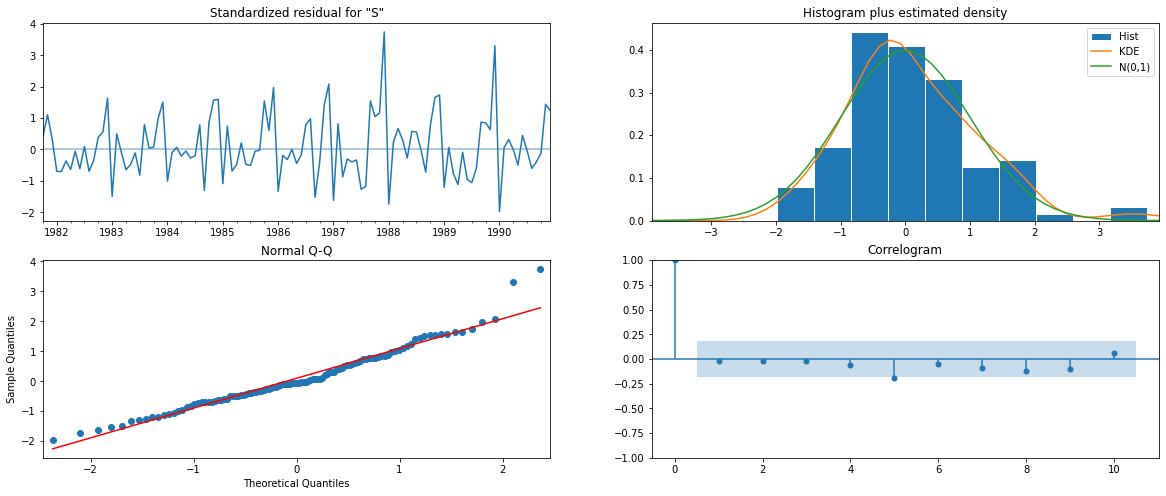

In [559]:
results_auto_SARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [560]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [561]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  2481.306924  763.068767     985.719622    3976.894225
1991-02-01  1798.750362  834.706169     162.756333    3434.744391
1991-03-01  2390.377112  835.002273     753.802730    4026.951495
1991-04-01  2573.447750  838.945445     929.144893    4217.750606
1991-05-01  1999.508896  839.151312     354.802546    3644.215245

In [562]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1282.8043263143093 
MAPE: 40.585212744690544


In [674]:
resultsDf_11 = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(2,1,1)(0, 0, 3, 6)'])


resultsDf_11 = pd.concat([resultsDf_10,resultsDf_11])

resultsDf_11

RMSE       MAPE
ARIMA(2,1,2)               1333.297298  47.100017
ARIMA(3,1,2)               1809.550651  34.833631
SARIMA(2,1,1)(0, 0, 3, 6)  1809.550651  34.833631

In [565]:
predicted_auto_SARIMA.se_mean

1991-01-01     763.068767
1991-02-01     834.706169
1991-03-01     835.002273
1991-04-01     838.945445
1991-05-01     839.151312
                 ...     
1996-02-01    1096.743002
1996-03-01    1096.895797
1996-04-01    1097.048570
1996-05-01    1097.201323
1996-06-01    1097.354053
Freq: MS, Name: var_pred_mean, Length: 66, dtype: float64

In [566]:
plt.plot(predicted_auto_SARIMA.predicted_mean, label='predicted_auto_ARIMA_predicted_mean')
plt.plot(test['Sparkling'], label='Test')
plt.legend(loc='best')

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12.

Let us look at the ACF and the PACF plots once more.

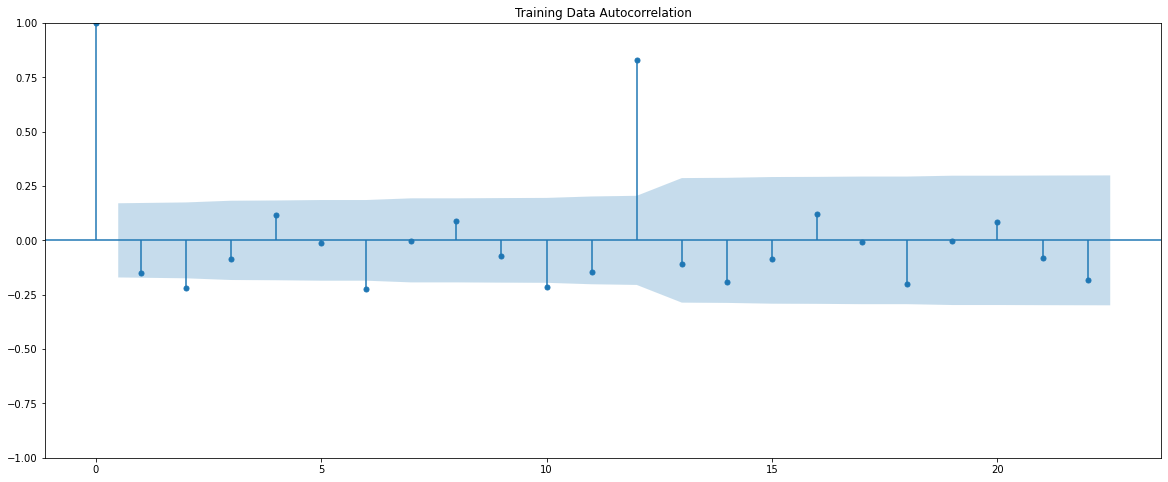

In [166]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

In [167]:
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

In [651]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(2,1,3),
                                seasonal_order=(2,1,3,6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 1, 3, 6)   Log Likelihood                -763.427
Date:                           Fri, 09 Sep 2022   AIC                           1548.853
Time:                                   22:54:51   BIC                           1577.835
Sample:                               01-01-1980   HQIC                          1560.592
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0622      1.460     -0.728      0.467      -3.923       1.799
ar.L2         -0.3035      1.039     -0.292

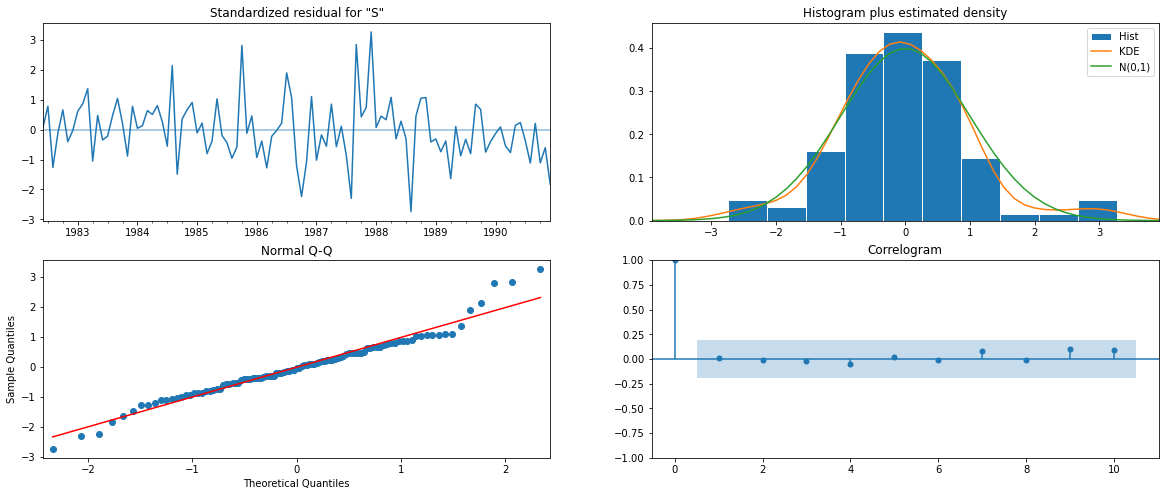

In [652]:
results_manual_SARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [663]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [664]:
predicted_manual_SARIMA.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  1336.435454  395.293657     561.674123    2111.196785
1991-02-01  1070.196082  405.016859     276.377625    1864.014539
1991-03-01  1647.421596  404.978648     853.678033    2441.165160
1991-04-01  1574.708500  413.656354     763.956945    2385.460055
1991-05-01  1186.223136  414.246072     374.315753    1998.130519

In [665]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1809.550651195887 
MAPE: 34.833631487327125


In [675]:
resultsDf_12 = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(2,1,3)(2,1,3,6)'])


resultsDf_12 = pd.concat([resultsDf_11,resultsDf_12])

resultsDf_12

RMSE       MAPE
ARIMA(2,1,2)               1333.297298  47.100017
ARIMA(3,1,2)               1809.550651  34.833631
SARIMA(2,1,1)(0, 0, 3, 6)  1809.550651  34.833631
SARIMA(2,1,3)(2,1,3,6)     1809.550651  34.833631

In [670]:
predicted_manual_SARIMA.predicted_mean.tail(12)

1995-07-01    1098.200363
1995-08-01    1067.632456
1995-09-01    1559.694471
1995-10-01    2635.368087
1995-11-01    4011.800135
1995-12-01    6272.985023
1996-01-01     539.531525
1996-02-01      87.841781
1996-03-01     832.281933
1996-04-01     500.541186
1996-05-01     -42.210013
1996-06-01    -613.057579
Freq: MS, Name: predicted_mean, dtype: float64

In [657]:
plt.plot(predicted_manual_SARIMA.predicted_mean, label='predicted_manual_ARIMA_mean')
plt.plot(test['Sparkling'], label='Test')
plt.legend(loc='best')

## Building the most optimum model on the Full Data.

In [676]:
resultsDf_12.drop('MAPE',axis=1,inplace= True)
resultsDf.columns= ['RMSE']

result_compare = pd.concat([resultsDf_12,resultsDf],)
result_compare.sort_values('RMSE',ascending = True)

RMSE
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
SimpleAverageModel                                  1298.173362
ARIMA(2,1,2)                                        1333.297298
9pointTrailingMovingAverage                         1346.278315
Alpha=0.99,SES                                      1356.160511
LinearRegressionOnTime                              1418.611892
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES  1425.772352
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                  1571.792688
ARIMA(3,1,2)                                        1809.550651
SARIMA(2,1,1)(0, 0, 3, 6)                           1809.550651
SARIMA(2,1,3)(2,1,3,6)                              1809.550651
NaiveModel                                          3859.588618
Alpha=1,Beta=0.0189:DES                             4105.732190

## Building the most optimum model on the Full Data.

In [677]:
pred_ARIMA = ARIMA(train, order = (2,1,2))
results_auto_ARIMA = pred_ARIMA.fit()

C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [678]:
print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Fri, 09 Sep 2022   AIC                           2213.509
Time:                        23:09:32   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.786      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.731      0.000      -0.701      -0.417
ma.L1         -1.9916      0.110    -18.184      0.0

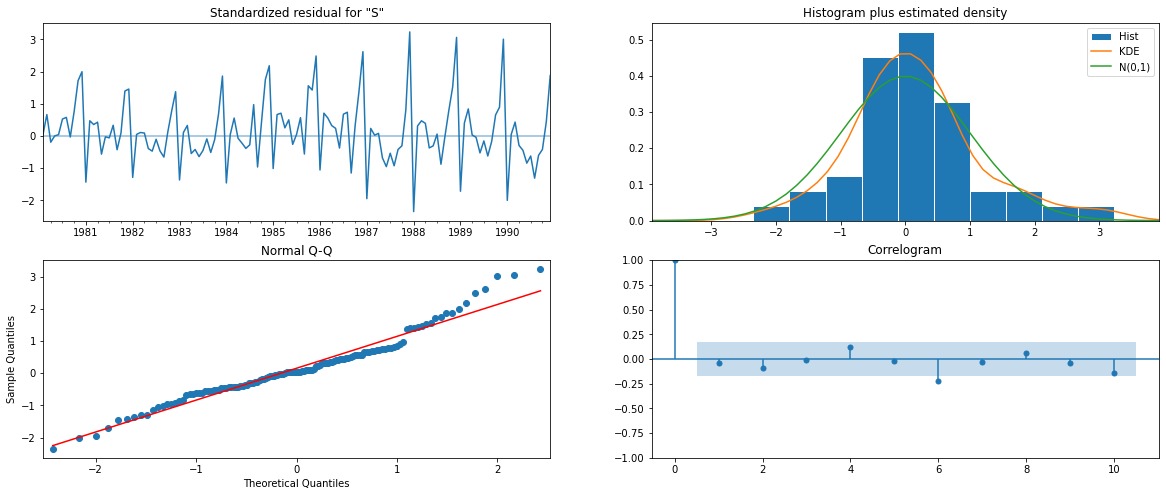

In [679]:
results_auto_ARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.


In [680]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [681]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [682]:
rmse = mean_squared_error(test['Sparkling'], predicted_auto_ARIMA, squared = False)
mape = mean_absolute_percentage_error(test['Sparkling'], predicted_auto_ARIMA)
print('RMSE',rmse,'\nMAPE', mape)

RMSE 1333.297297622849 
MAPE 47.10001658999489


In [683]:
resultsDf_9 = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf_9

RMSE       MAPE
ARIMA(2,1,2)  1333.297298  47.100017

In [688]:
plt.plot(predicted_auto_ARIMA.tail(24), label='predicted_auto_ARIMA')
plt.plot(test['Sparkling'].tail(24), label='Test')
plt.legend(loc='best')

In [689]:
predicted_auto_ARIMA.tail(24)

1994-07-01    2692.703536
1994-08-01    2692.708583
1994-09-01    2692.713682
1994-10-01    2692.717549
1994-11-01    2692.719771
1994-12-01    2692.720525
1995-01-01    2692.720270
1995-02-01    2692.719514
1995-03-01    2692.718666
1995-04-01    2692.717974
1995-05-01    2692.717542
1995-06-01    2692.717362
1995-07-01    2692.717367
1995-08-01    2692.717474
1995-09-01    2692.717612
1995-10-01    2692.717733
1995-11-01    2692.717815
1995-12-01    2692.717855
1996-01-01    2692.717861
1996-02-01    2692.717847
1996-03-01    2692.717825
1996-04-01    2692.717804
1996-05-01    2692.717789
1996-06-01    2692.717781
Freq: MS, Name: predicted_mean, dtype: float64